In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# List of players in the squad along with their roles
players_and_roles = {
    "Rohit Sharma": "batter",
    "Hardik Pandya": "batter bowler",
    "Shubman Gill": "batter",
    "Virat Kohli": "batter",
    "Shreyas Iyer": "batter",
    "Ishan Kishan": "batter",
    "KL Rahul": "batter wicketkeeper",
    "Suryakumar Yadav": "batter",
    "Ravindra Jadeja": "batter bowler",
    "Axar Patel": "batter bowler",
    "Shardul Thakur": "pace bowler",
    "Jasprit Bumrah": "pace bowler",
    "Mohammed Shami": "pace bowler",
    "Mohammed Siraj": "pace bowler",
    "Kuldeep Yadav": "spin bowler"
}

# List of opponents
opponents = ["South Africa", "Australia", "New Zealand", "Pakistan", "Afghanistan", "England", "Bangladesh", "Sri Lanka", "Netherlands"]



EARLIEST_YEAR = 2017

In [3]:
# Function to read player data from JSON files
def read_player_data(player_name):
    file_path = f"../data/players/{player_name}.json"
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

## Batting Statistics Functions

In [4]:
# Function to extract relevant batting statistics

def batting_record_parser(record, id_extractor):
    res = {
        "id": id_extractor(record['tt']),
        "matches": record["mt"] or 0,
        "runs": record["rn"]  or 0,
        "fours": record["fo"]  or 0,
        "sixes": record["si"]  or 0,
        "fifties": record["ft"]  or 0,
        "hundreds": record["hn"]  or 0,
        "batting_average": record["bta"]  or 0,
        "batting_strike_rate": record["btsr"]  or 0,
    }
    not_out_percentage = (int(record["no"] or 0)/int(res["matches"]))*100
    if not_out_percentage:
        res["not_out_percentage"] = not_out_percentage
    return res


def extract_batting_statistics(data):
    batting_stats = data.get('BATTING', {}).get('summary', {}).get('groups', [])
    
    # by opposition
    try:
        opposition_stats = list(filter(lambda grp: grp.get('type') == "OPPOSITION_TEAM", batting_stats))[0]['stats']
        opposition_stats = [batting_record_parser(ot, lambda nm: nm.split()[1]) for ot in opposition_stats]
        opposition_stats = list(filter(lambda stat: stat['id'] in opponents, opposition_stats))
    except:
        opposition_stats = []

    # by year
    try:
        yearwise_stats = list(filter(lambda grp: grp.get('type') == "YEAR", batting_stats))[0]['stats']
        yearwise_stats = [batting_record_parser(ot, lambda nm: int(nm.split()[1])) for ot in yearwise_stats]
        yearwise_stats = list(filter(lambda stat: stat['id'] >= EARLIEST_YEAR, yearwise_stats))
    except:
        yearwise_stats = []

    # by position
    try:
        position_stats = list(filter(lambda grp: grp.get('type') == "BATTING_POSITION", batting_stats))[0]['stats']
        position_stats = [batting_record_parser(ot, lambda nm: (nm.split()[0])) for ot in position_stats]
    except:
        position_stats = []


    return opposition_stats, yearwise_stats, position_stats

In [5]:
# Function to create EDA plots for batting statistics
def create_batting_eda_plots(player_name, stats_type, stats_df):
    plt.figure(figsize=(14, 12))
    
    # Runs scored by the player against each category
    plt.subplot(3, 2, 1)
    sns.barplot(x=stats_df['id'], y=stats_df['runs'])
    plt.title(f'Runs Scored by {player_name} - {stats_type}')
    plt.xlabel(stats_type)
    plt.ylabel('Runs')

    # Fifties scored by the player against each category
    plt.subplot(3, 2, 2)
    sns.barplot(x=stats_df['id'], y=stats_df['fifties'])
    plt.title(f'Fifties Scored by {player_name} - {stats_type}')
    plt.xlabel(stats_type)
    plt.ylabel('Fifties')

    # Hundreds scored by the player against each category
    plt.subplot(3, 2, 3)
    sns.barplot(x=stats_df['id'], y=stats_df['hundreds'])
    plt.title(f'Hundreds Scored by {player_name} - {stats_type}')
    plt.xlabel(stats_type)
    plt.ylabel('Hundreds')

    # Batting Average of the player against each category
    plt.subplot(3, 2, 4)
    sns.barplot(x=stats_df['id'], y=stats_df['batting_average'])
    plt.title(f'Batting Average of {player_name} - {stats_type}')
    plt.xlabel(stats_type)
    plt.ylabel('Batting Average')

    # Batting Strike Rate of the player against each category
    plt.subplot(3, 2, 5)
    sns.barplot(x=stats_df['id'], y=stats_df['batting_strike_rate'])
    plt.title(f'Batting Strike Rate of {player_name} - {stats_type}')
    plt.xlabel(stats_type)
    plt.ylabel('Batting Strike Rate')

    plt.tight_layout()
    plt.show()


## Bowling Statistics Functions

In [6]:
# Function to extract relevant batting statistics

def bowling_record_parser(record, id_extractor):
    return {
        "id": id_extractor(record['tt']),
        "matches": record["mt"] or 0,
        "overs": record["ov"] or 0,
        "wickets": record["wk"] or 0,
        "maiden": record["md"] or 0,
        "bowling_strike_rate": record["bwsr"] or 0,
        "bowling_economy": record["bwe"] or 0,
    }


def extract_bowling_statistics(data):
    bowling_stats = data.get('BOWLING', {}).get('summary', {}).get('groups', [])
    
    # by opposition
    try:
        opposition_stats = list(filter(lambda grp: grp.get('type') == "OPPOSITION_TEAM", bowling_stats))[0]['stats']
        opposition_stats = [bowling_record_parser(ot, lambda nm: nm.split()[1]) for ot in opposition_stats]
        opposition_stats = list(filter(lambda stat: stat['id'] in opponents, opposition_stats))
    except:
        opposition_stats = []

    # by year
    try:
        yearwise_stats = list(filter(lambda grp: grp.get('type') == "YEAR", bowling_stats))[0]['stats']
        yearwise_stats = [bowling_record_parser(ot, lambda nm: int(nm.split()[1])) for ot in yearwise_stats]
        yearwise_stats = list(filter(lambda stat: stat['id'] >= EARLIEST_YEAR, yearwise_stats))
    except:
        yearwise_stats = []

    # by position
    try:
        position_stats = list(filter(lambda grp: grp.get('type') == "BOWLING_POSITION", bowling_stats))[0]['stats']
        position_stats = [bowling_record_parser(ot, lambda nm: (nm.split()[0])) for ot in position_stats]
    except:
        position_stats = []

    return opposition_stats, yearwise_stats, position_stats

In [7]:
# Function to create EDA plots for bowling statistics
def create_bowling_eda_plots(player_name, stats_type, stats_df):
    plt.figure(figsize=(14, 12))
    
    # Matches played by the player against each category
    plt.subplot(3, 2, 1)
    sns.barplot(x=stats_df['id'], y=stats_df['matches'])
    plt.title(f'Matches Played by {player_name} - {stats_type}')
    plt.xlabel(stats_type)
    plt.ylabel('Matches Played')

    # Overs bowled by the player against each category
    plt.subplot(3, 2, 2)
    sns.barplot(x=stats_df['id'], y=stats_df['overs'])
    plt.title(f'Overs Bowled by {player_name} - {stats_type}')
    plt.xlabel(stats_type)
    plt.ylabel('Overs Bowled')

    # Wickets taken by the player against each category
    plt.subplot(3, 2, 3)
    sns.barplot(x=stats_df['id'], y=stats_df['wickets'])
    plt.title(f'Wickets Taken by {player_name} - {stats_type}')
    plt.xlabel(stats_type)
    plt.ylabel('Wickets')

    # Maidens bowled by the player against each category
    plt.subplot(3, 2, 4)
    sns.barplot(x=stats_df['id'], y=stats_df['maiden'])
    plt.title(f'Maidens Bowled by {player_name} - {stats_type}')
    plt.xlabel(stats_type)
    plt.ylabel('Maidens Bowled')

    # Bowling Strike Rate of the player against each category
    plt.subplot(3, 2, 5)
    sns.barplot(x=stats_df['id'], y=stats_df['bowling_strike_rate'])
    plt.title(f'Bowling Strike Rate of {player_name} - {stats_type}')
    plt.xlabel(stats_type)
    plt.ylabel('Bowling Strike Rate')

    # Bowling Economy of the player against each category
    plt.subplot(3, 2, 6)
    sns.barplot(x=stats_df['id'], y=stats_df['bowling_economy'])
    plt.title(f'Bowling Economy of {player_name} - {stats_type}')
    plt.xlabel(stats_type)
    plt.ylabel('Bowling Economy')

    plt.tight_layout()
    plt.show()


## Graph Generation

Rohit Sharma Batting Stats


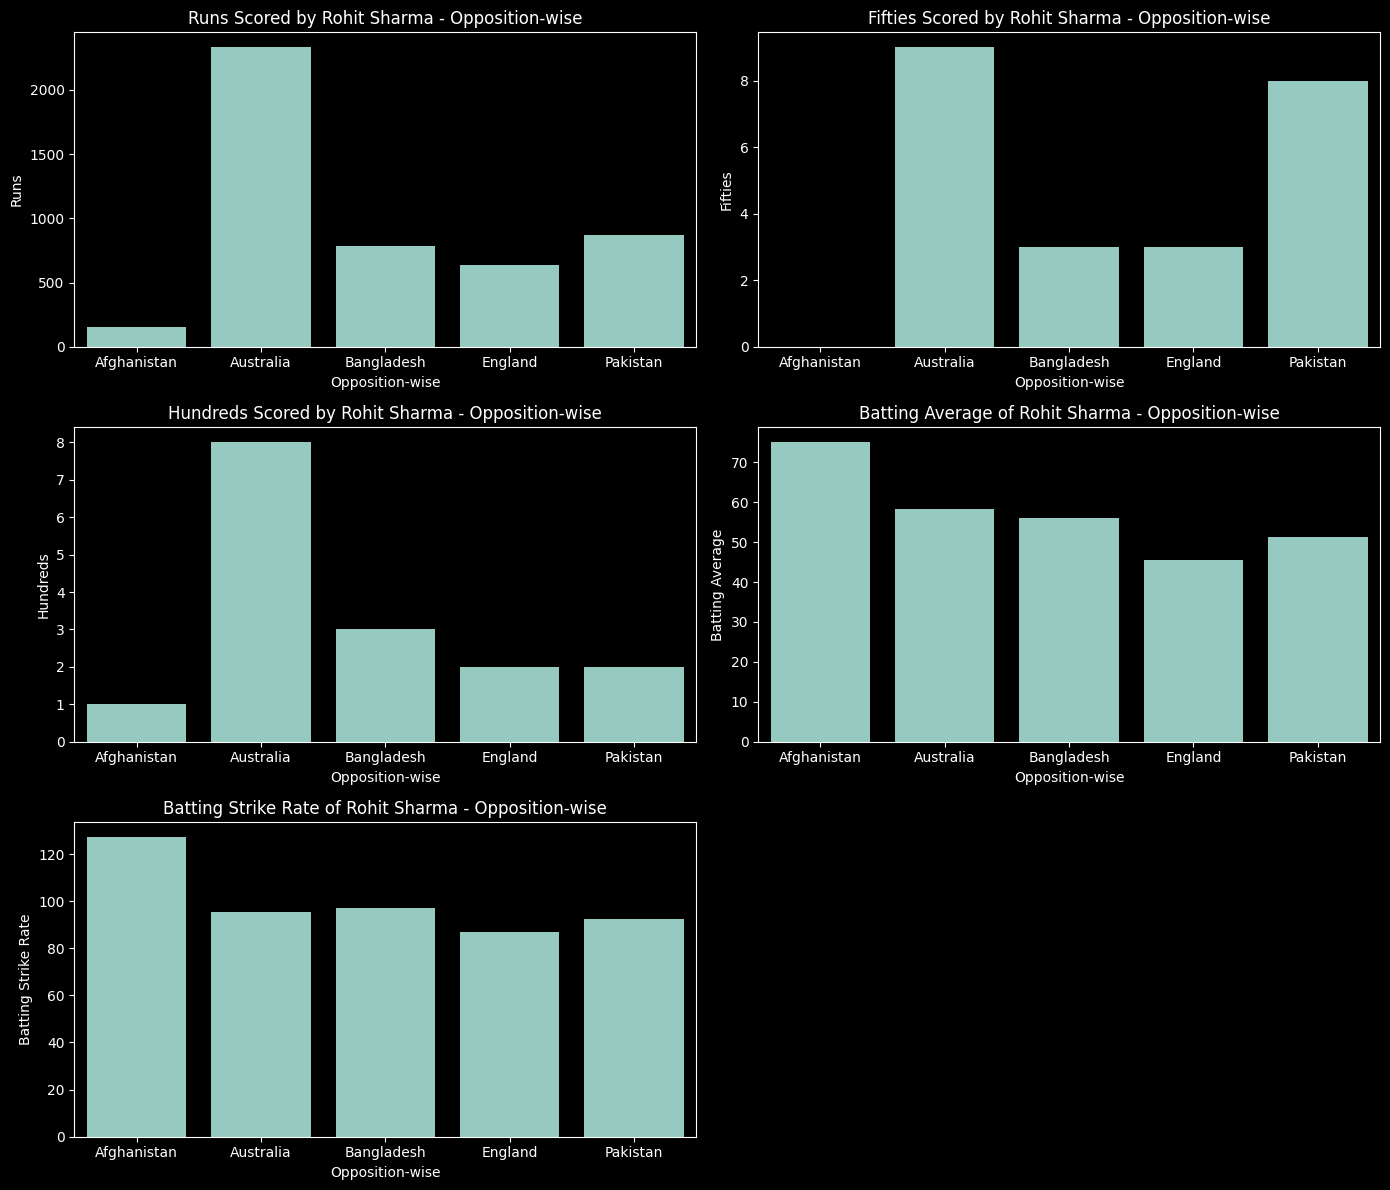

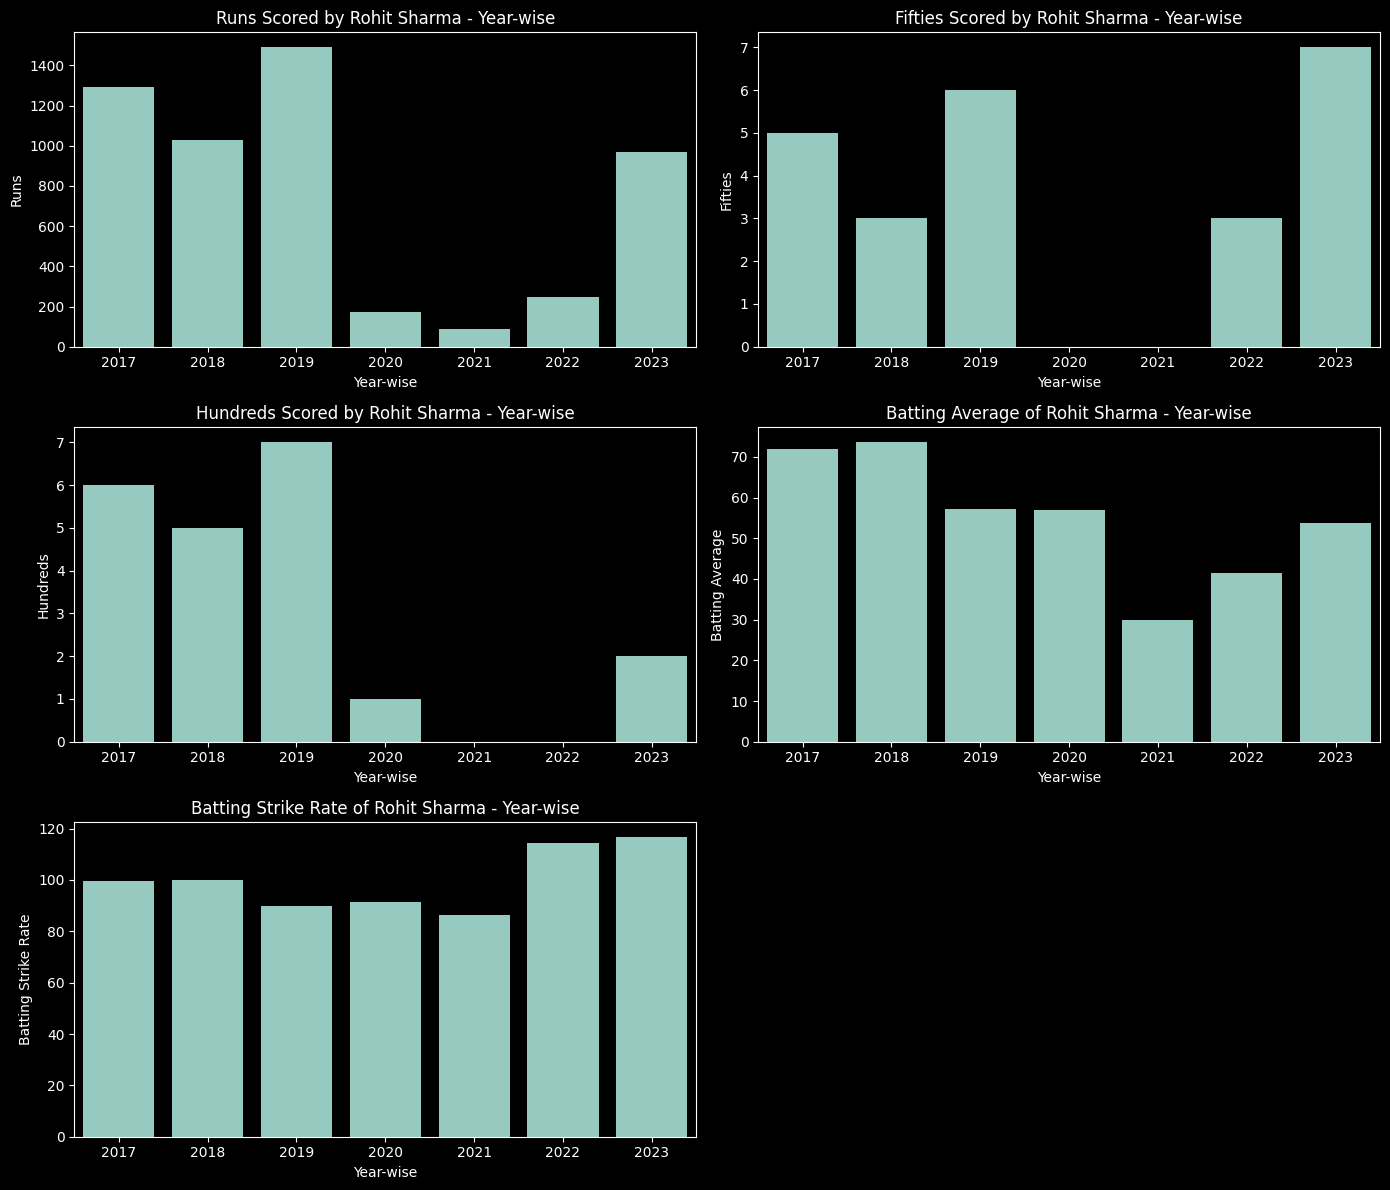

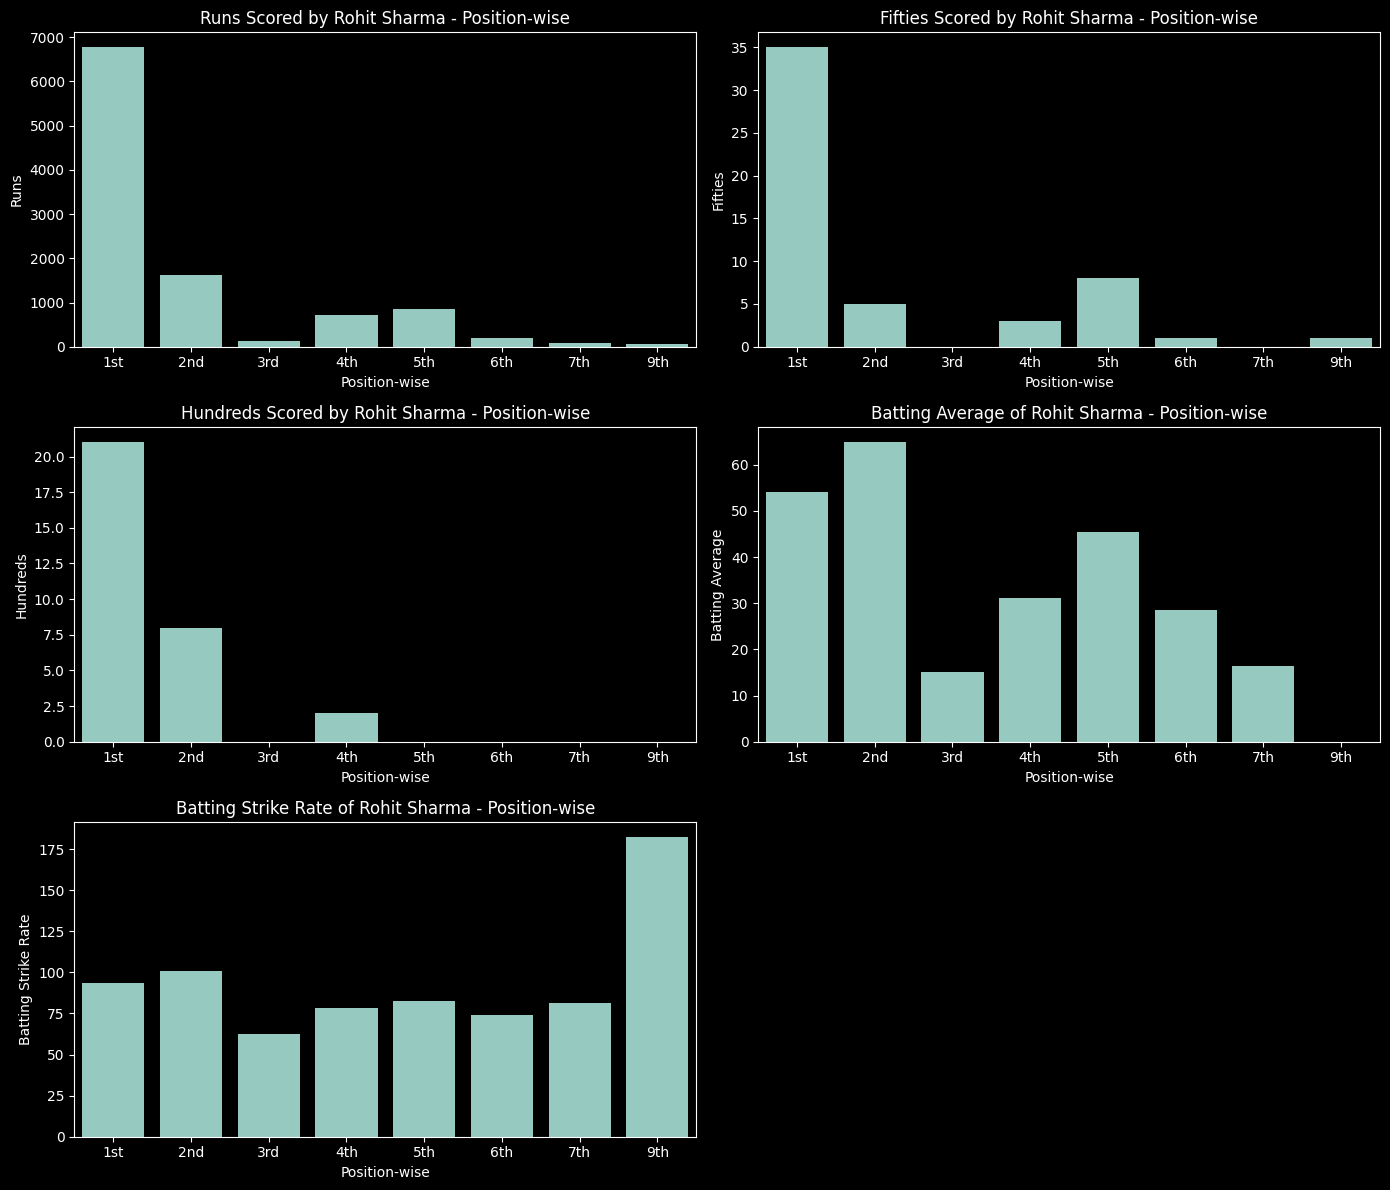

Hardik Pandya Batting Stats


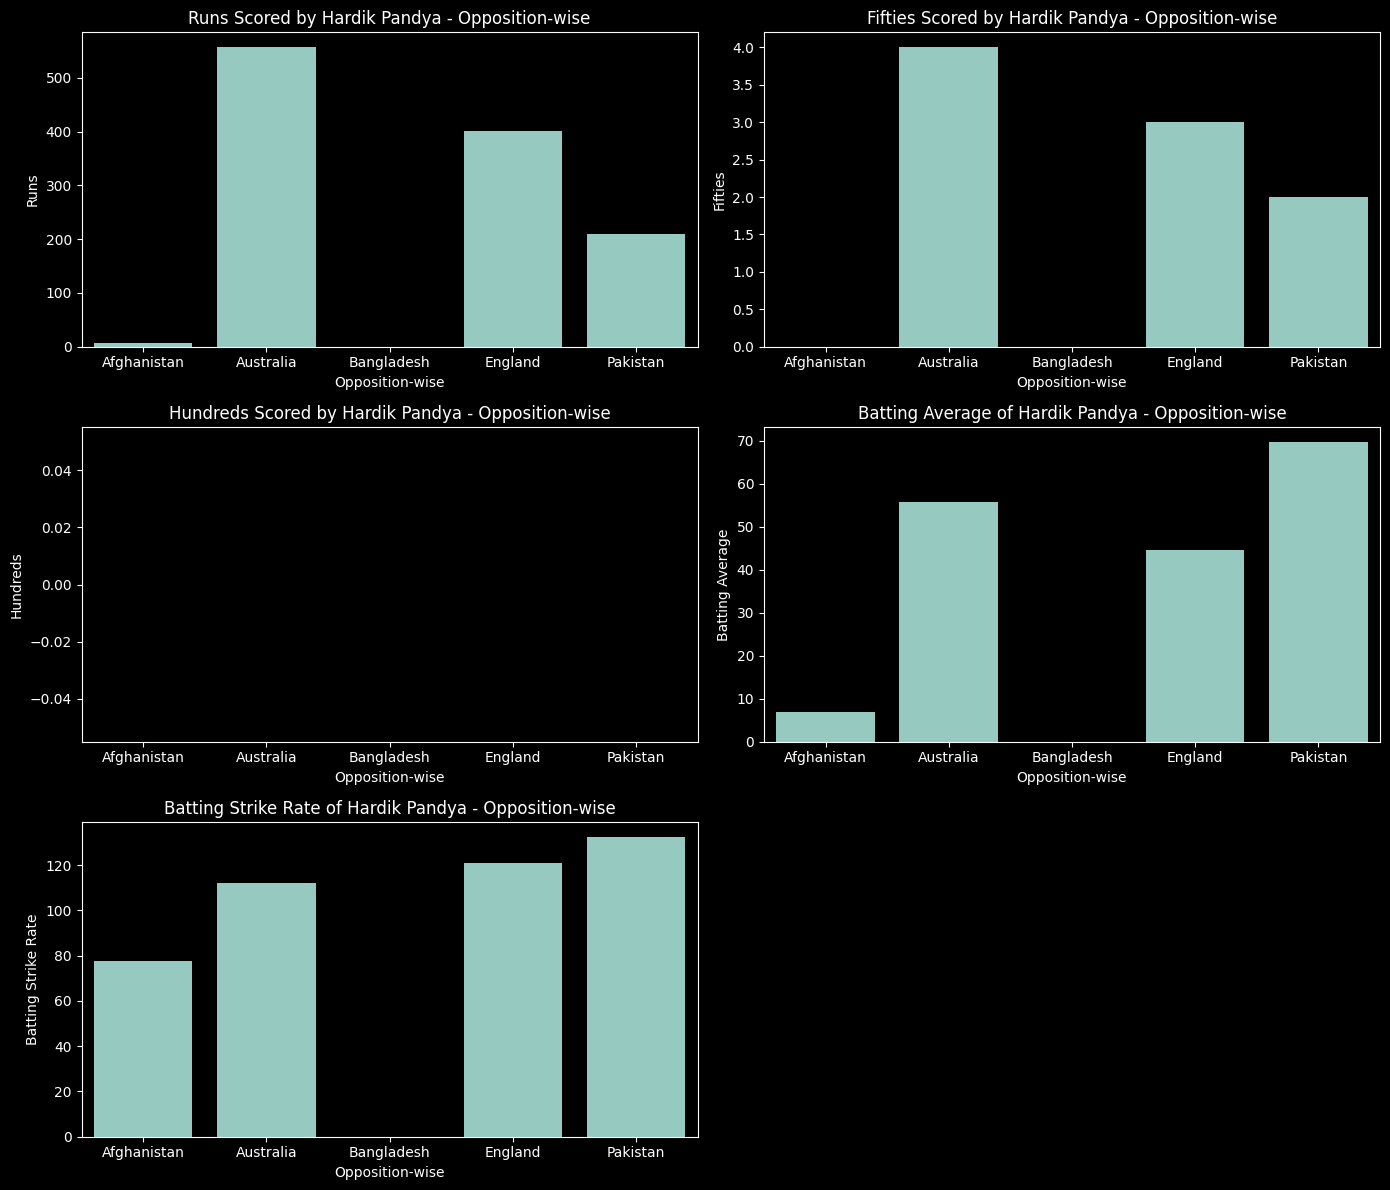

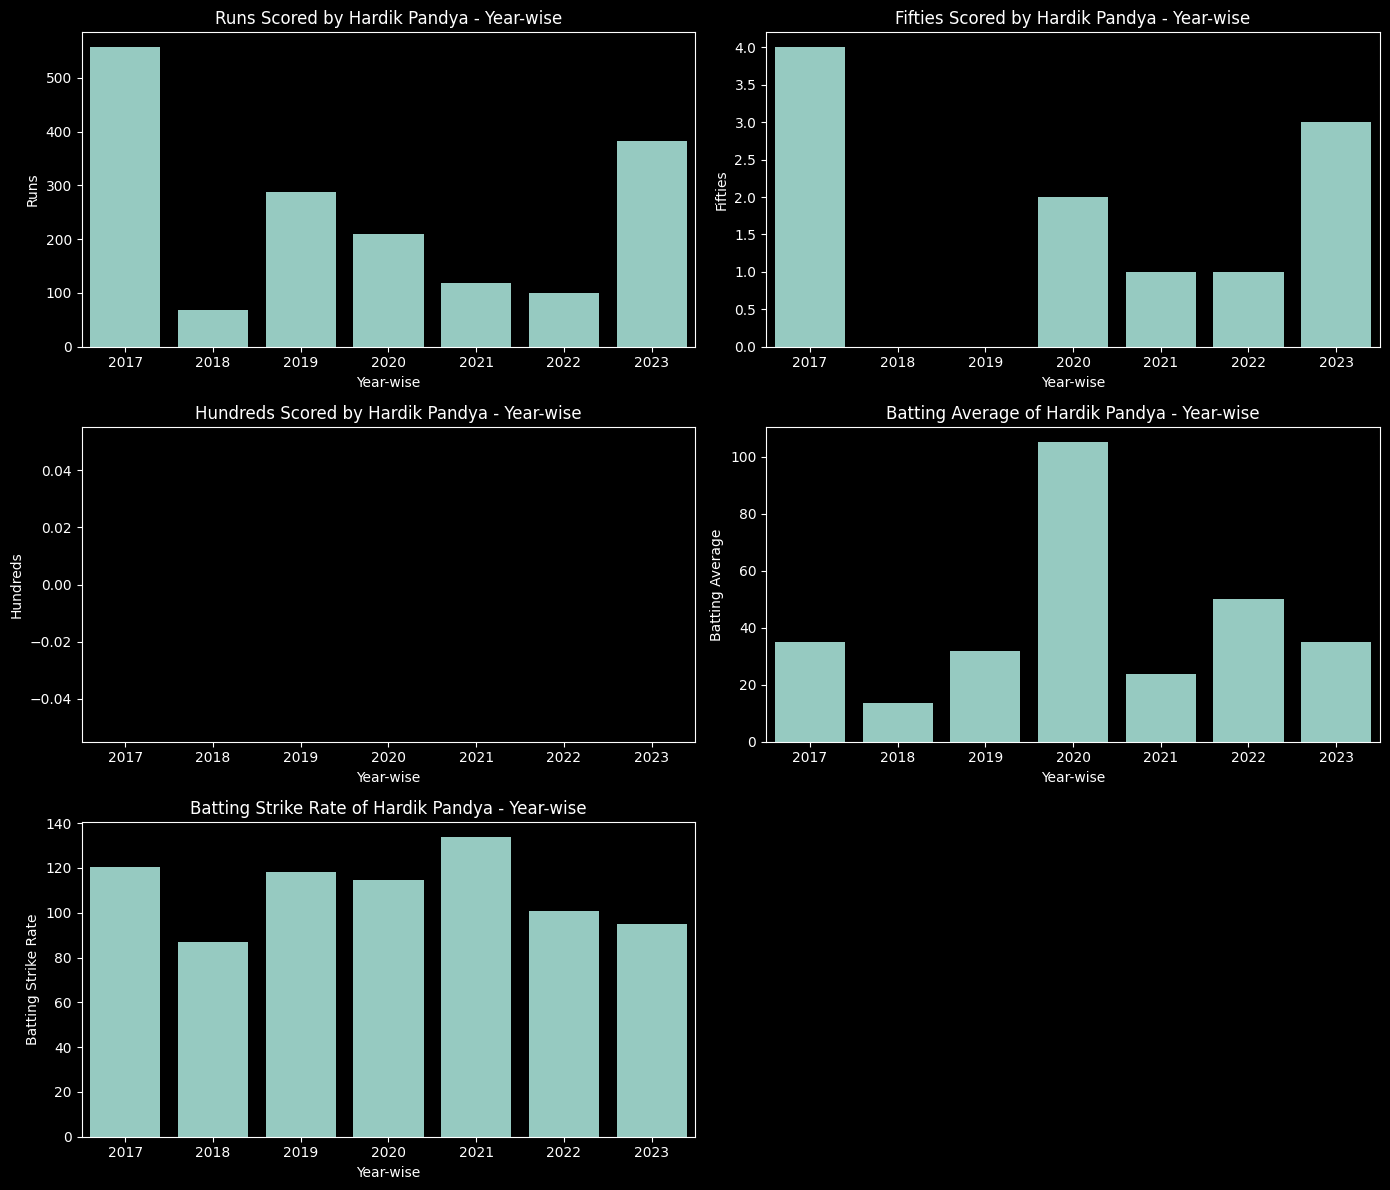

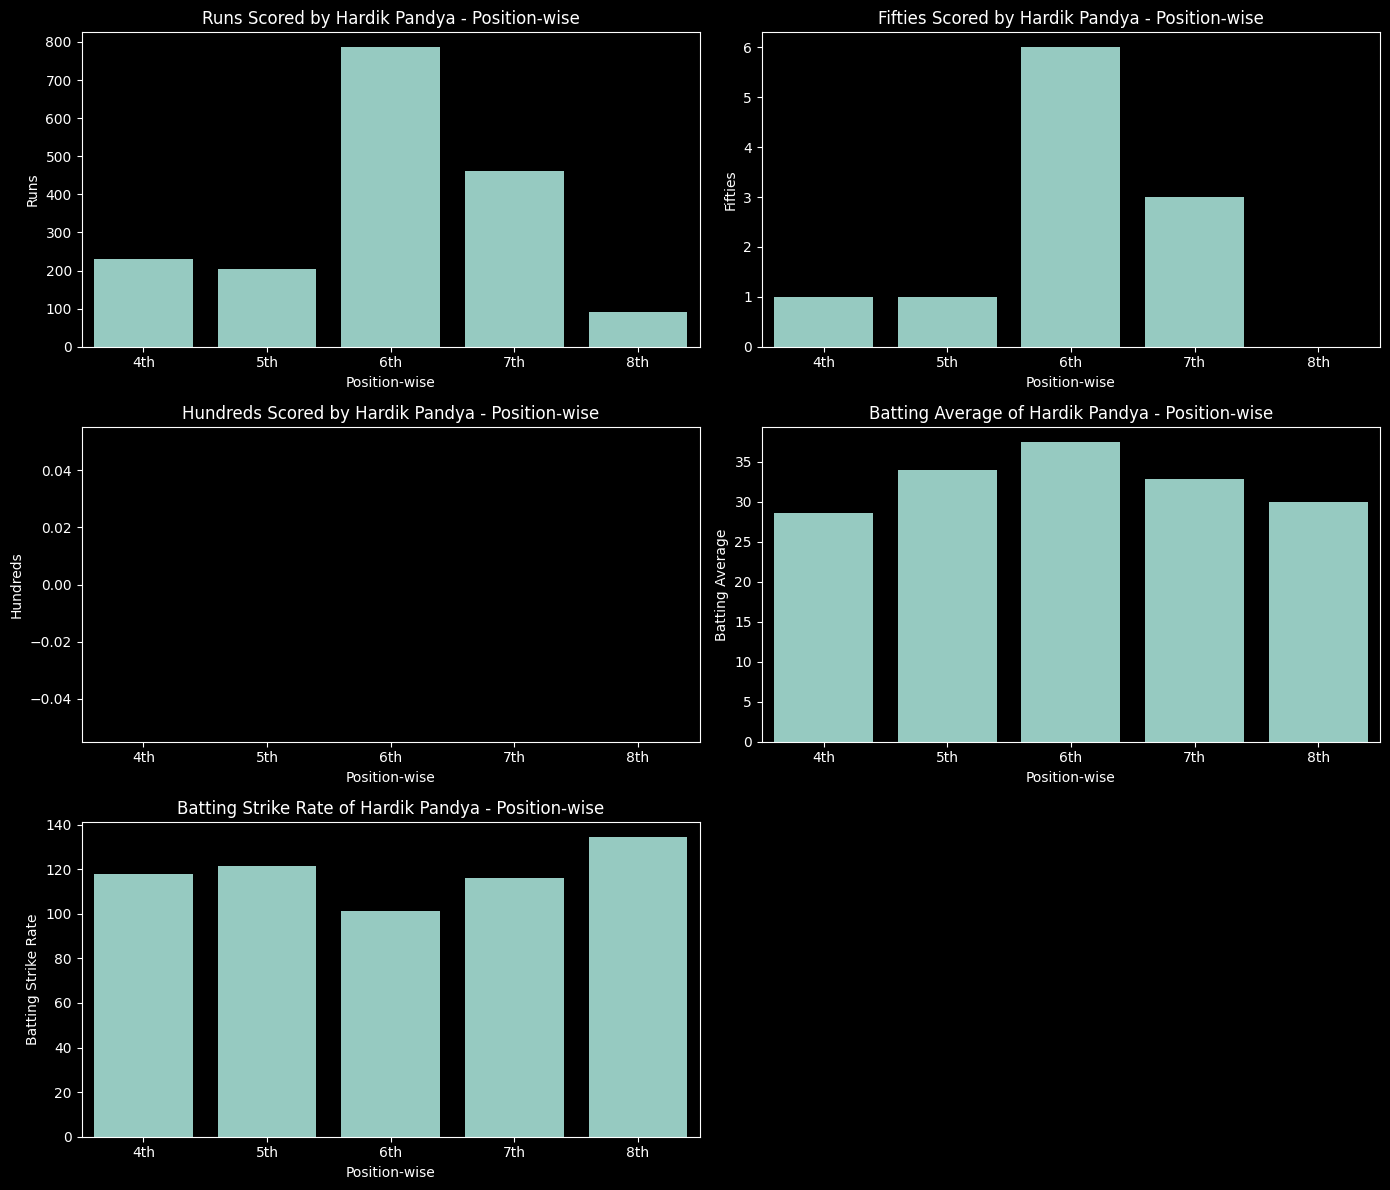

Shubman Gill Batting Stats


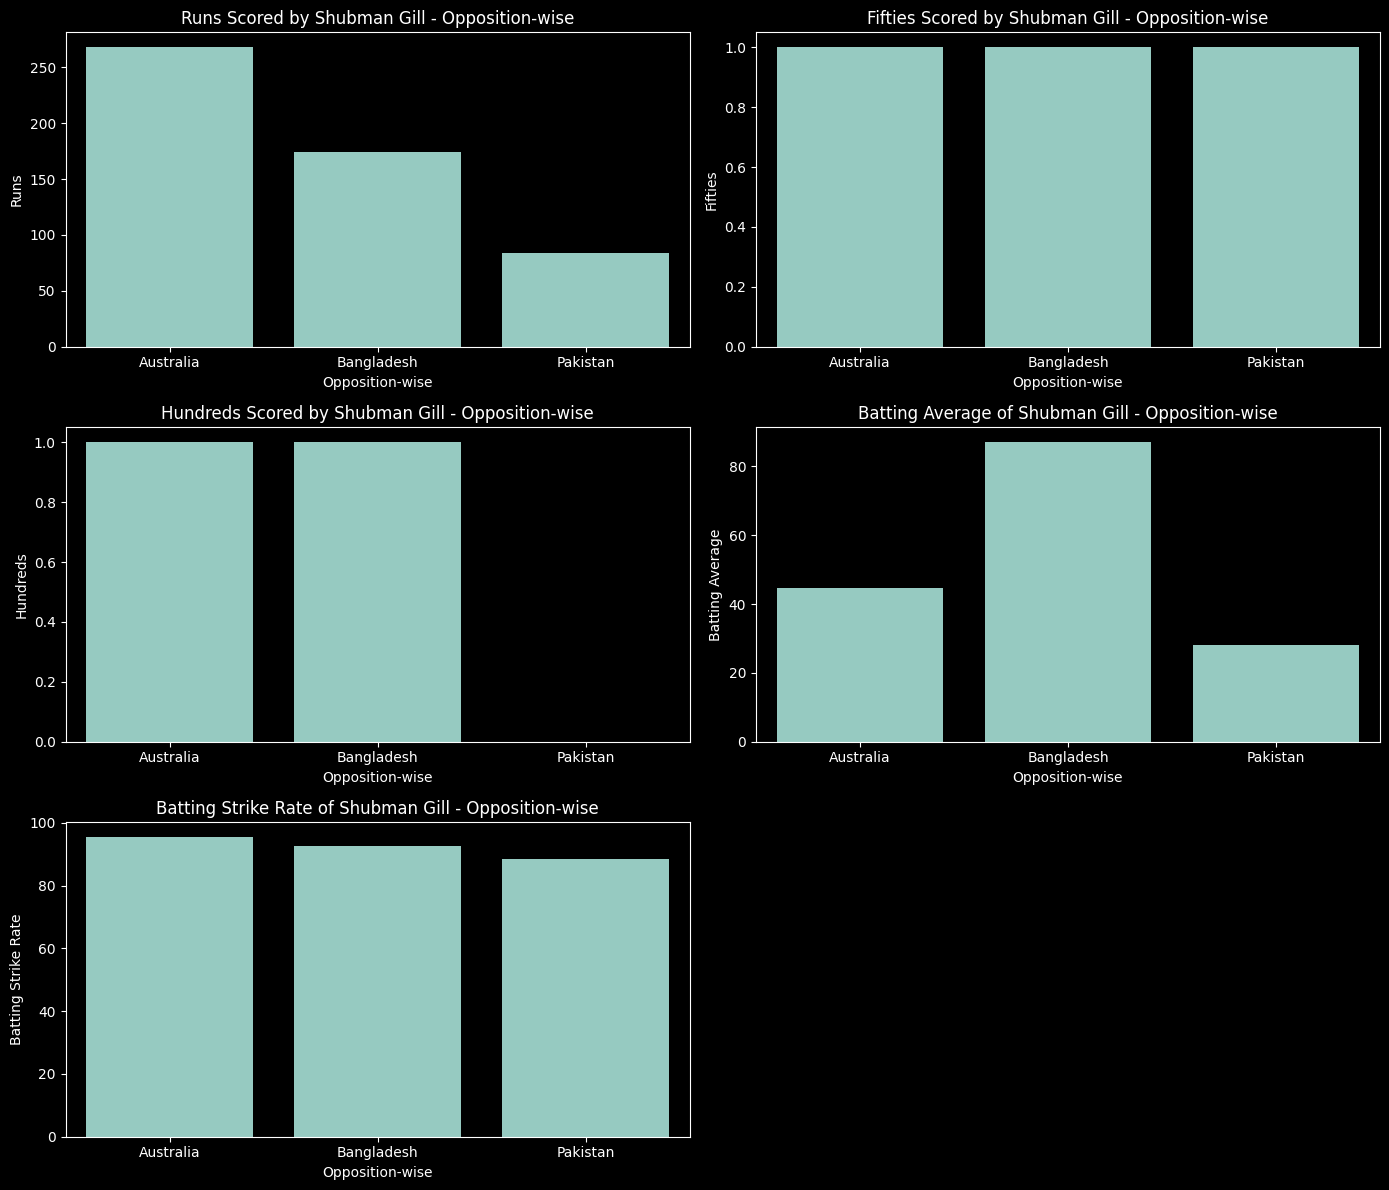

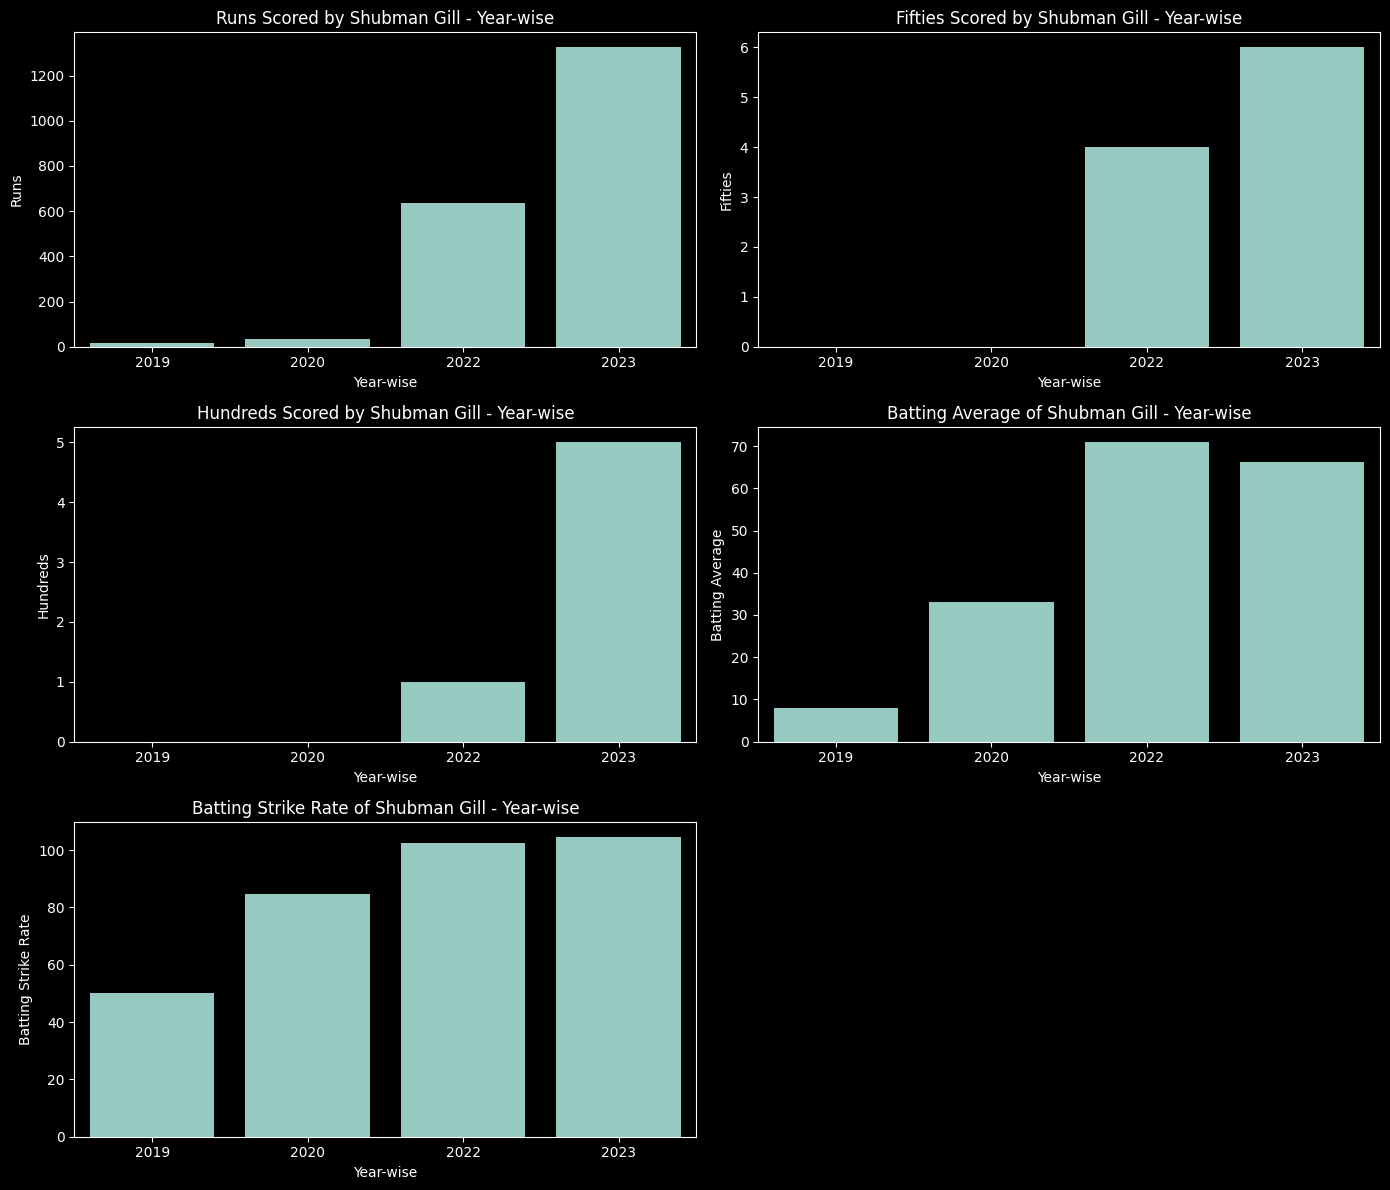

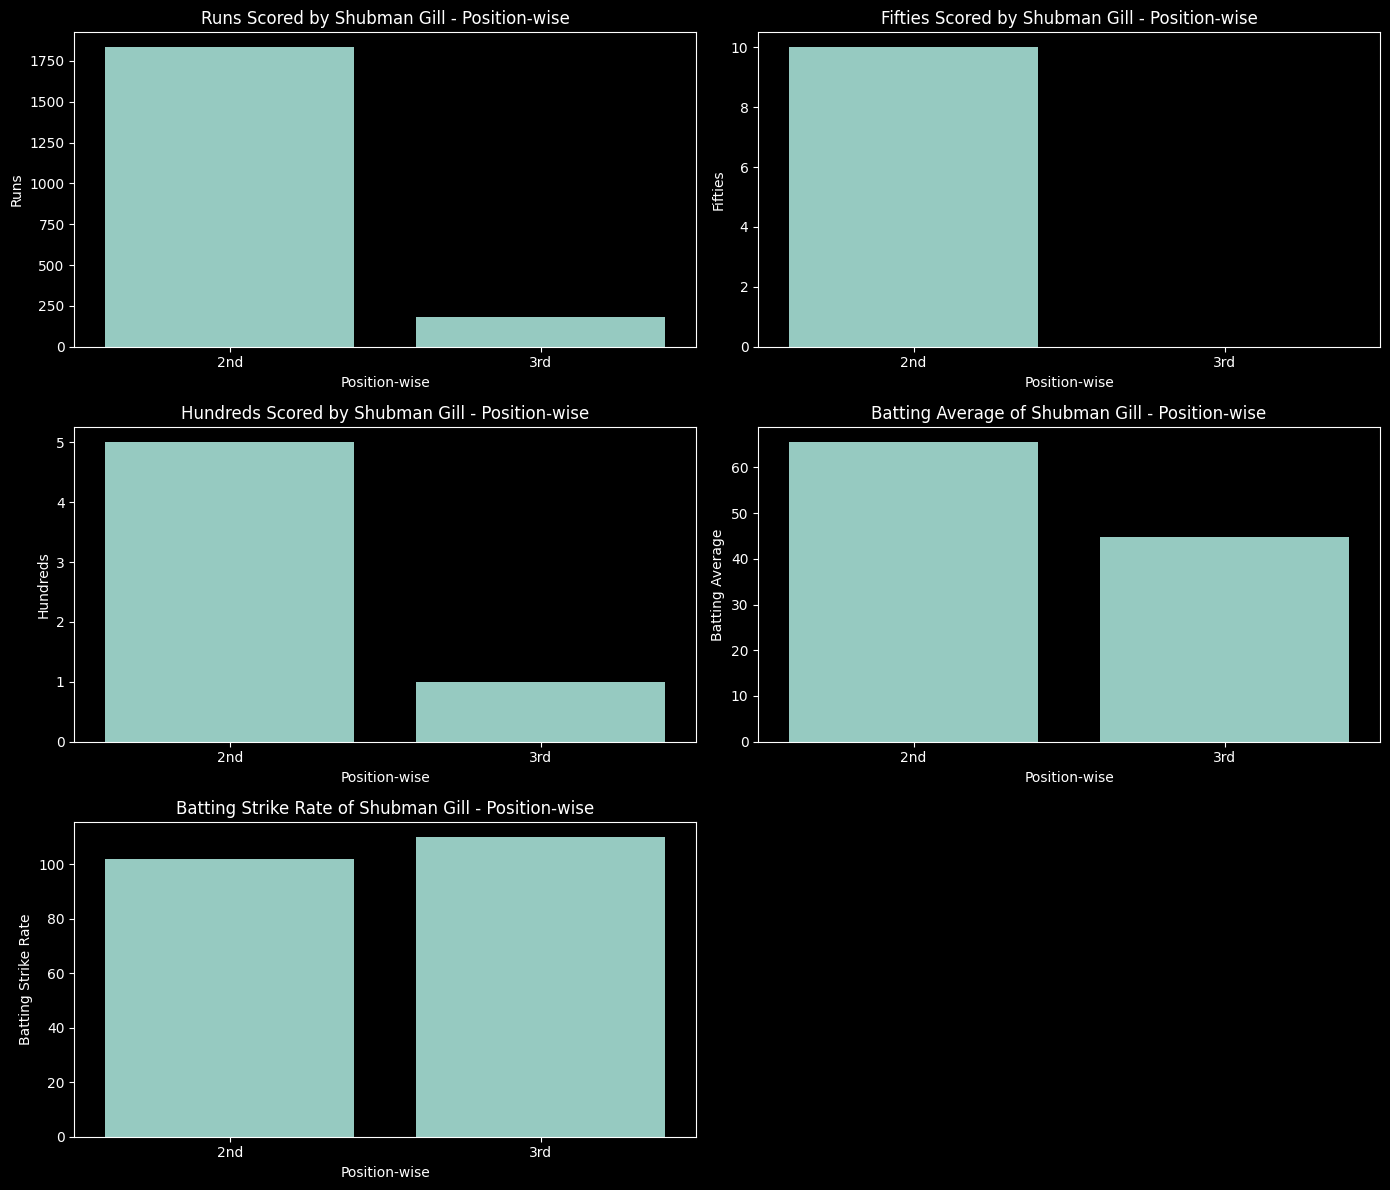

Virat Kohli Batting Stats


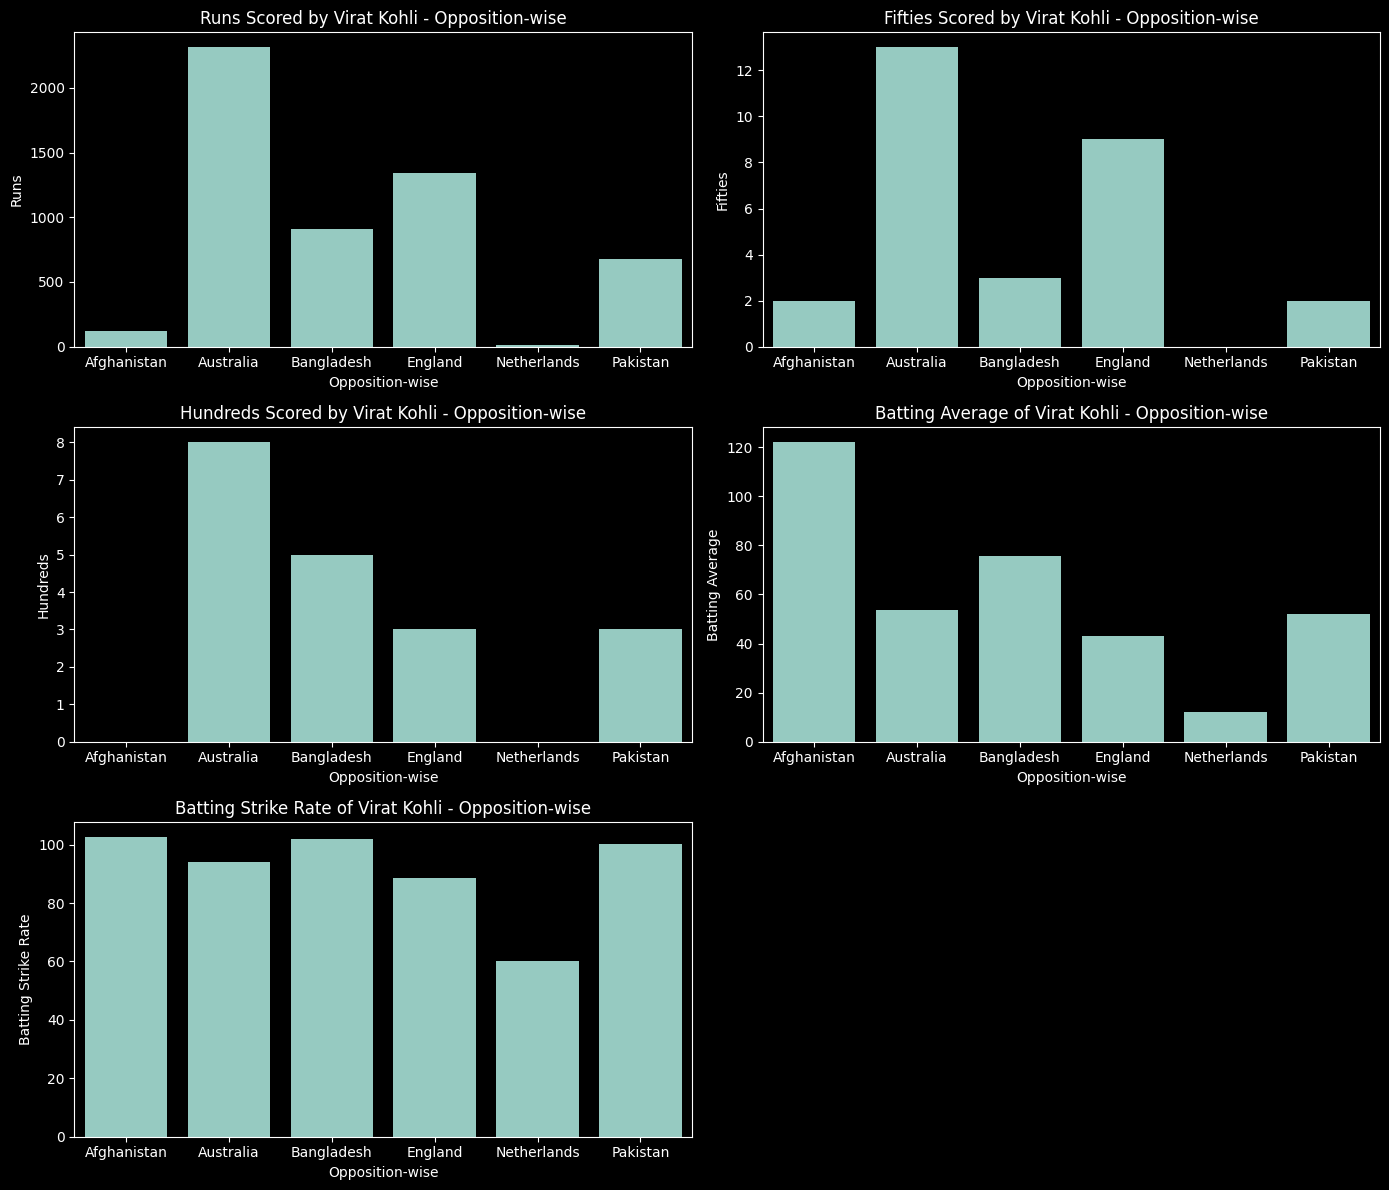

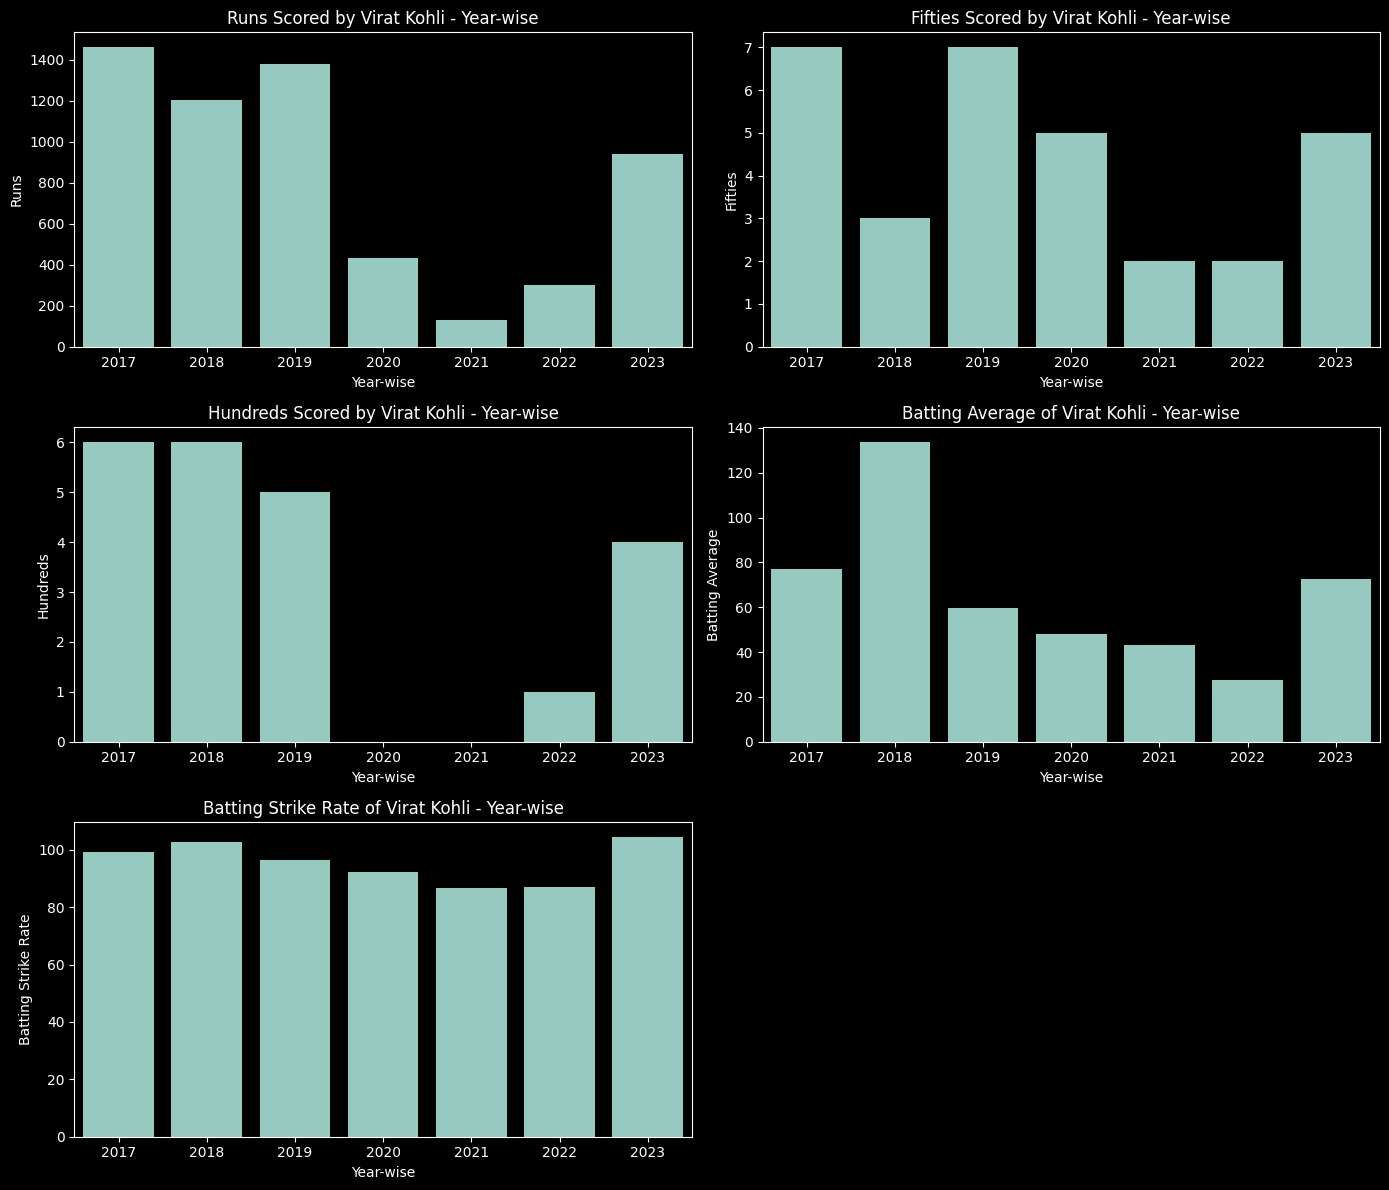

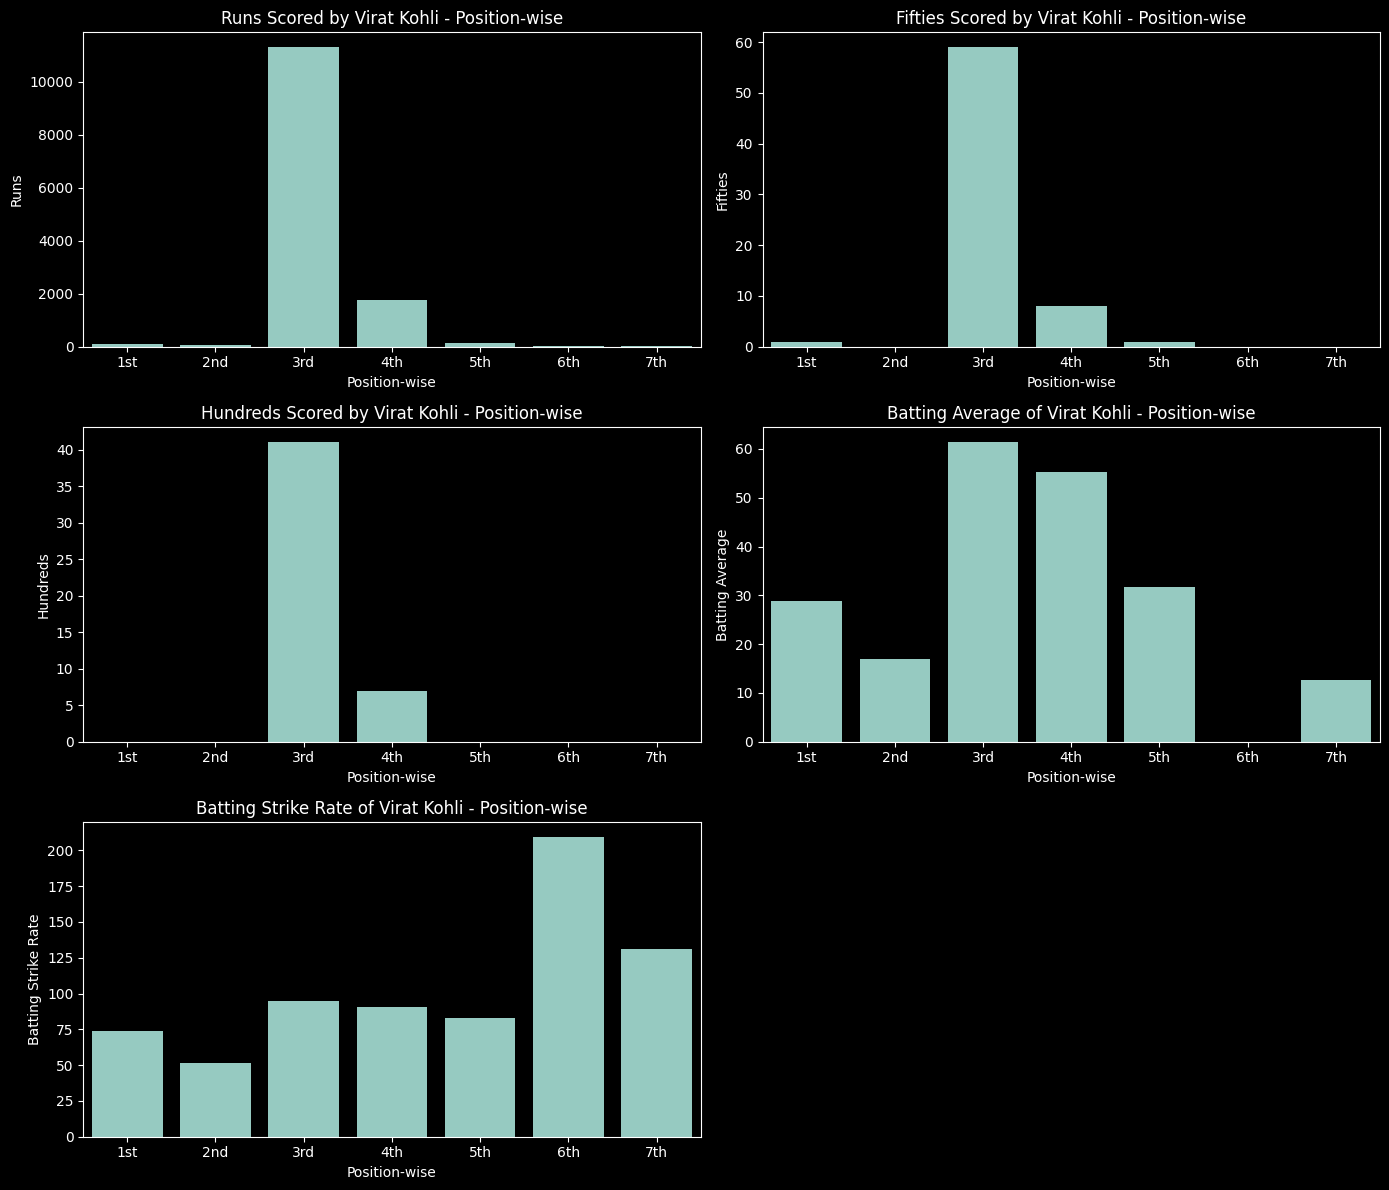

Shreyas Iyer Batting Stats


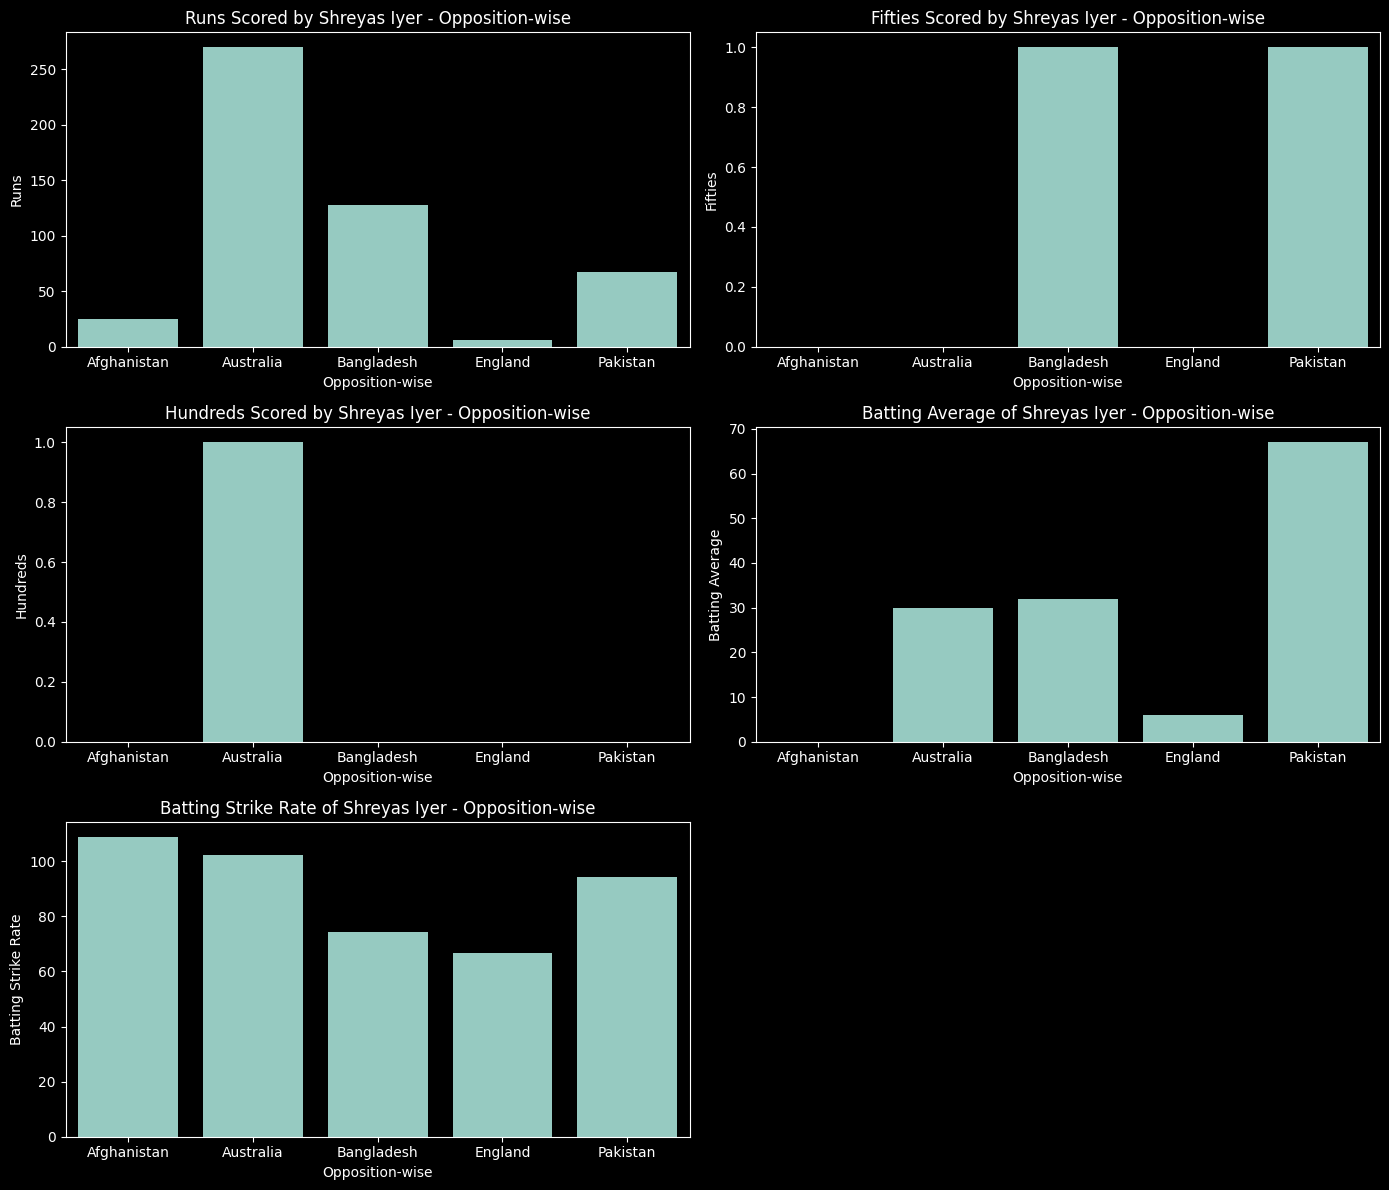

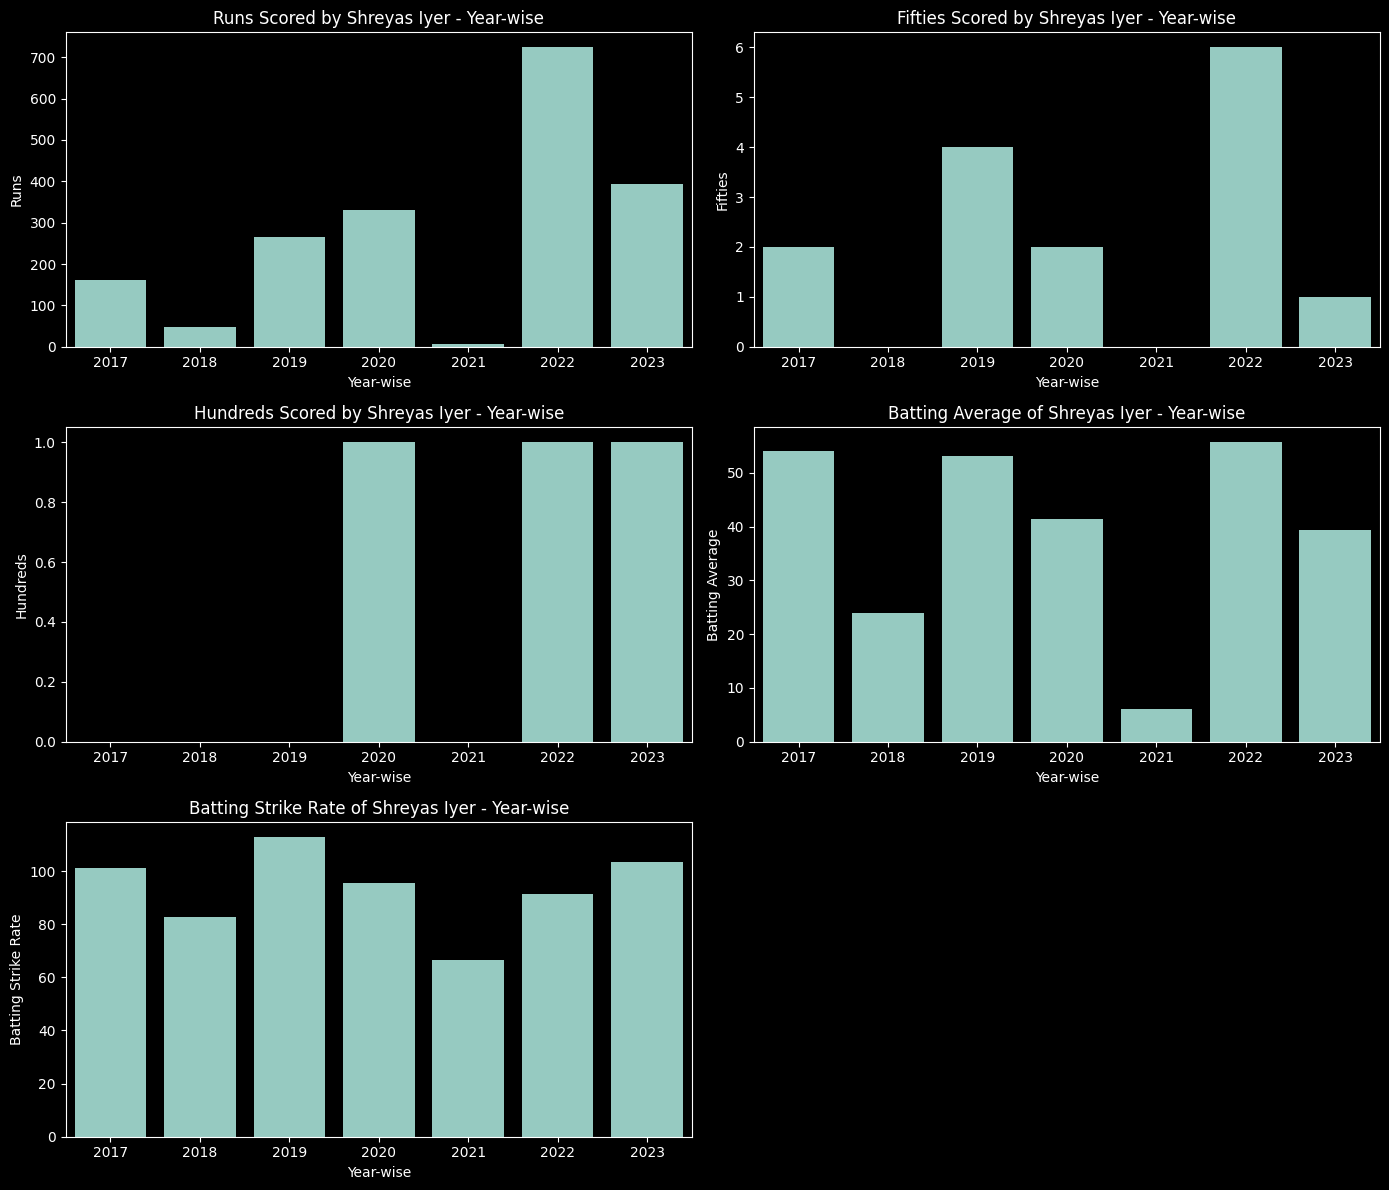

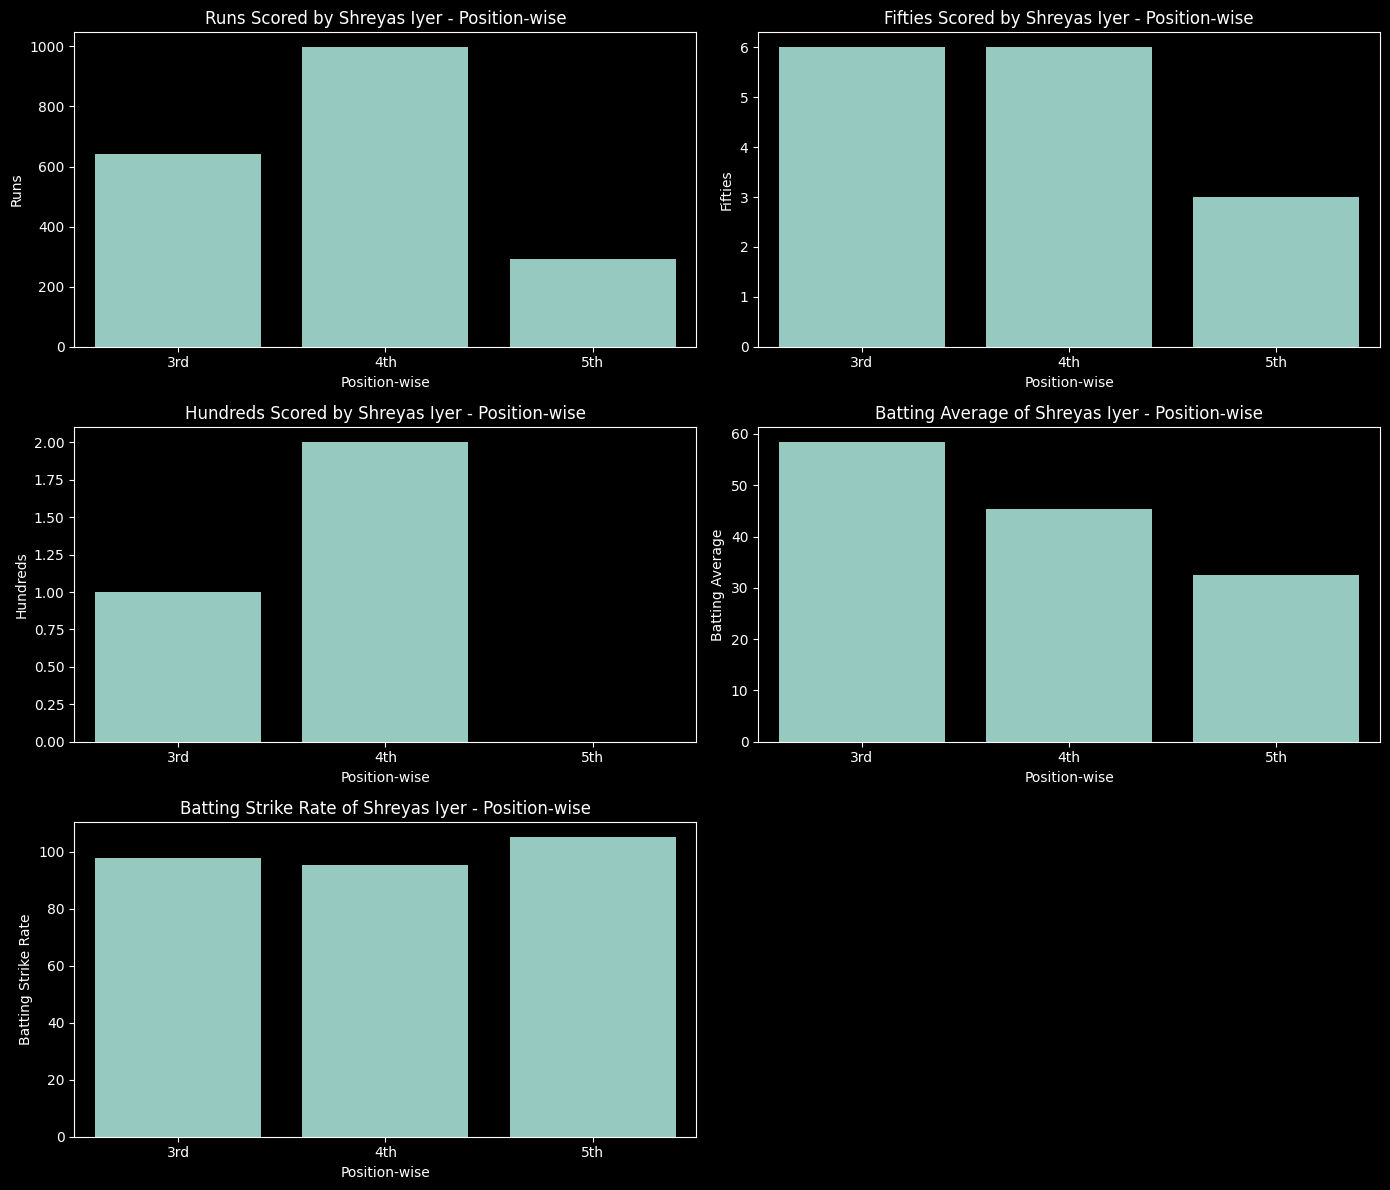

Ishan Kishan Batting Stats


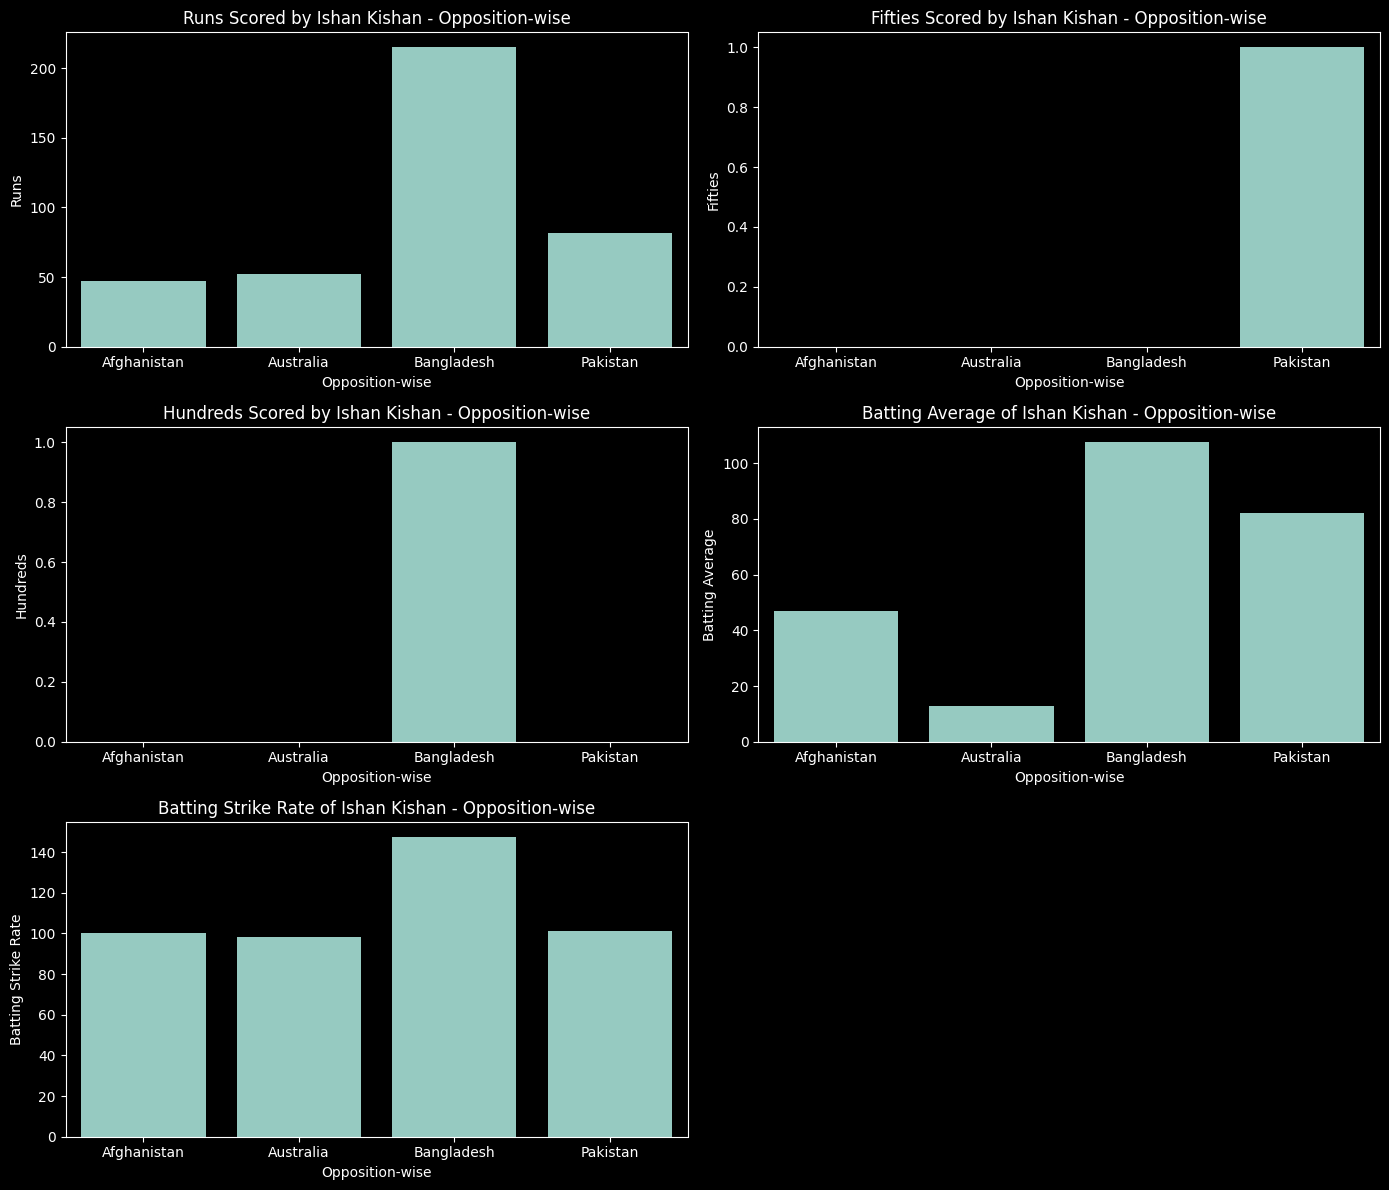

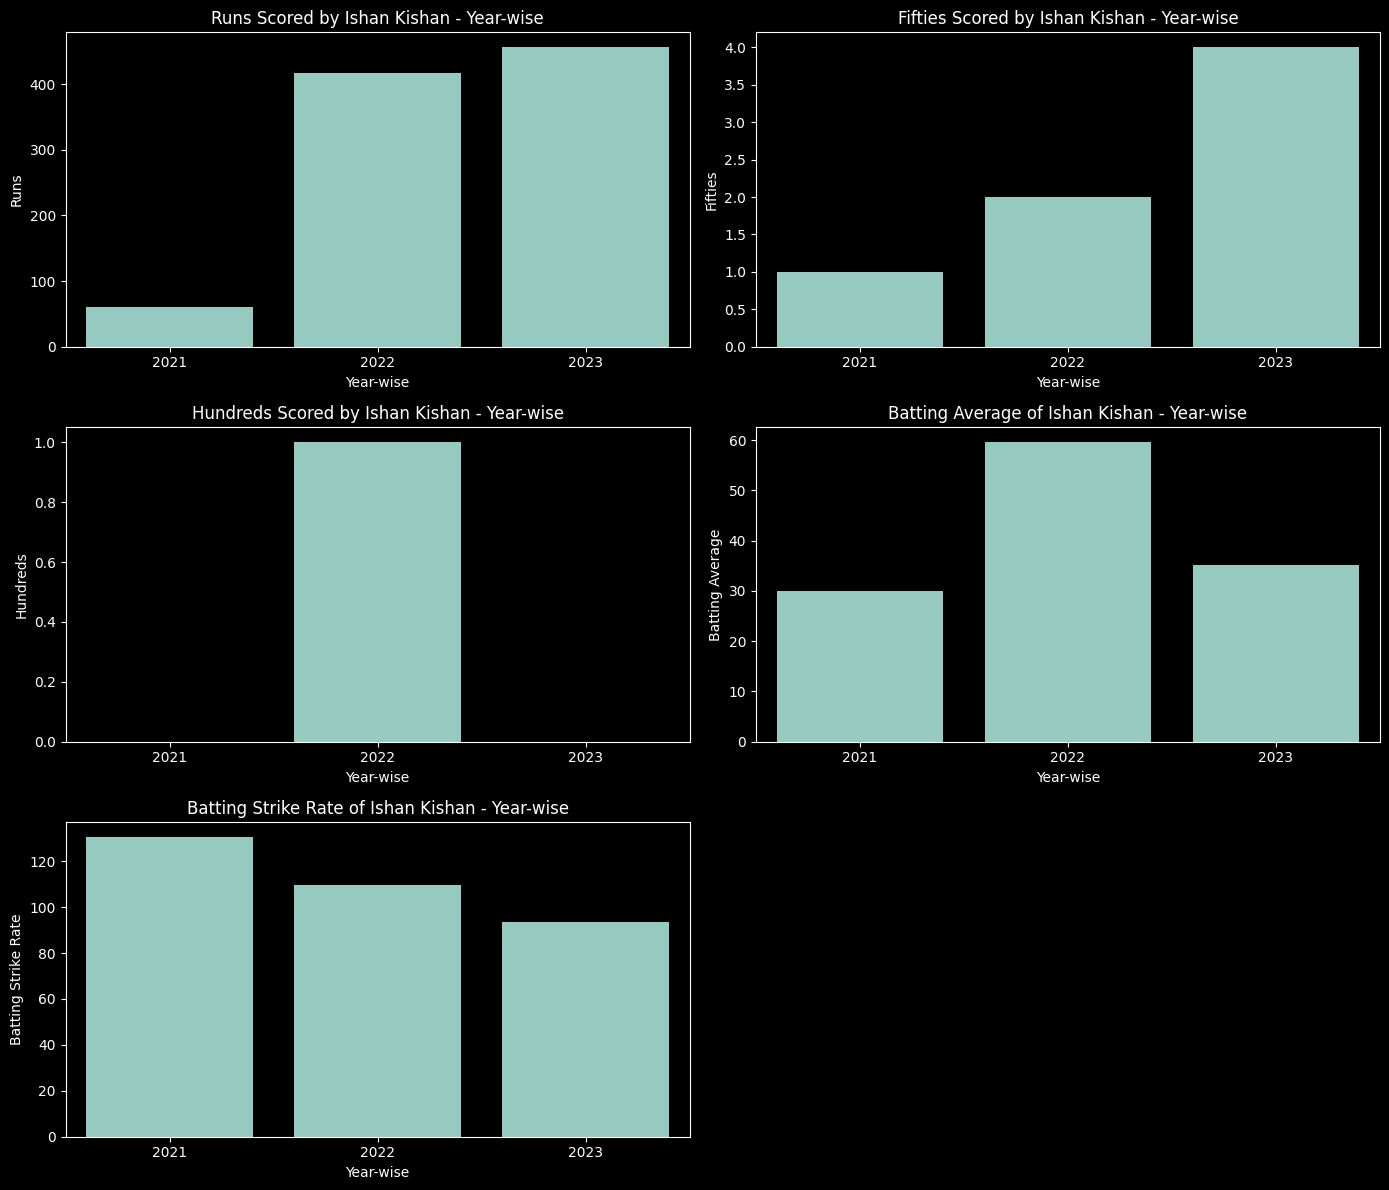

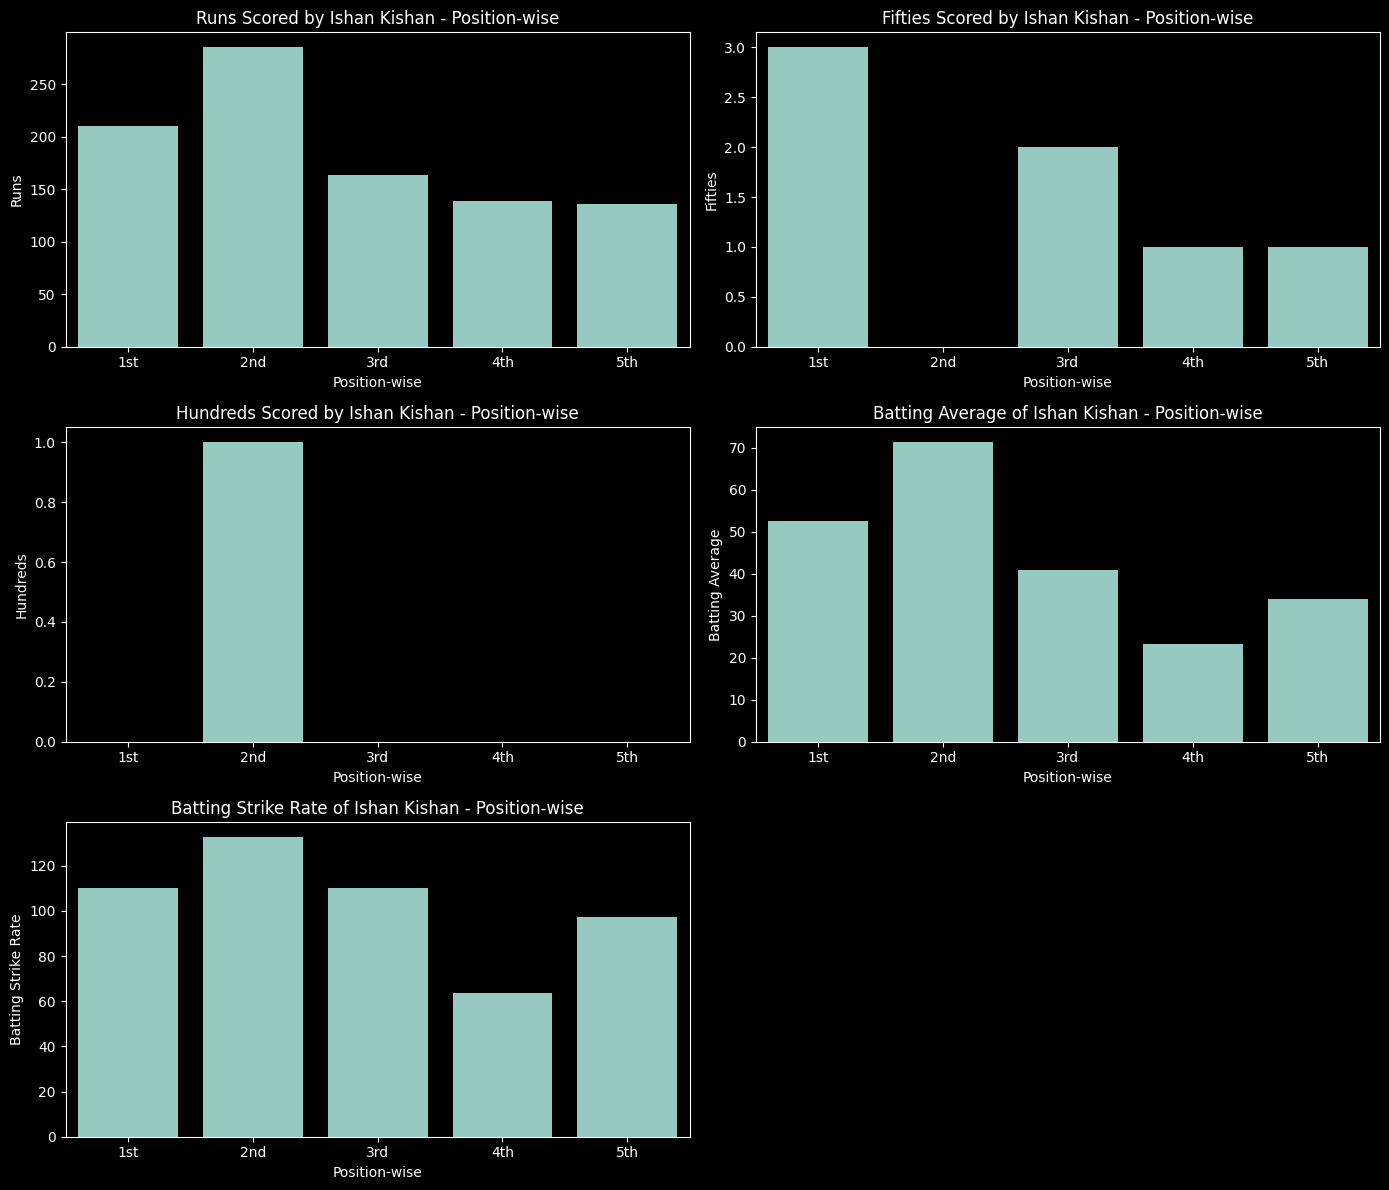

KL Rahul Batting Stats


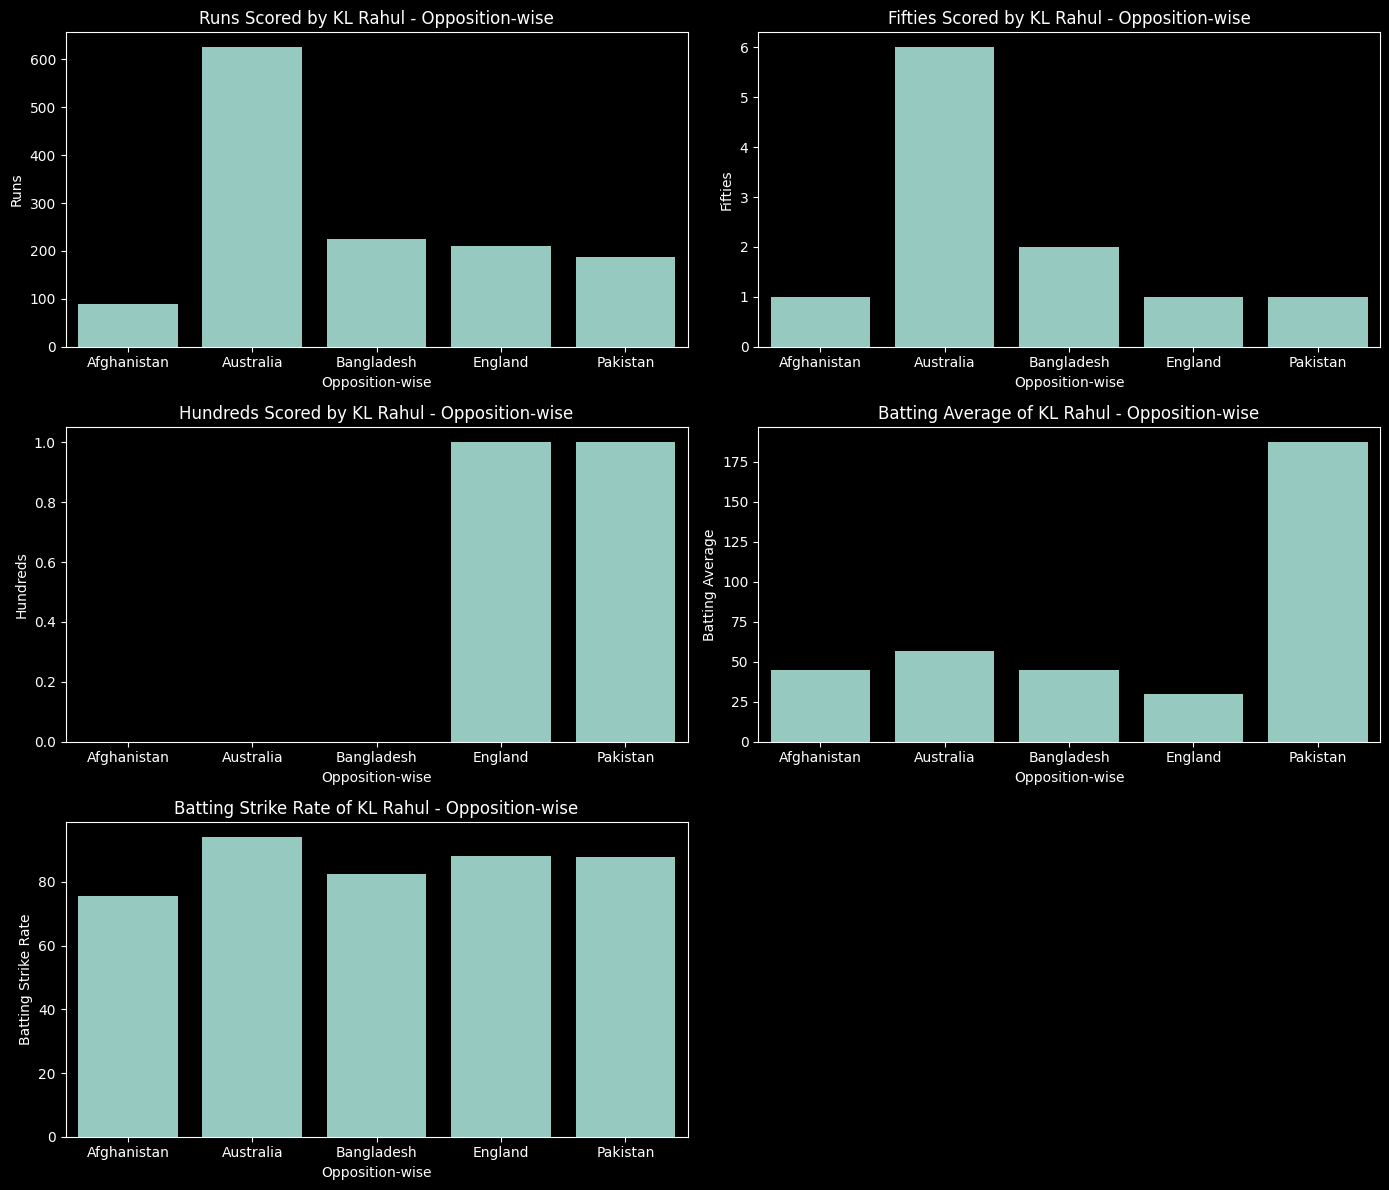

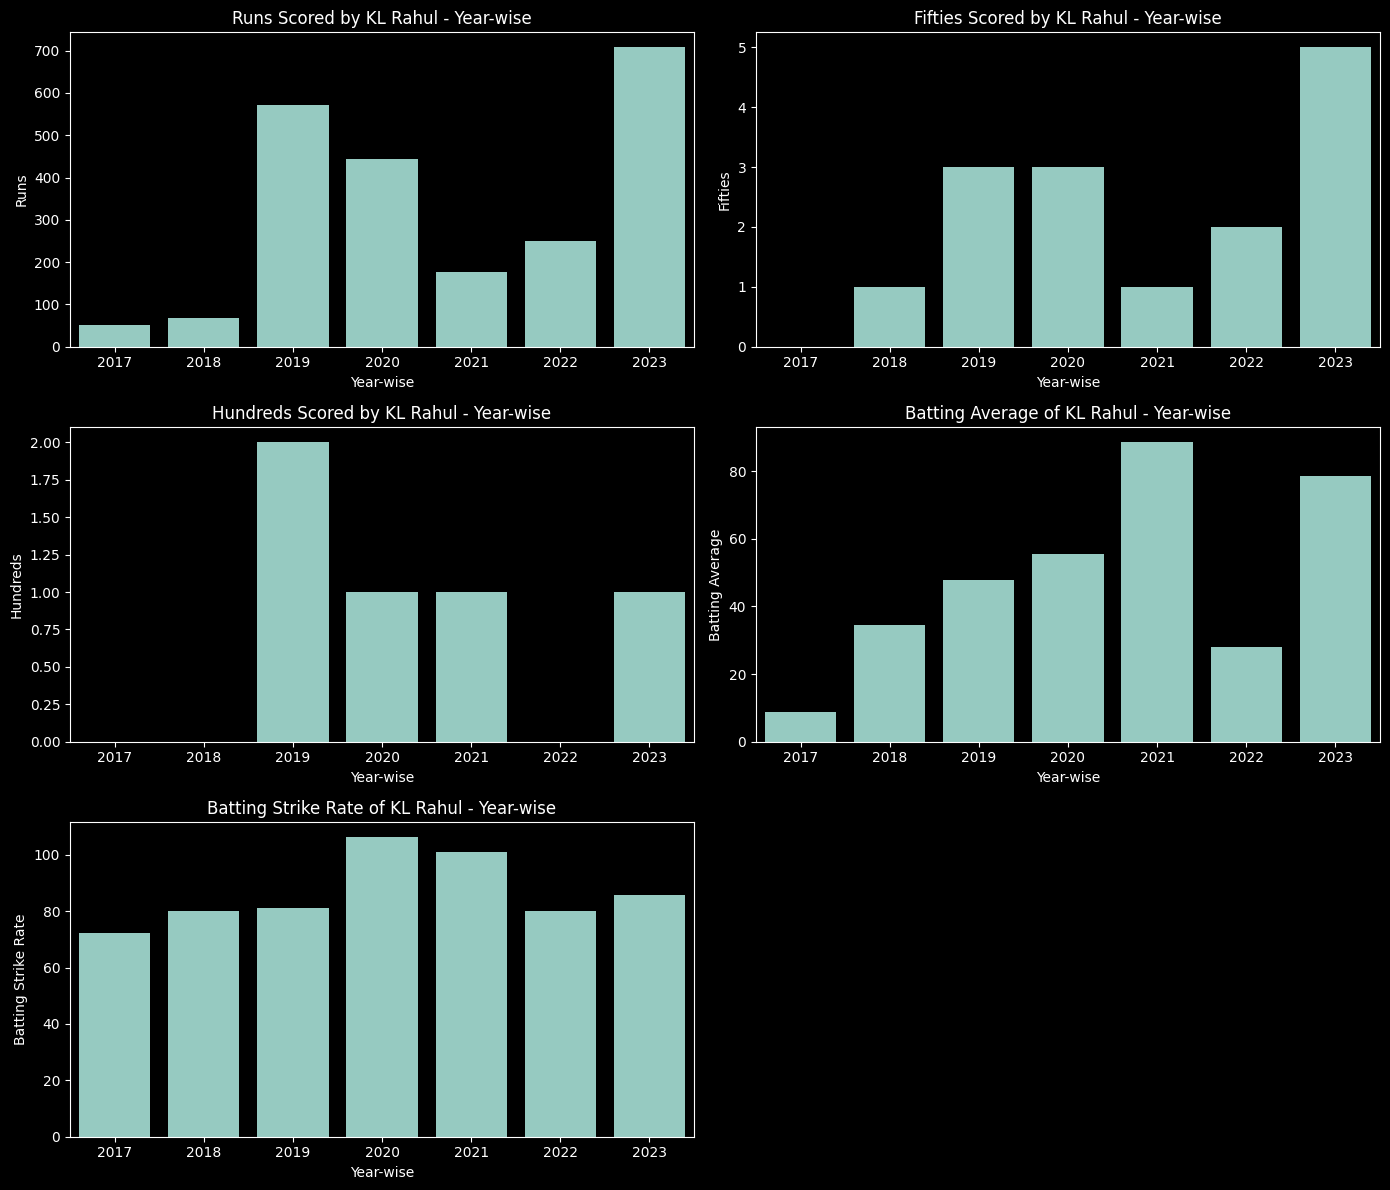

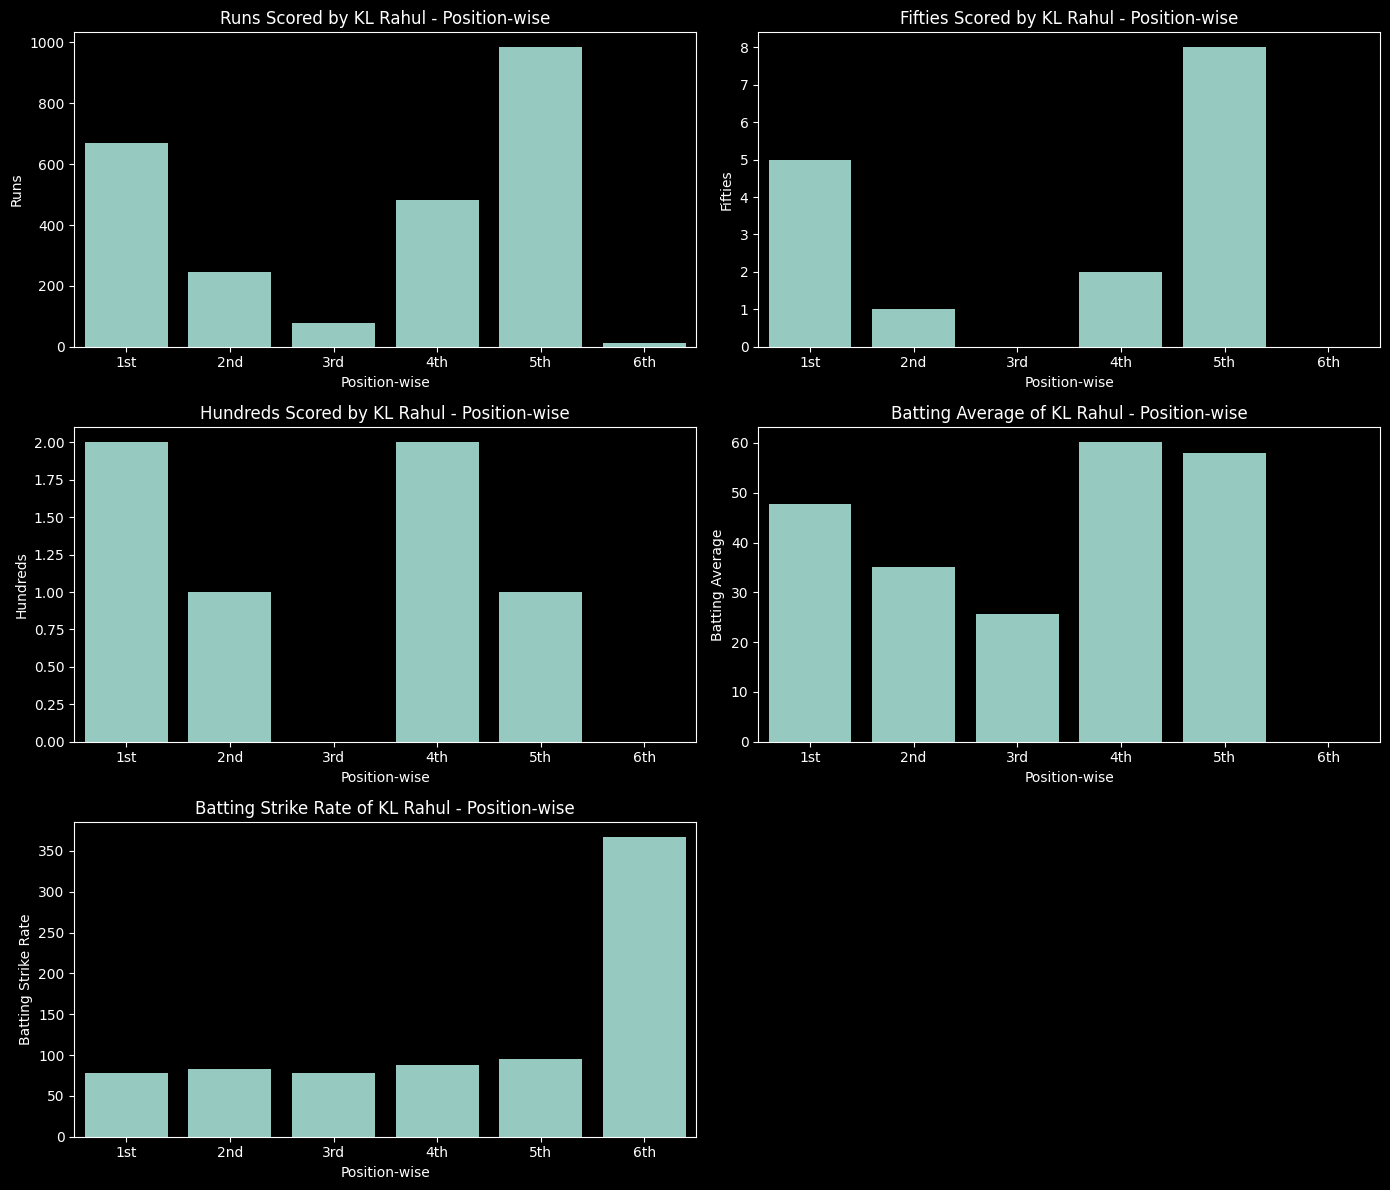

Suryakumar Yadav Batting Stats


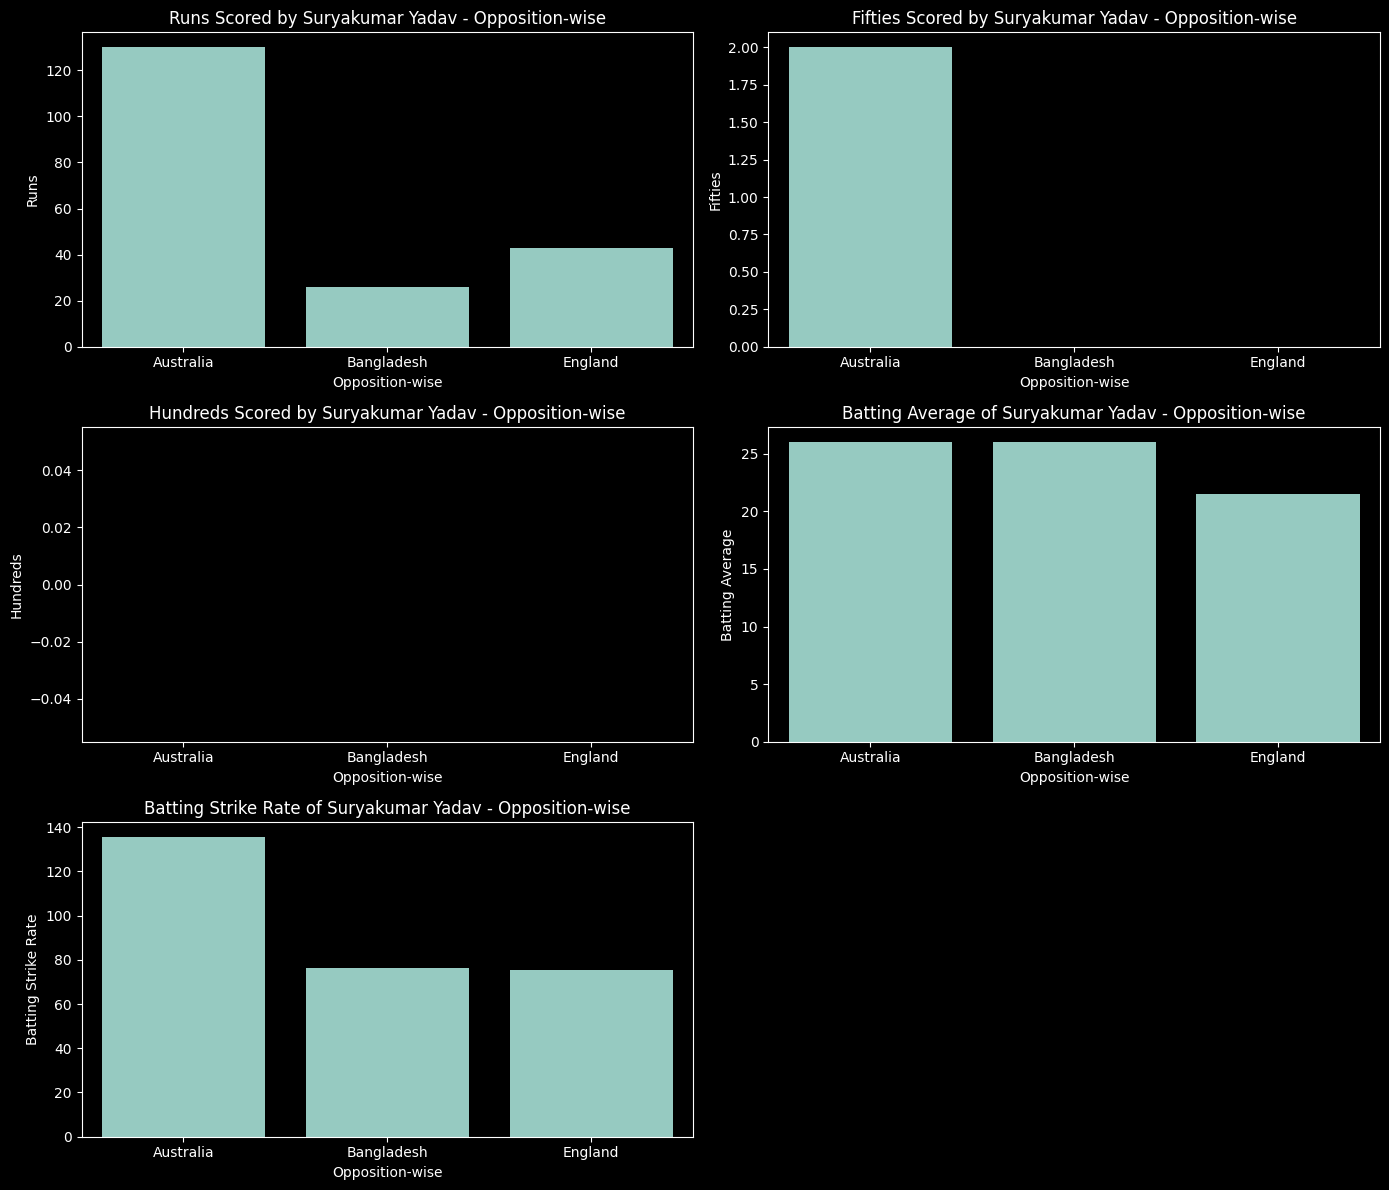

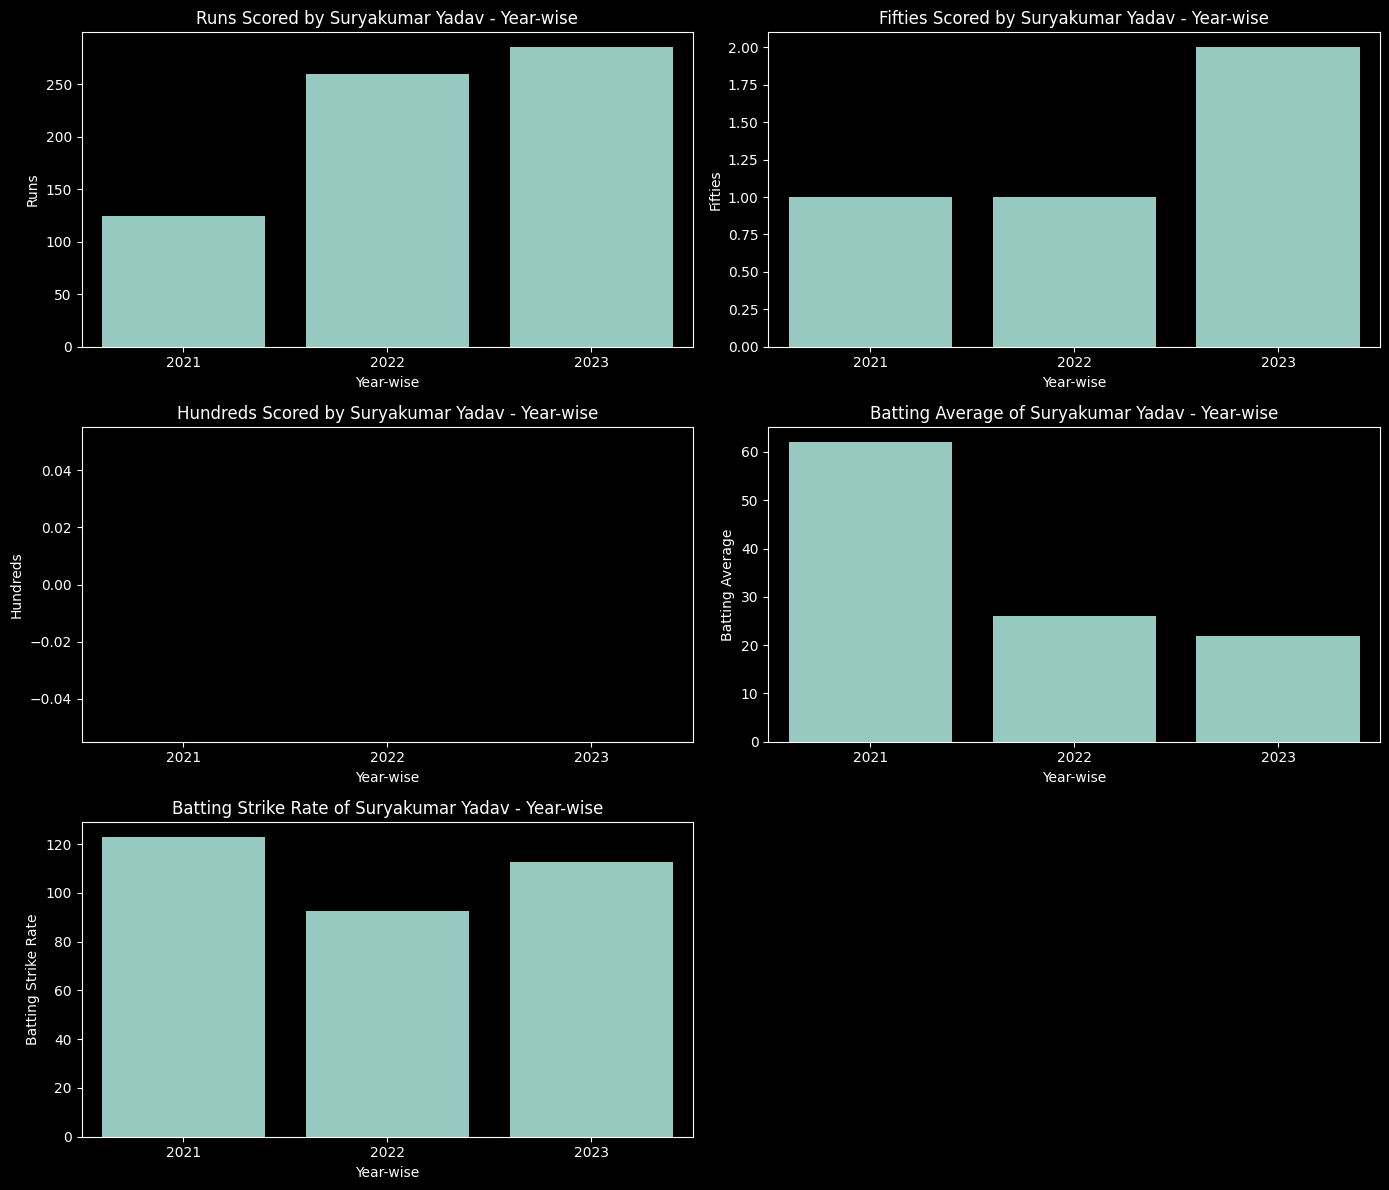

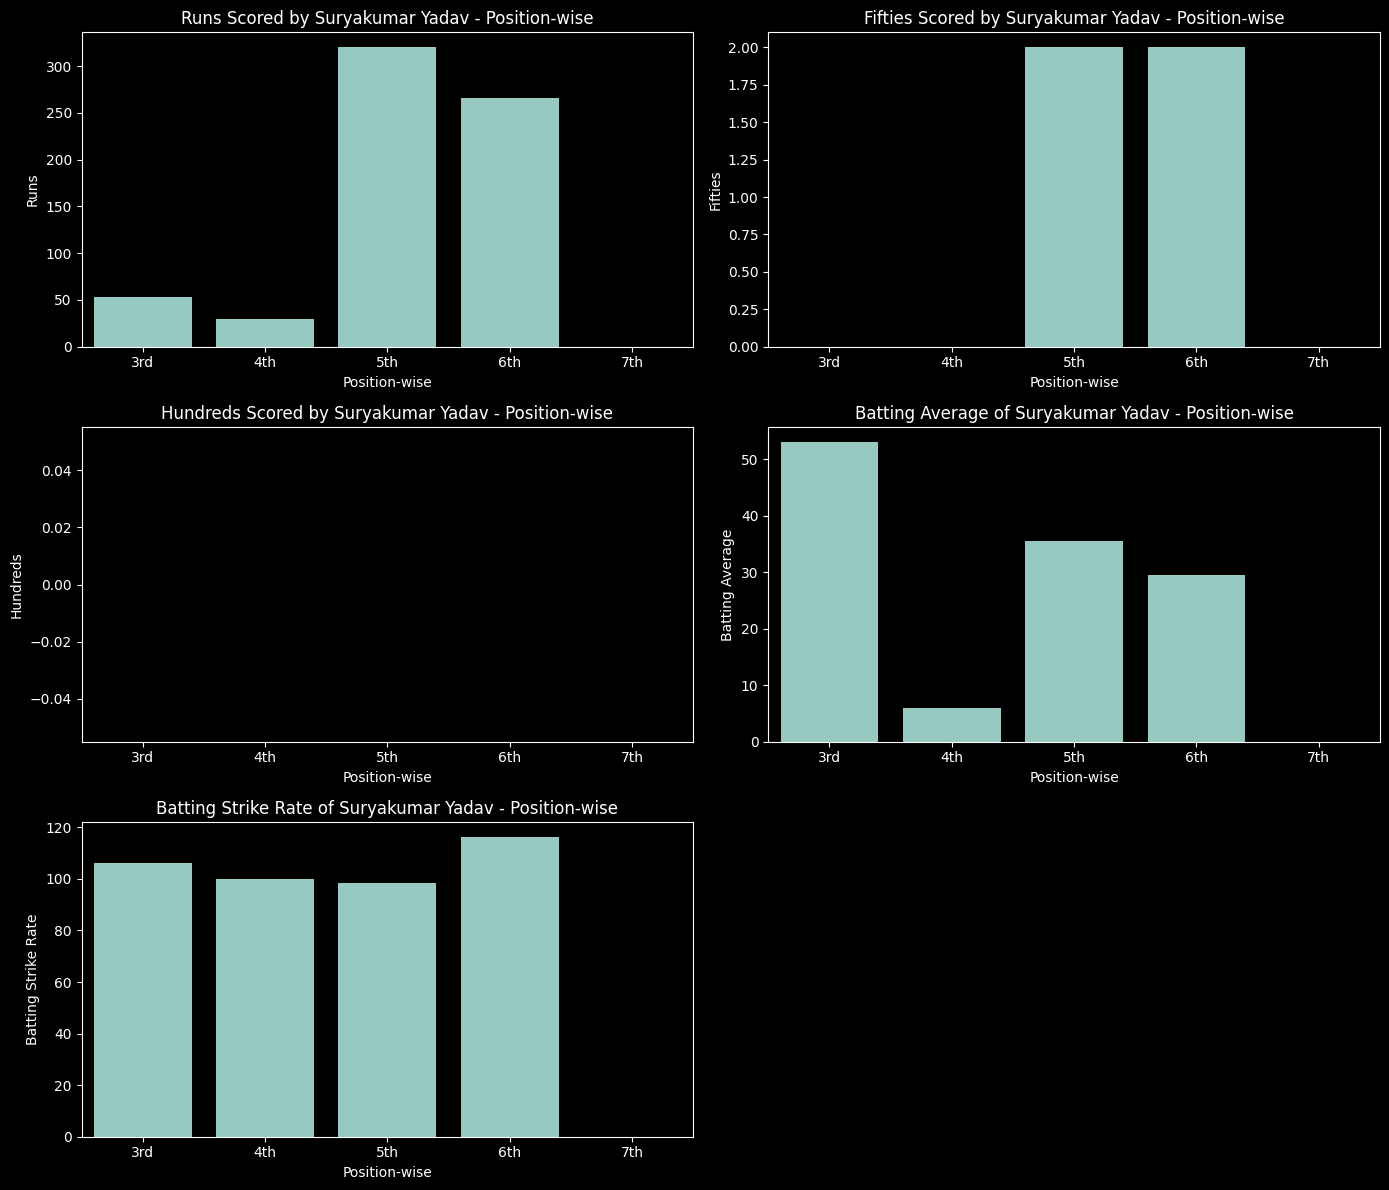

Ravindra Jadeja Batting Stats


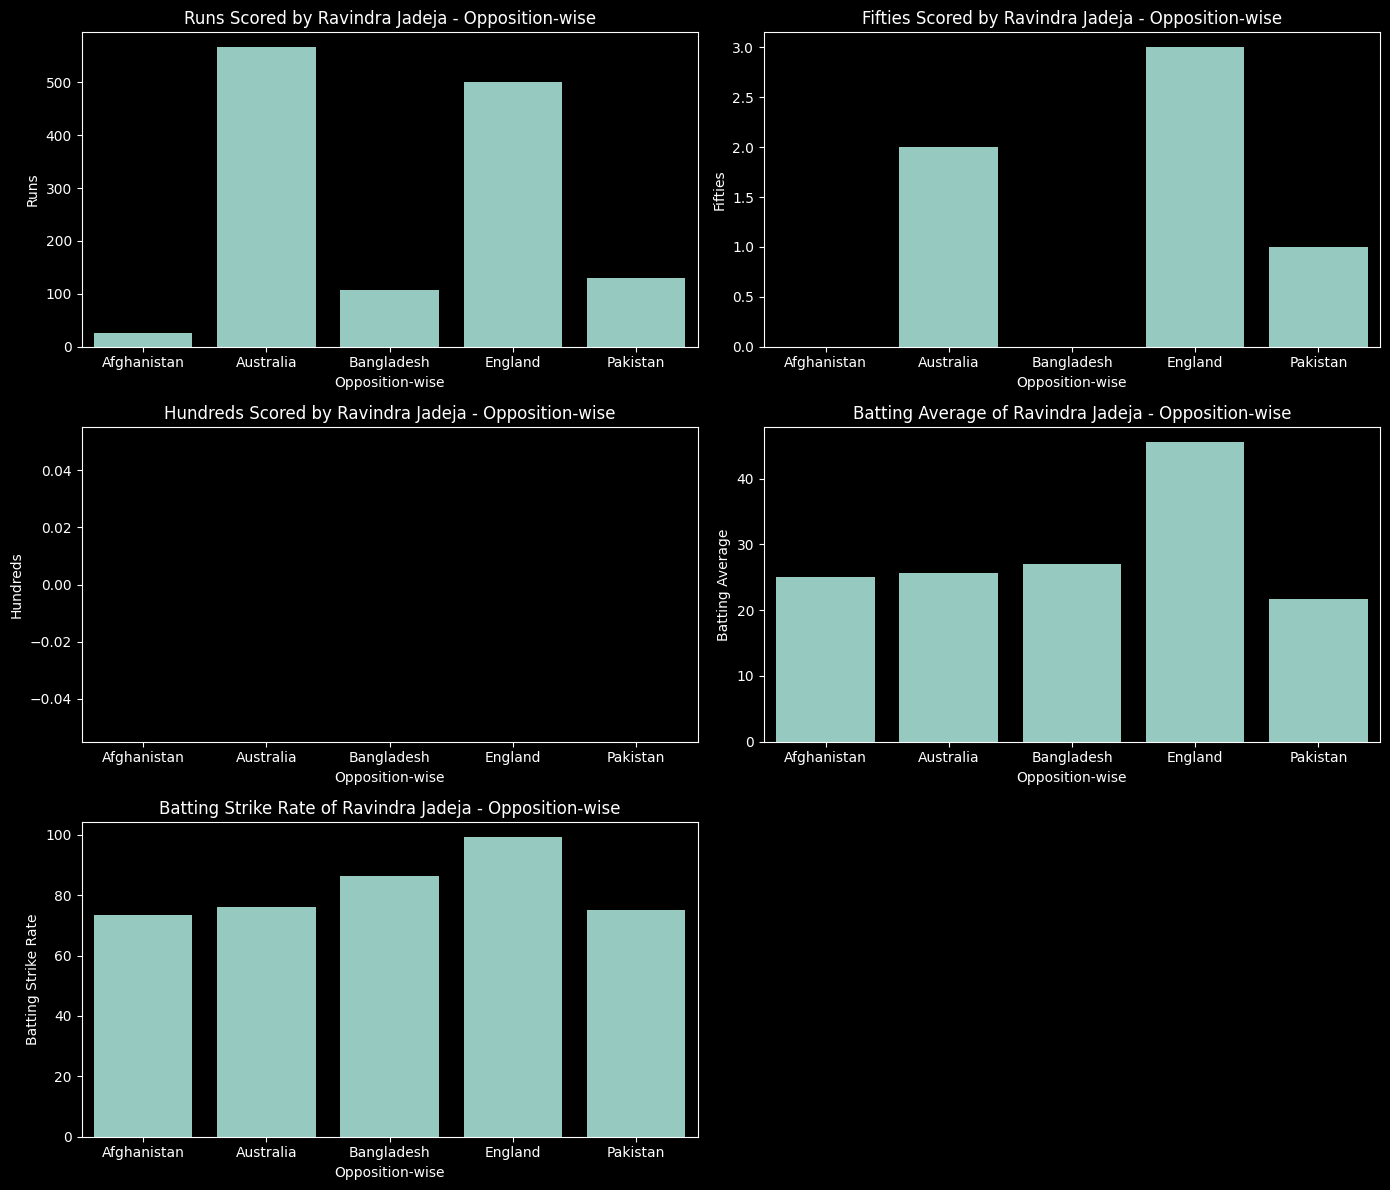

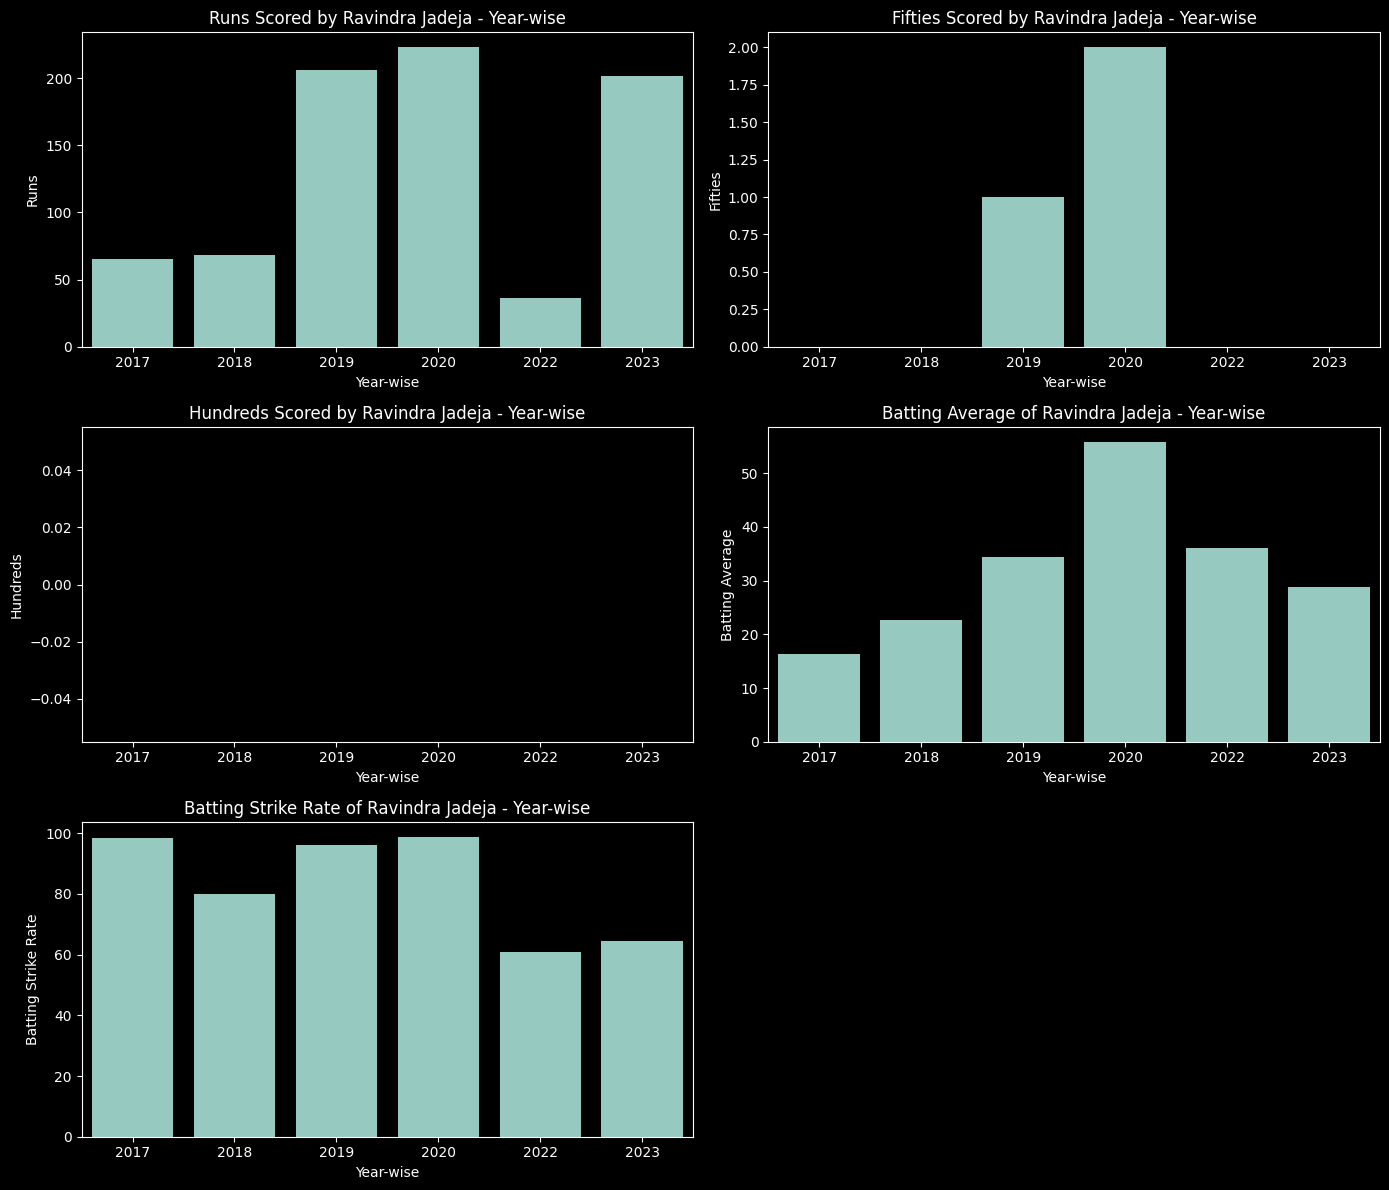

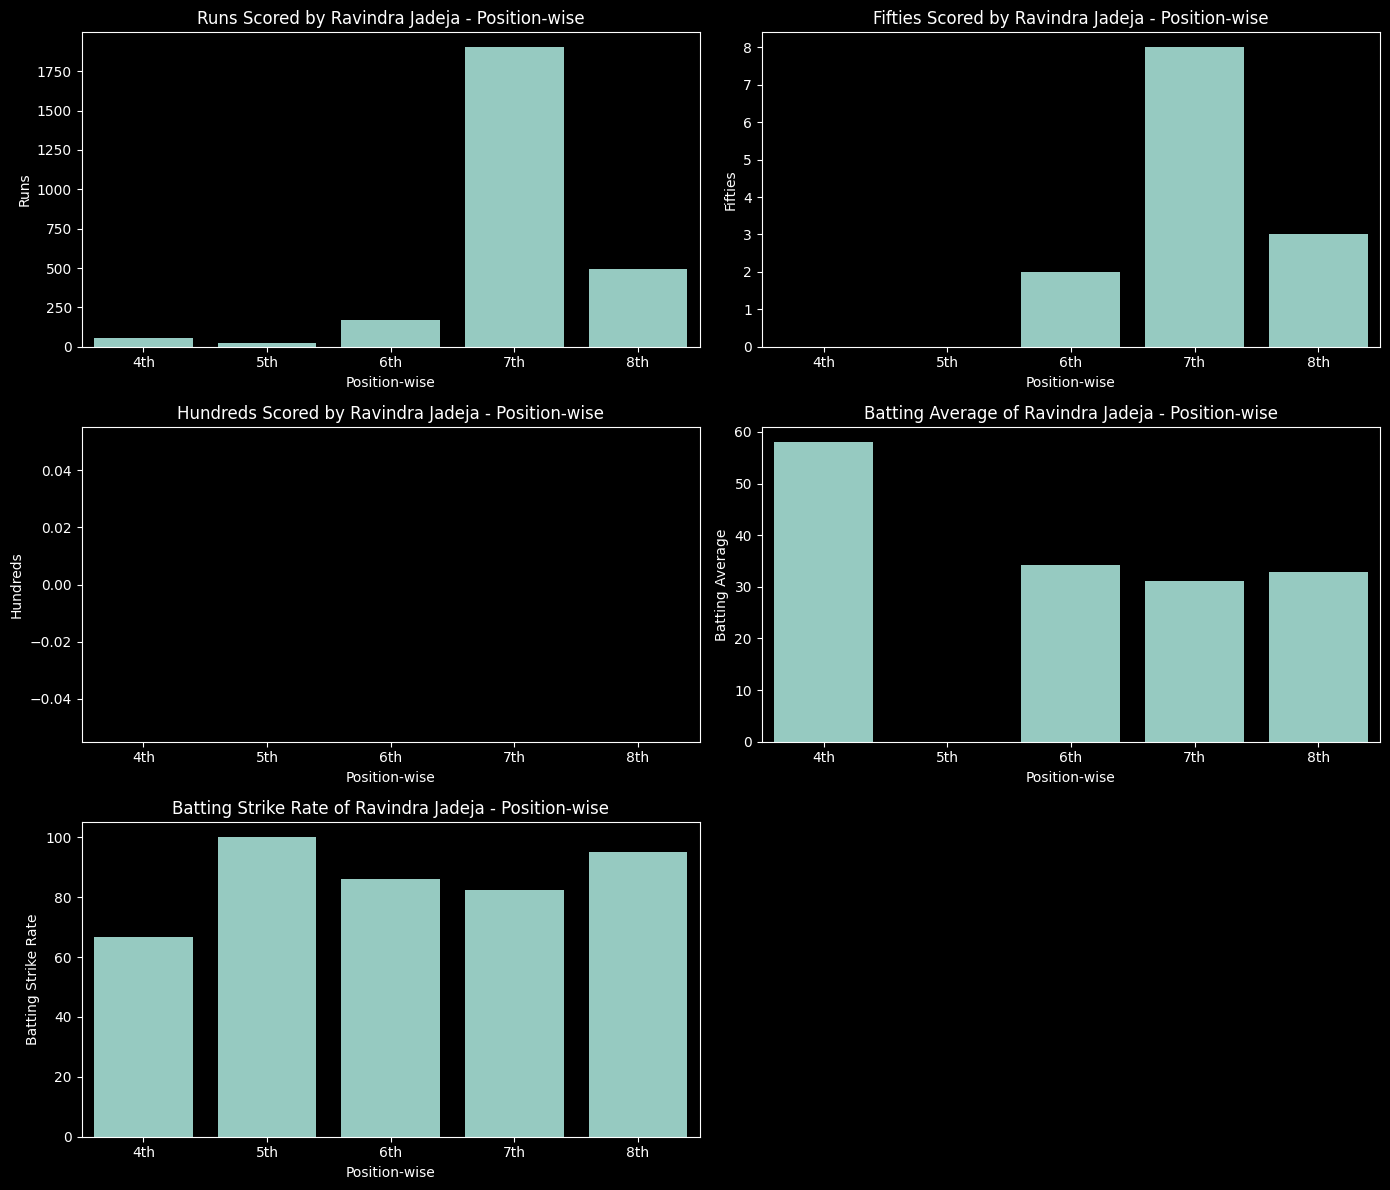

Axar Patel Batting Stats


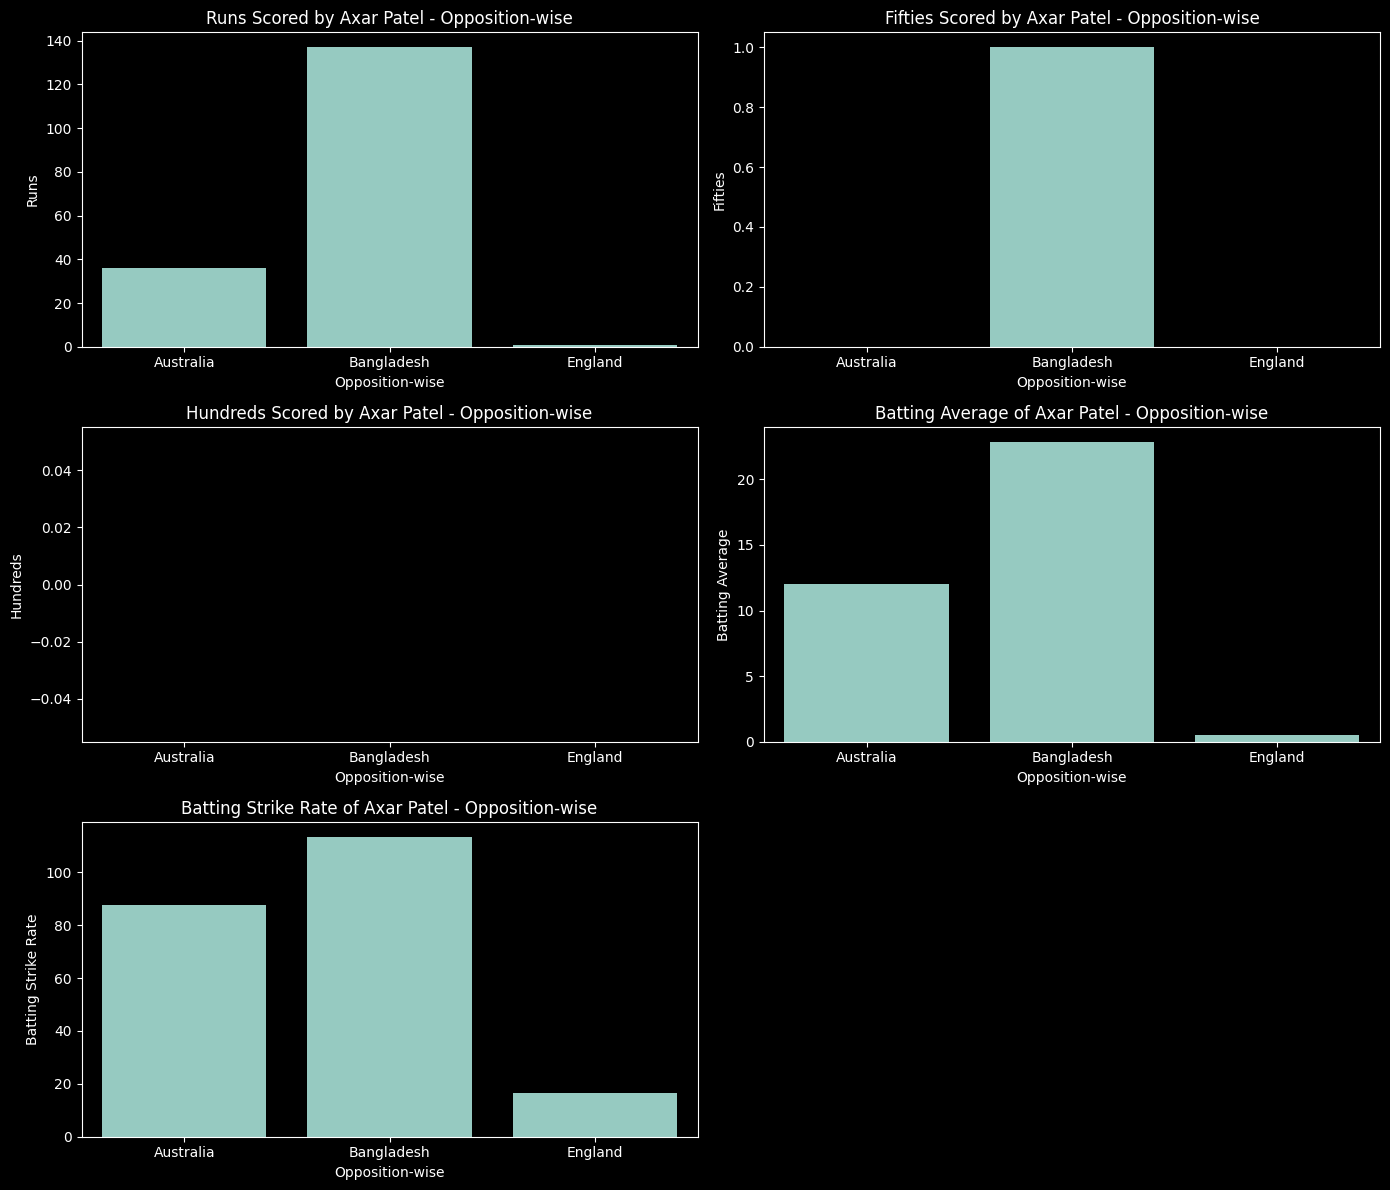

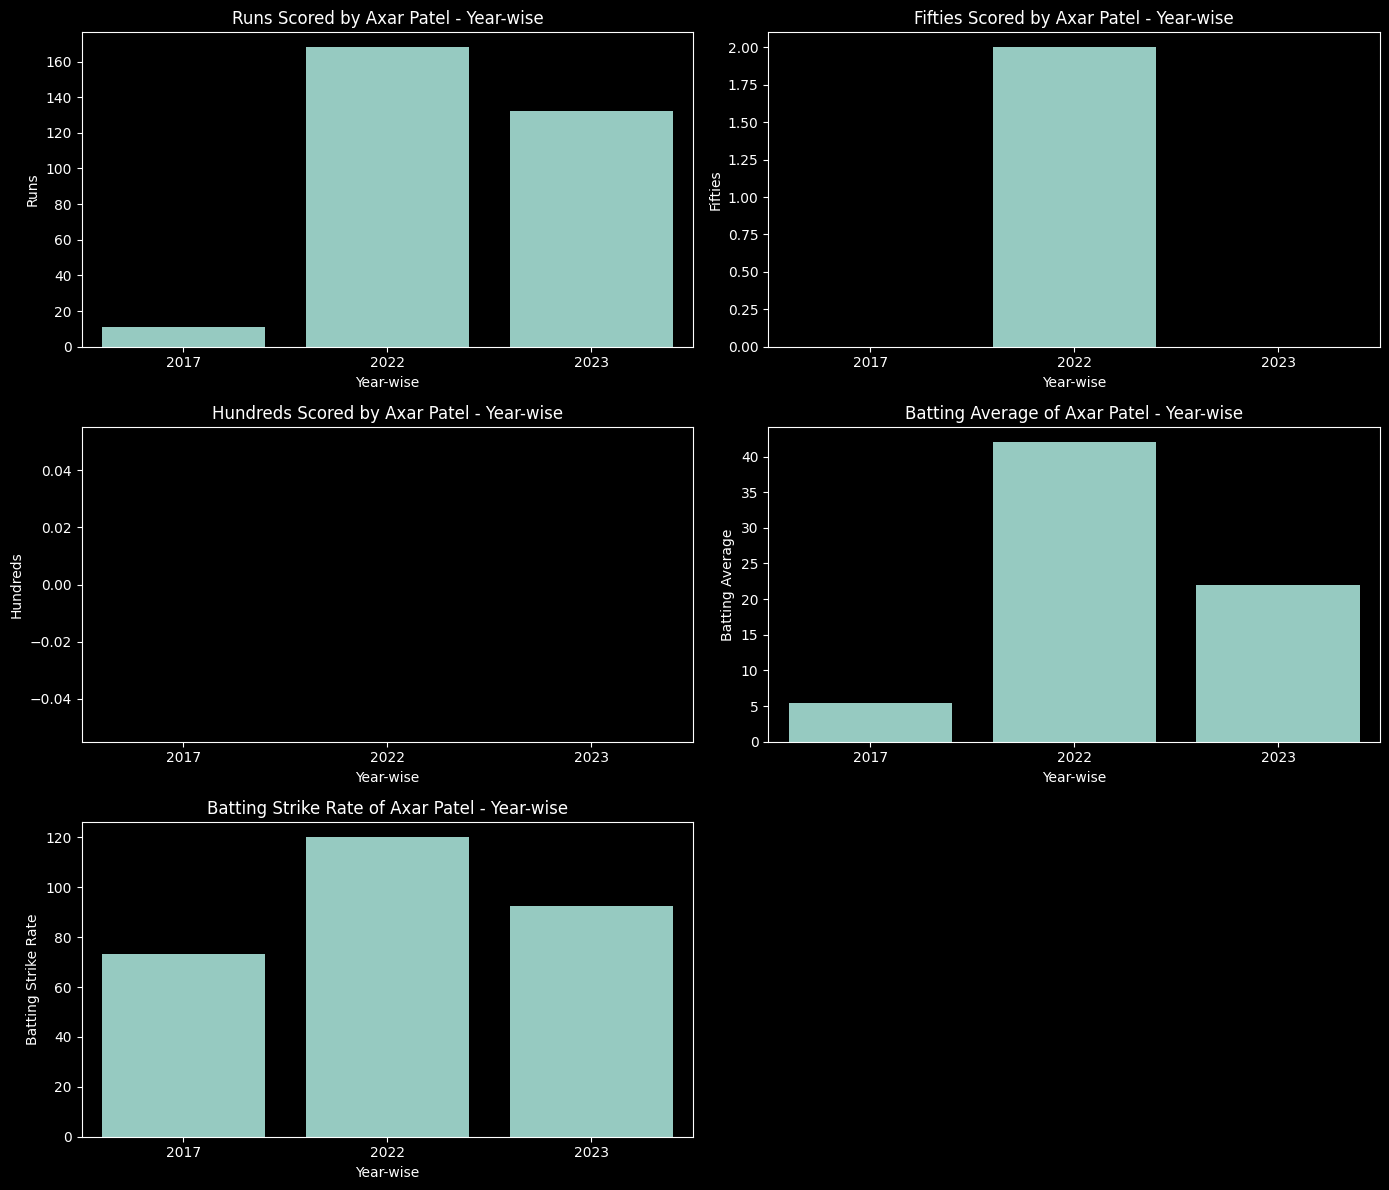

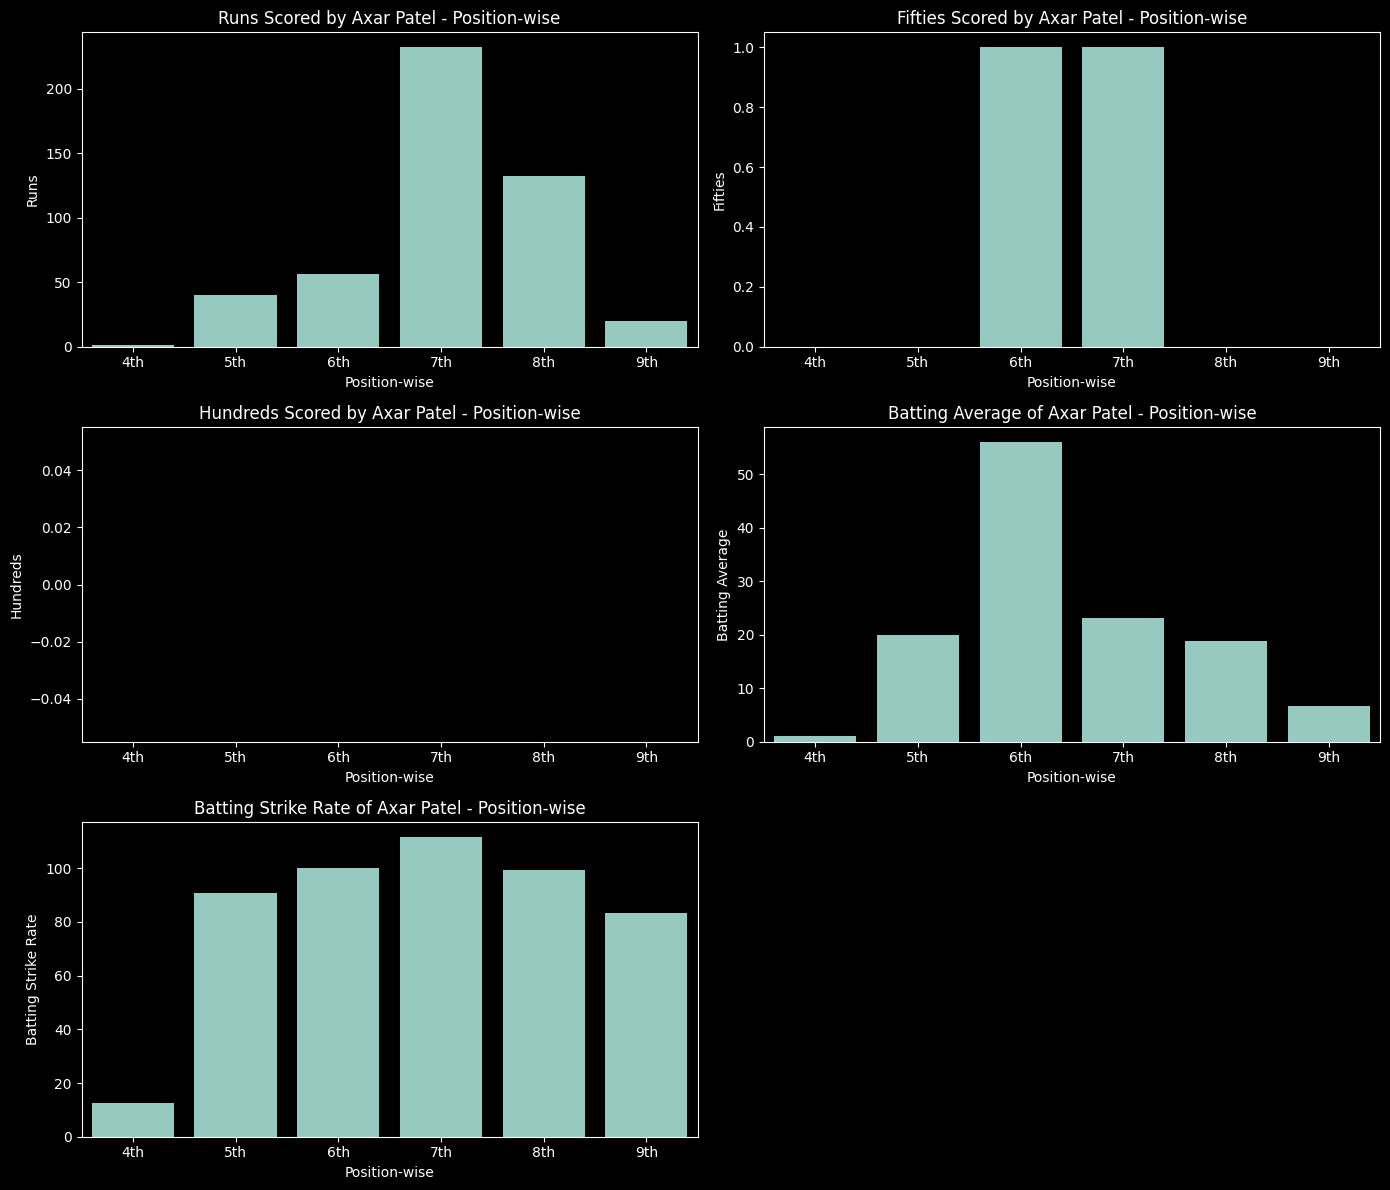

In [8]:
for player, roles in players_and_roles.items():
    if "batter" not in roles:
        continue
    
    player_name = player.lower().replace(" ", "_")

    player_data = read_player_data(player_name)

    opposition_stats_batting, yearwise_stats_batting, position_stats_batting = extract_batting_statistics(player_data)

    # Create DataFrames for plotting
    opposition_stats_batting_df = pd.DataFrame(opposition_stats_batting)
    yearwise_stats_batting_df = pd.DataFrame(yearwise_stats_batting)
    position_stats_batting_df = pd.DataFrame(position_stats_batting)

    print(f"{player} Batting Stats")
    for stats_batting_type, stats_batting_df in [("Opposition-wise", opposition_stats_batting_df),
                                 ("Year-wise", yearwise_stats_batting_df),
                                 ("Position-wise", position_stats_batting_df)]:
        if len(stats_batting_df):
            create_batting_eda_plots(player, stats_batting_type, stats_batting_df)


Hardik Pandya Bowling Stats


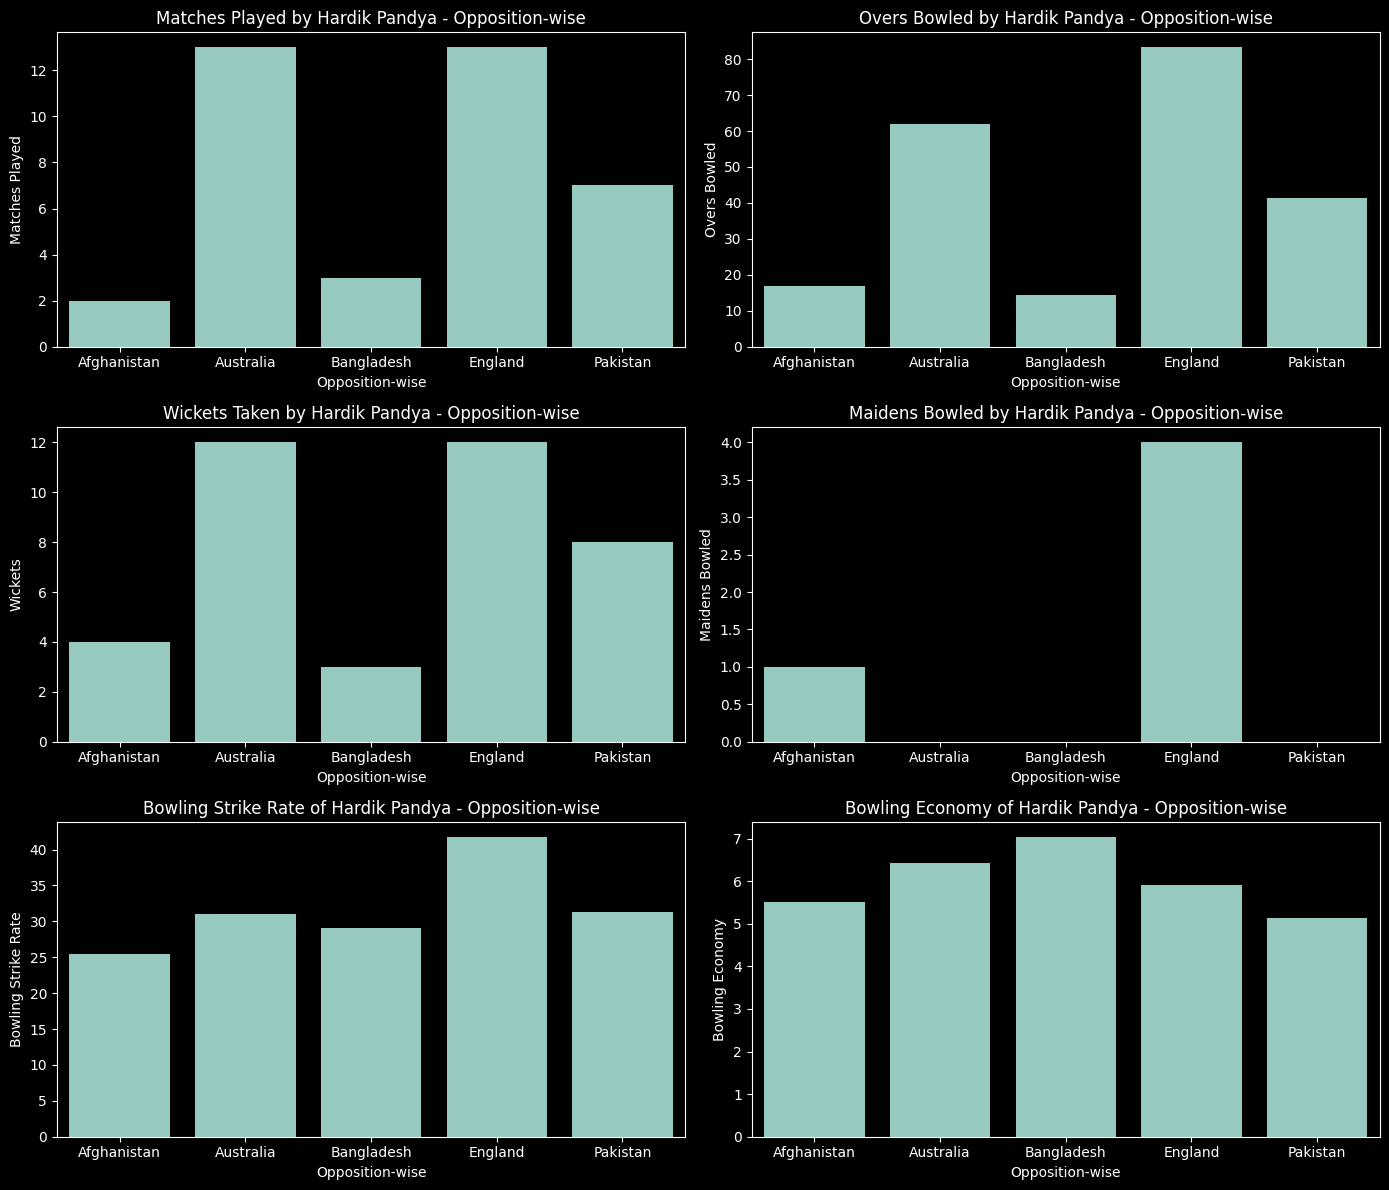

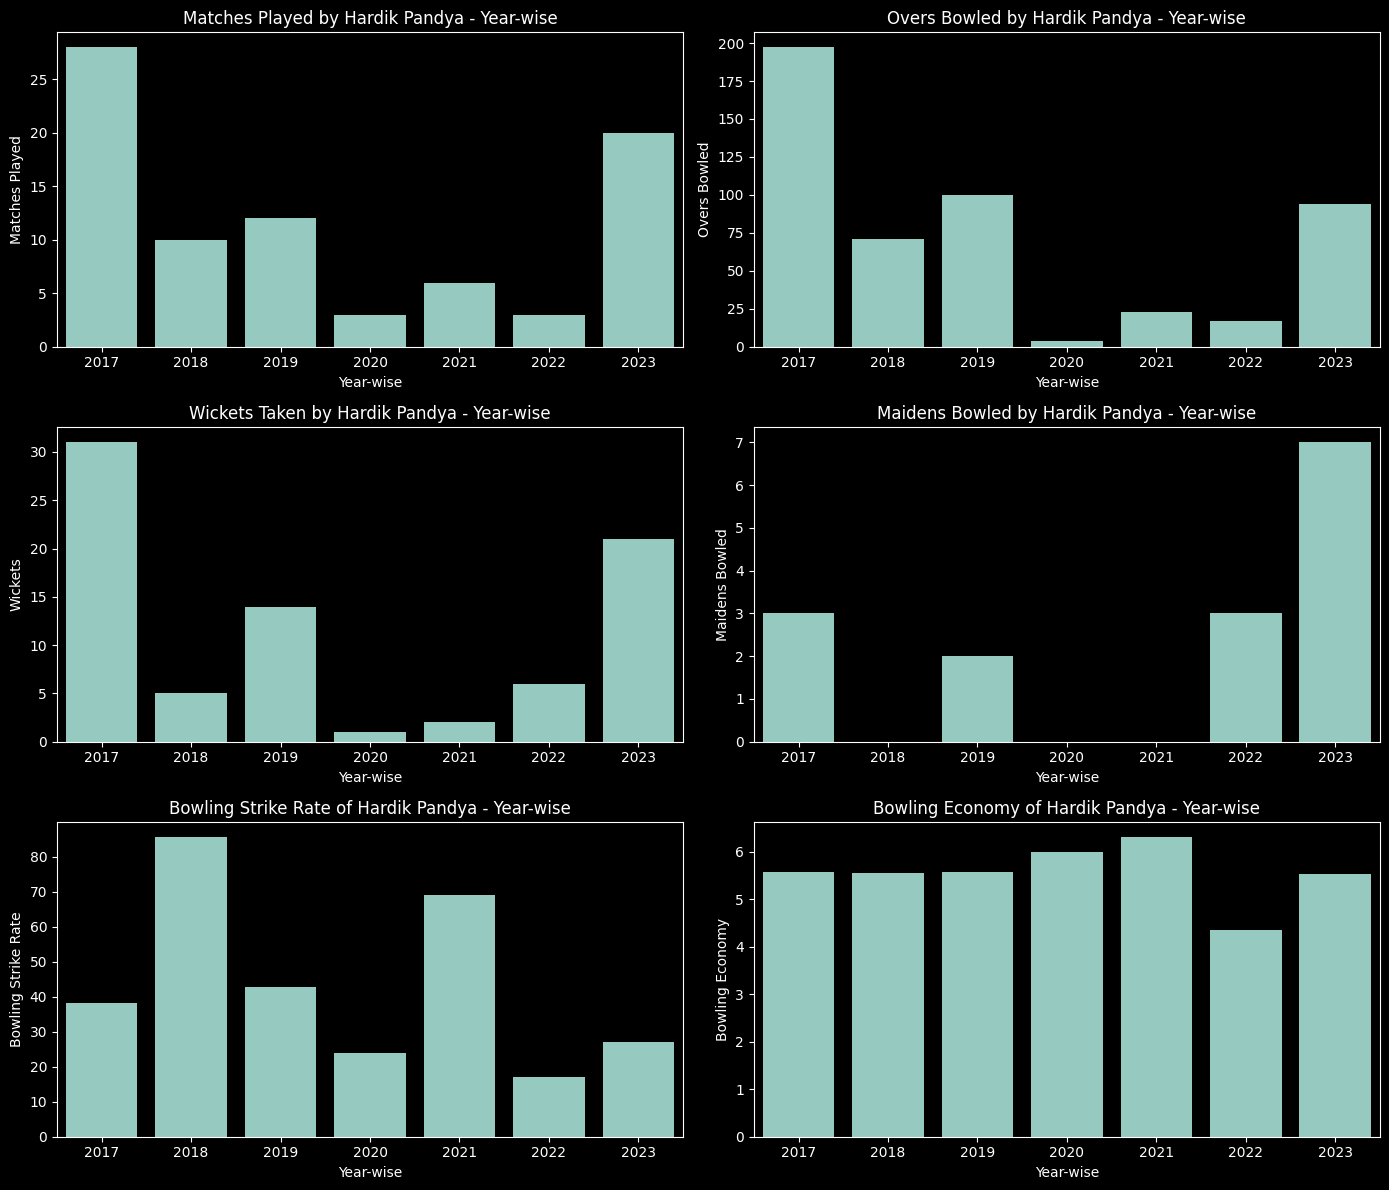

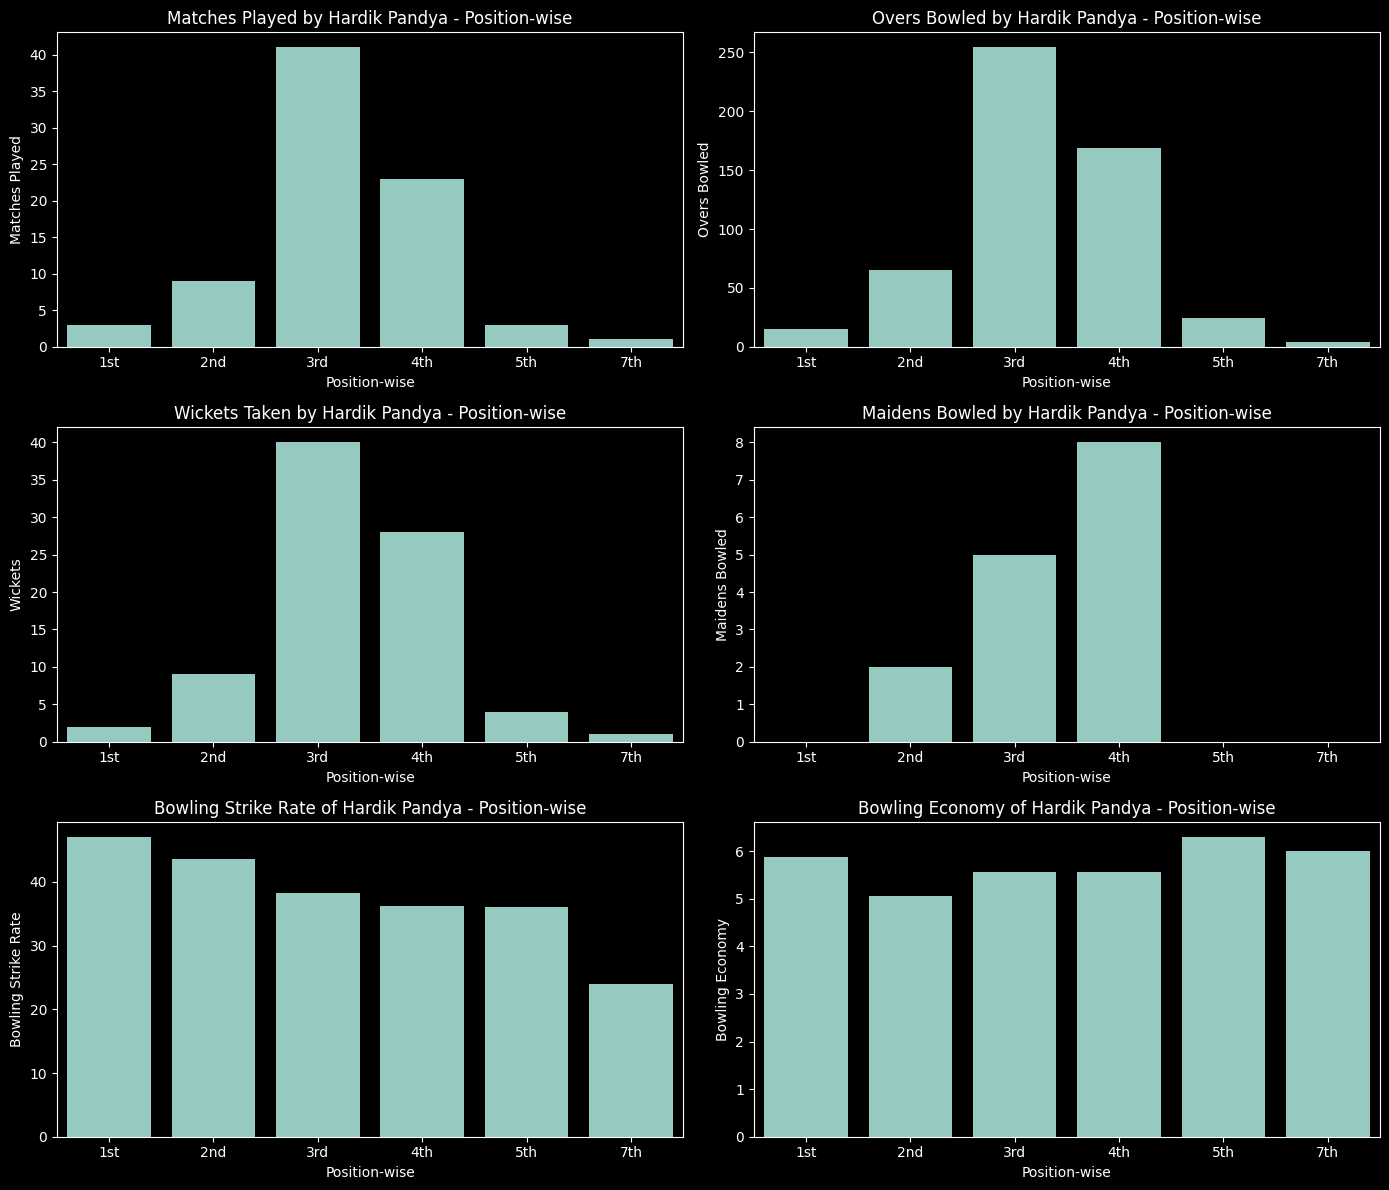

Ravindra Jadeja Bowling Stats


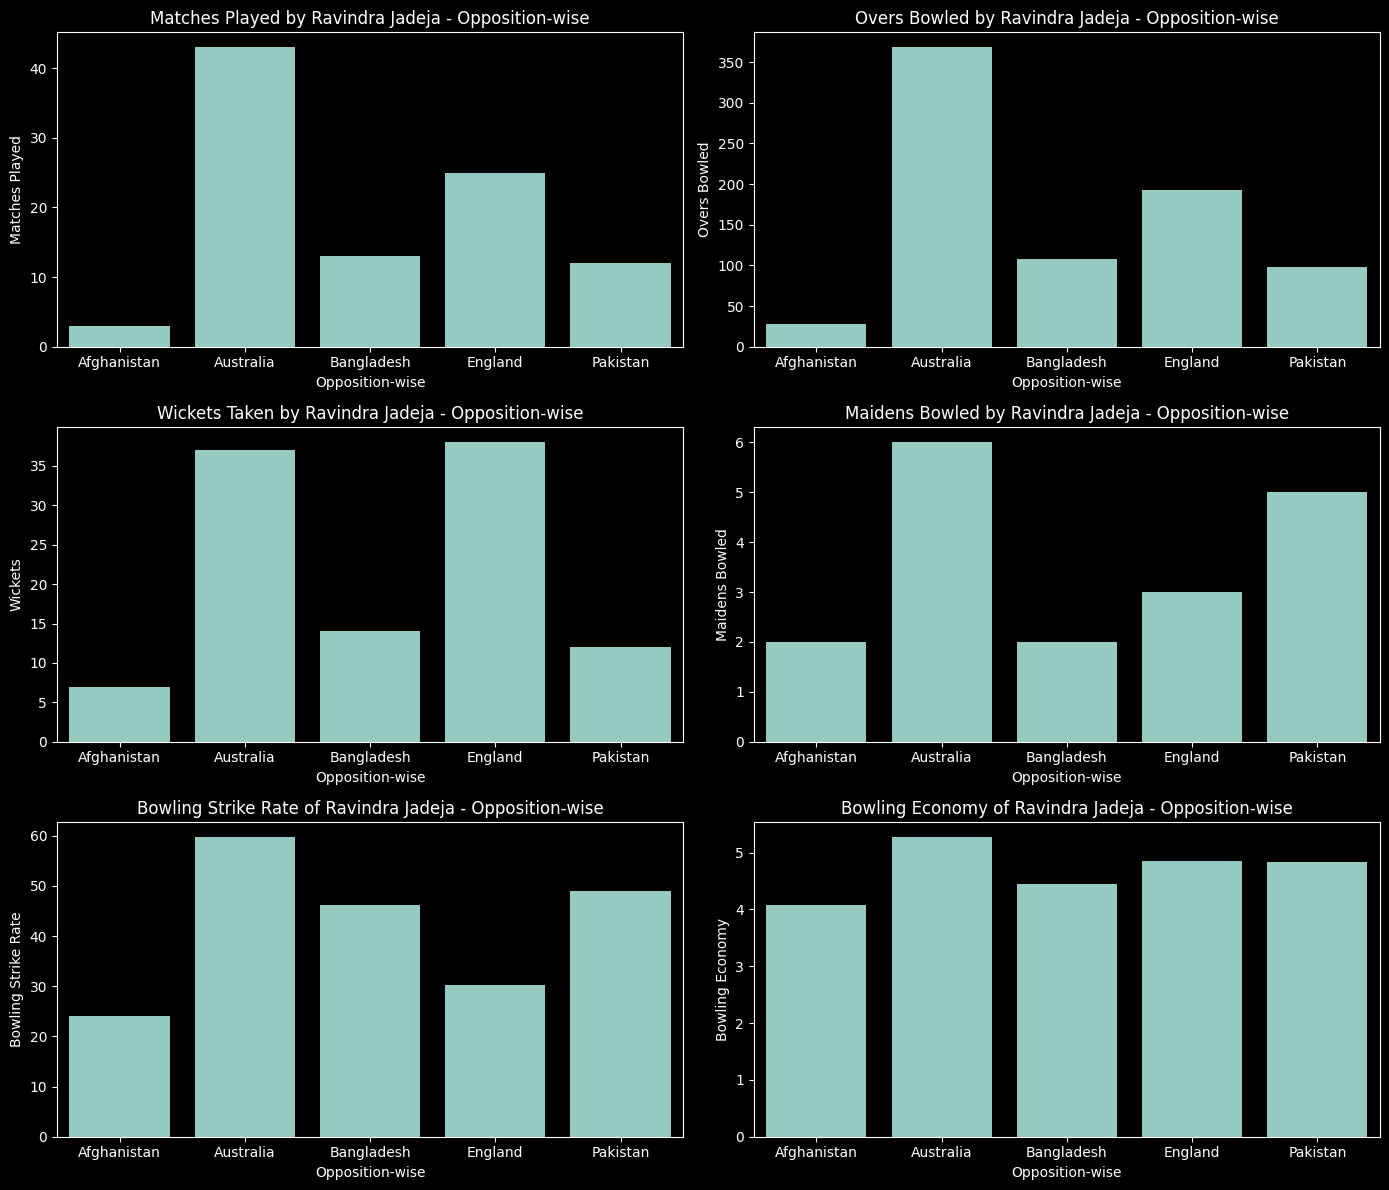

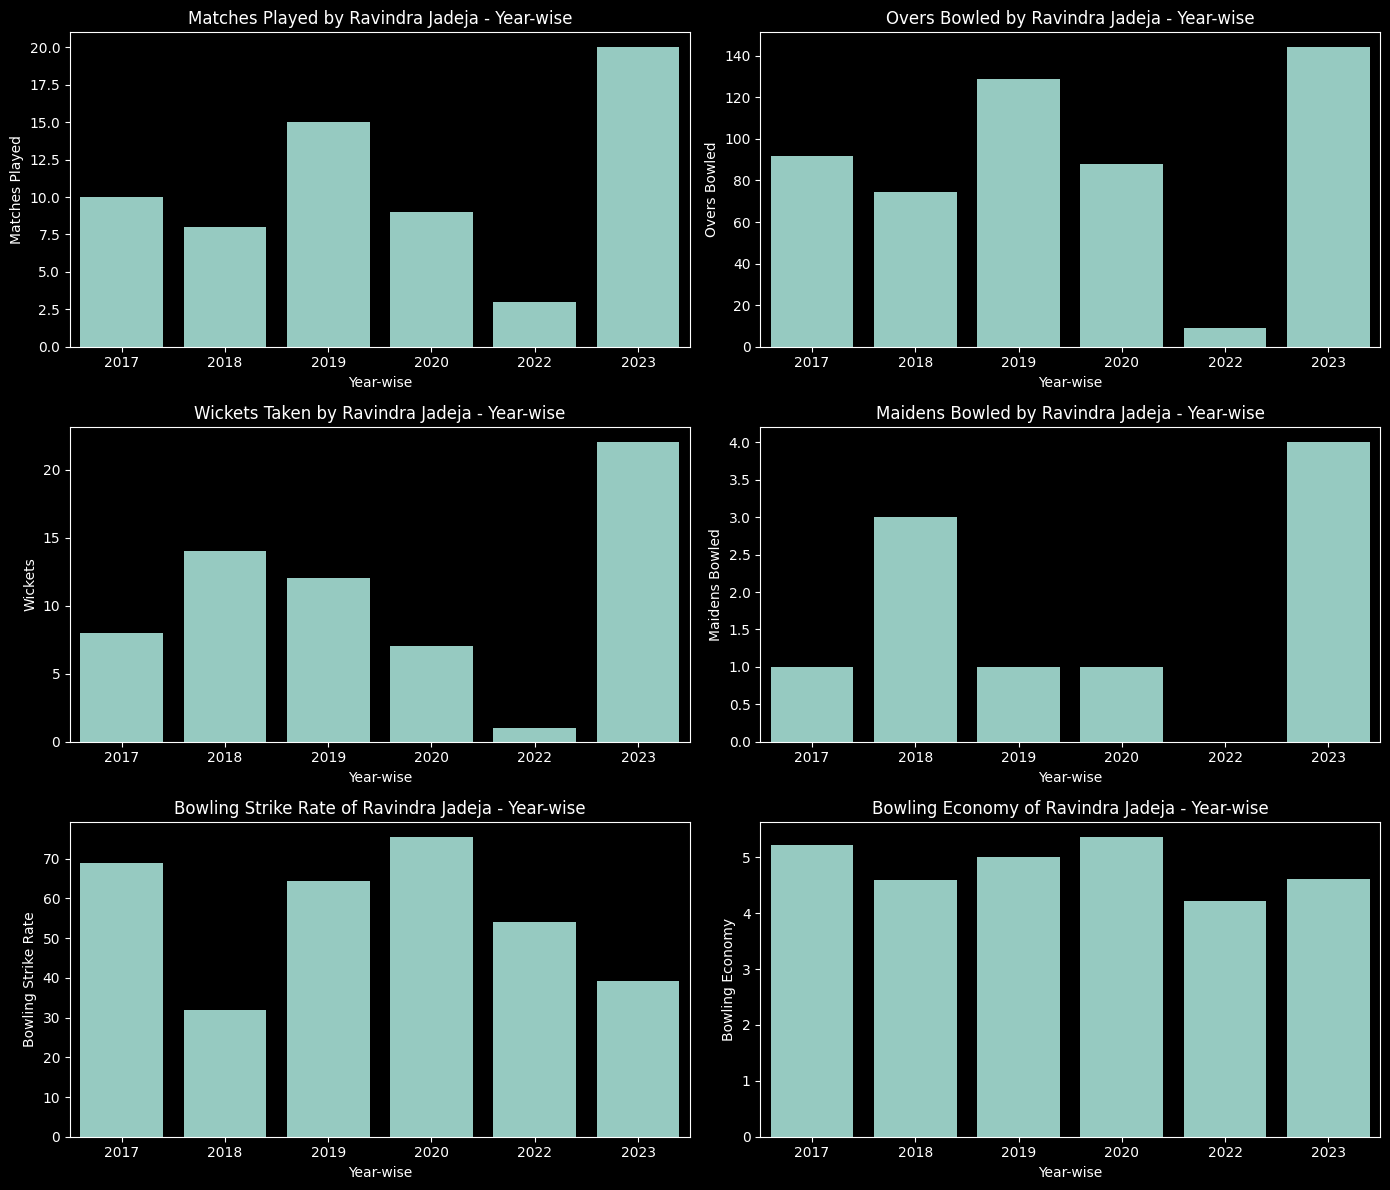

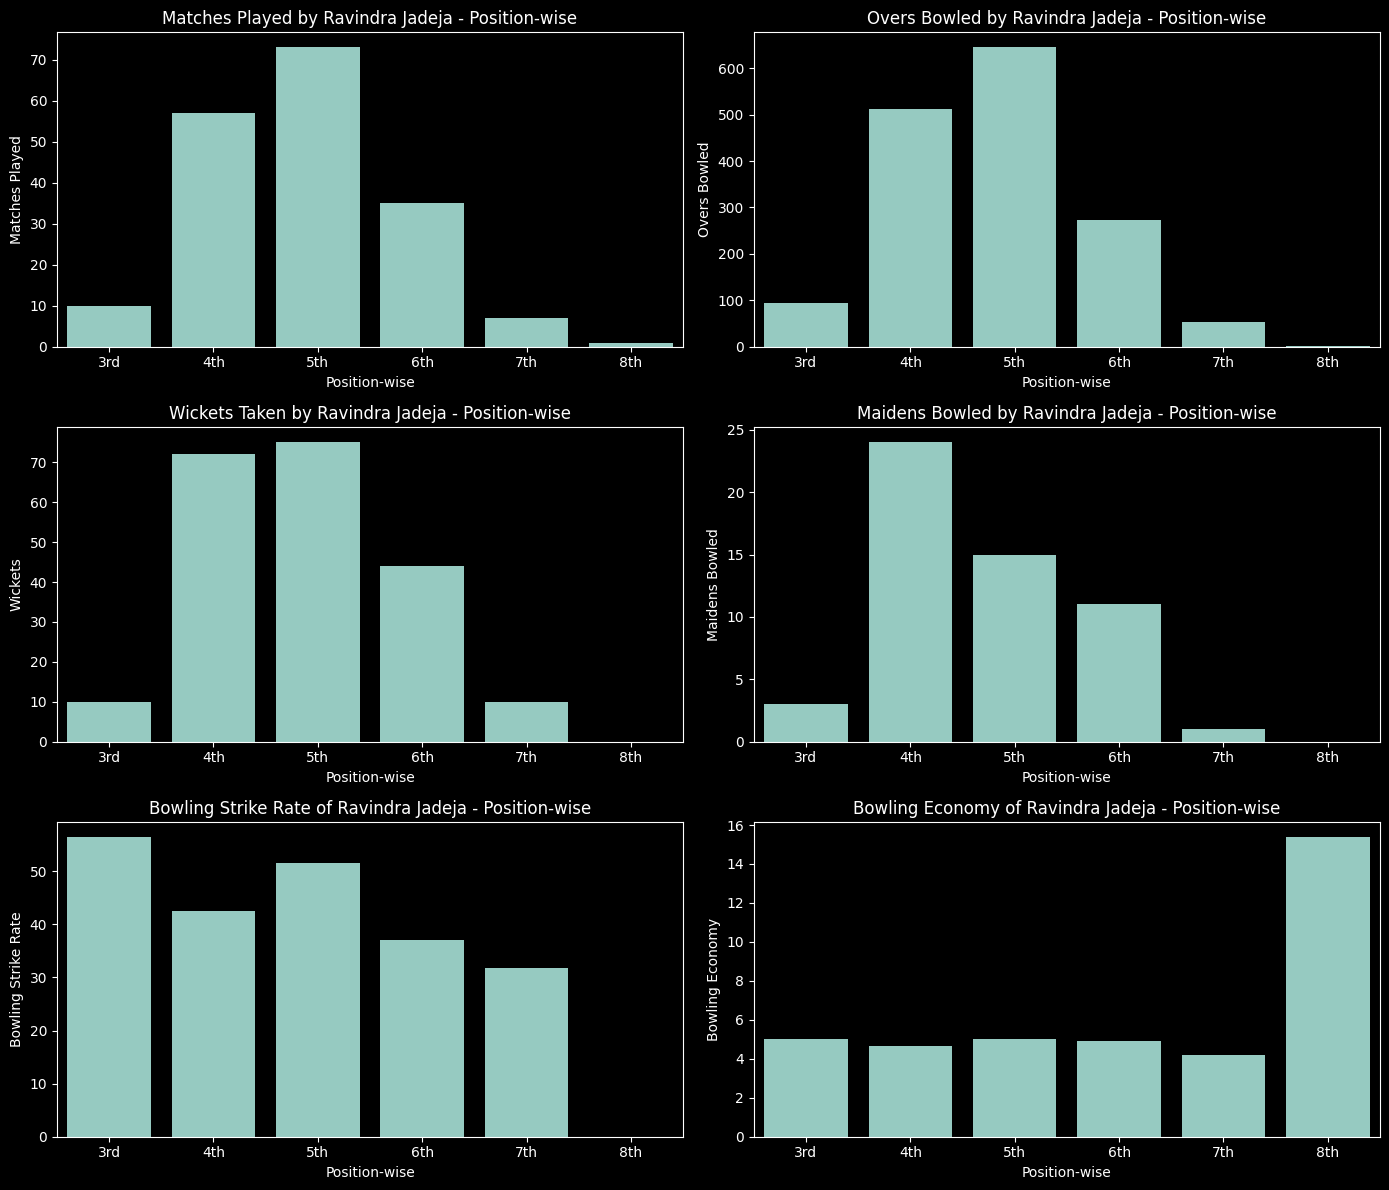

Axar Patel Bowling Stats


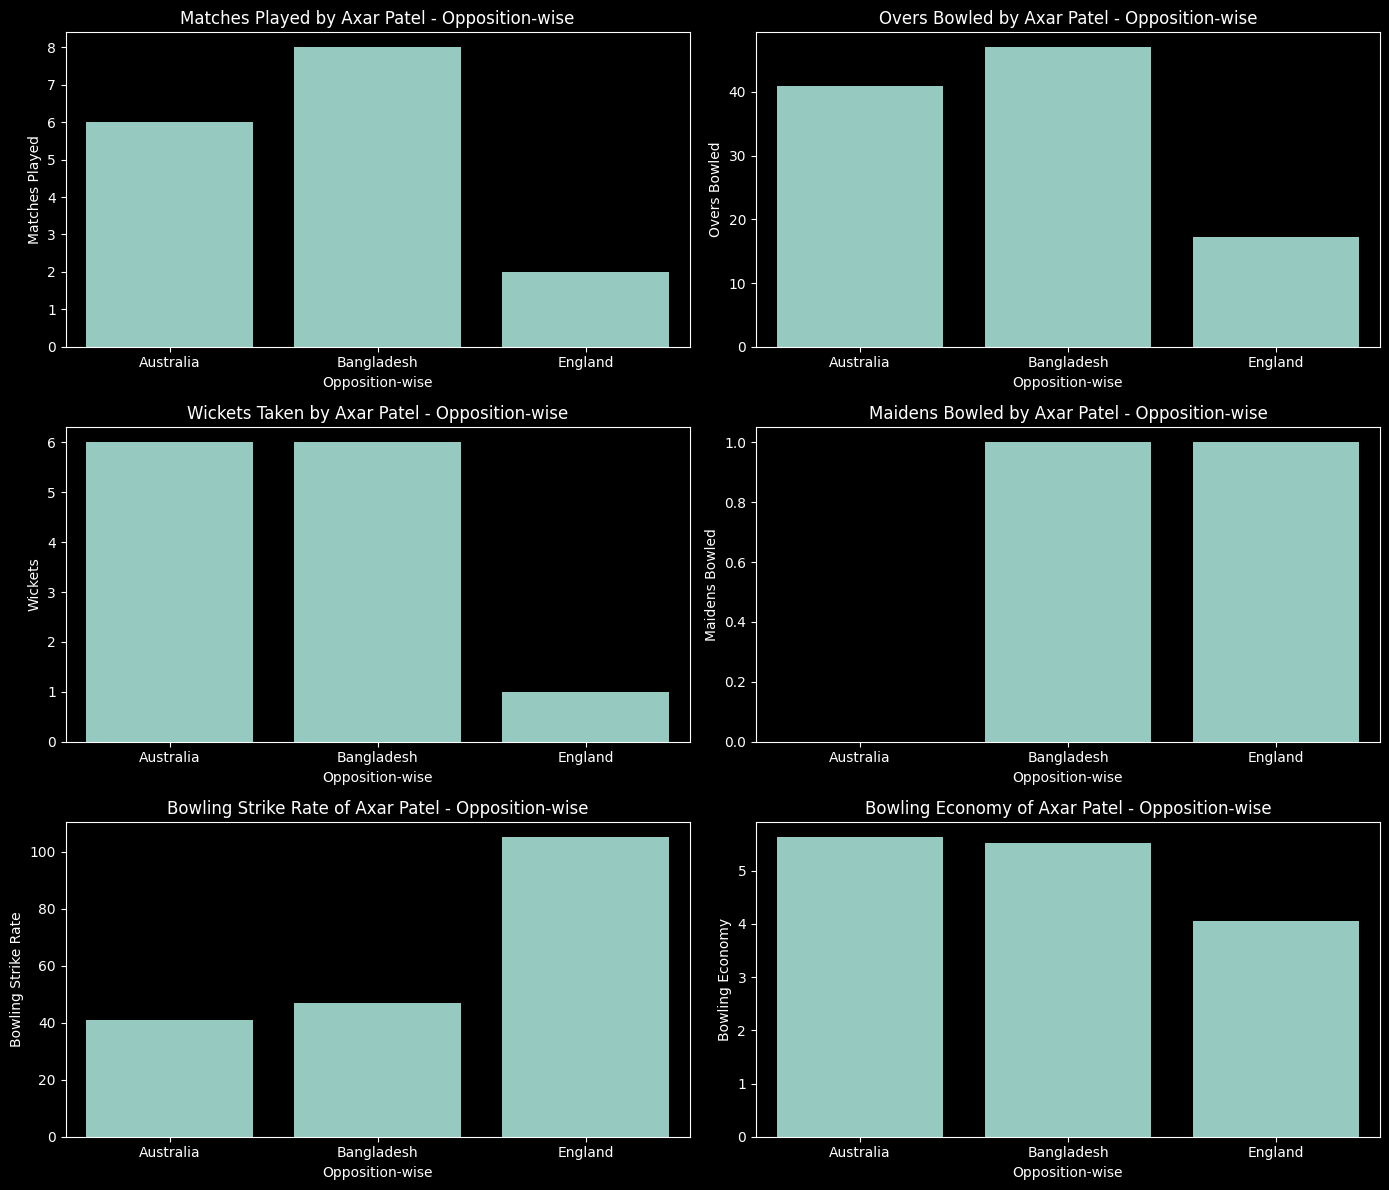

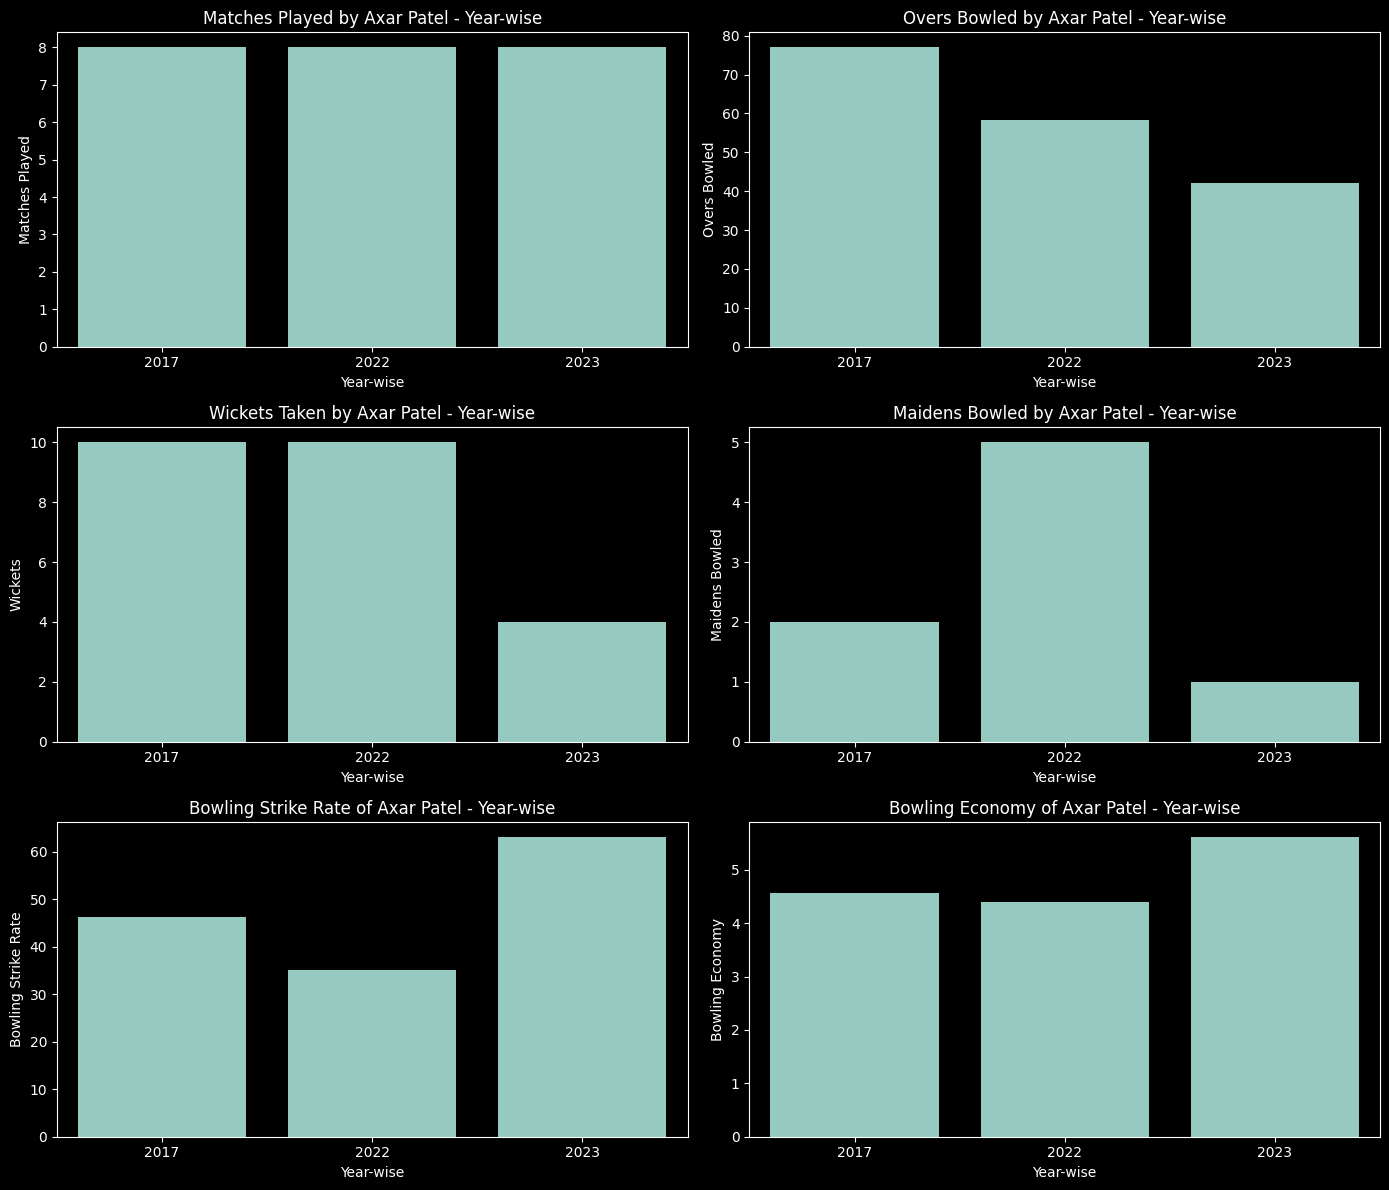

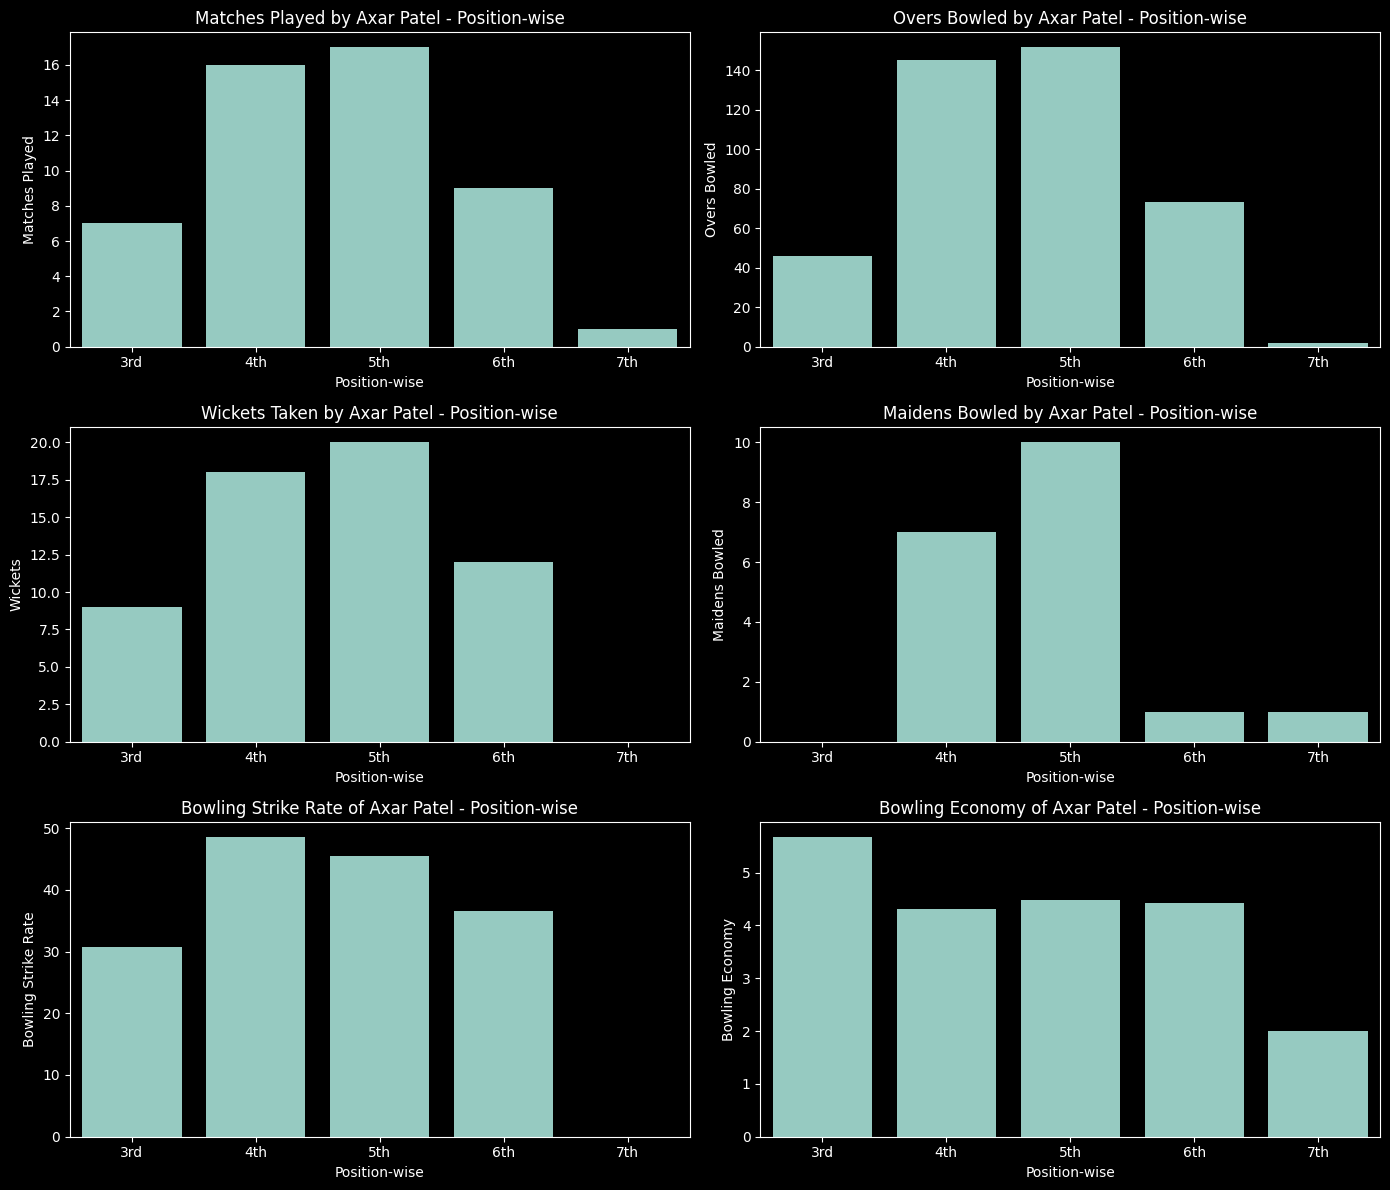

Shardul Thakur Bowling Stats


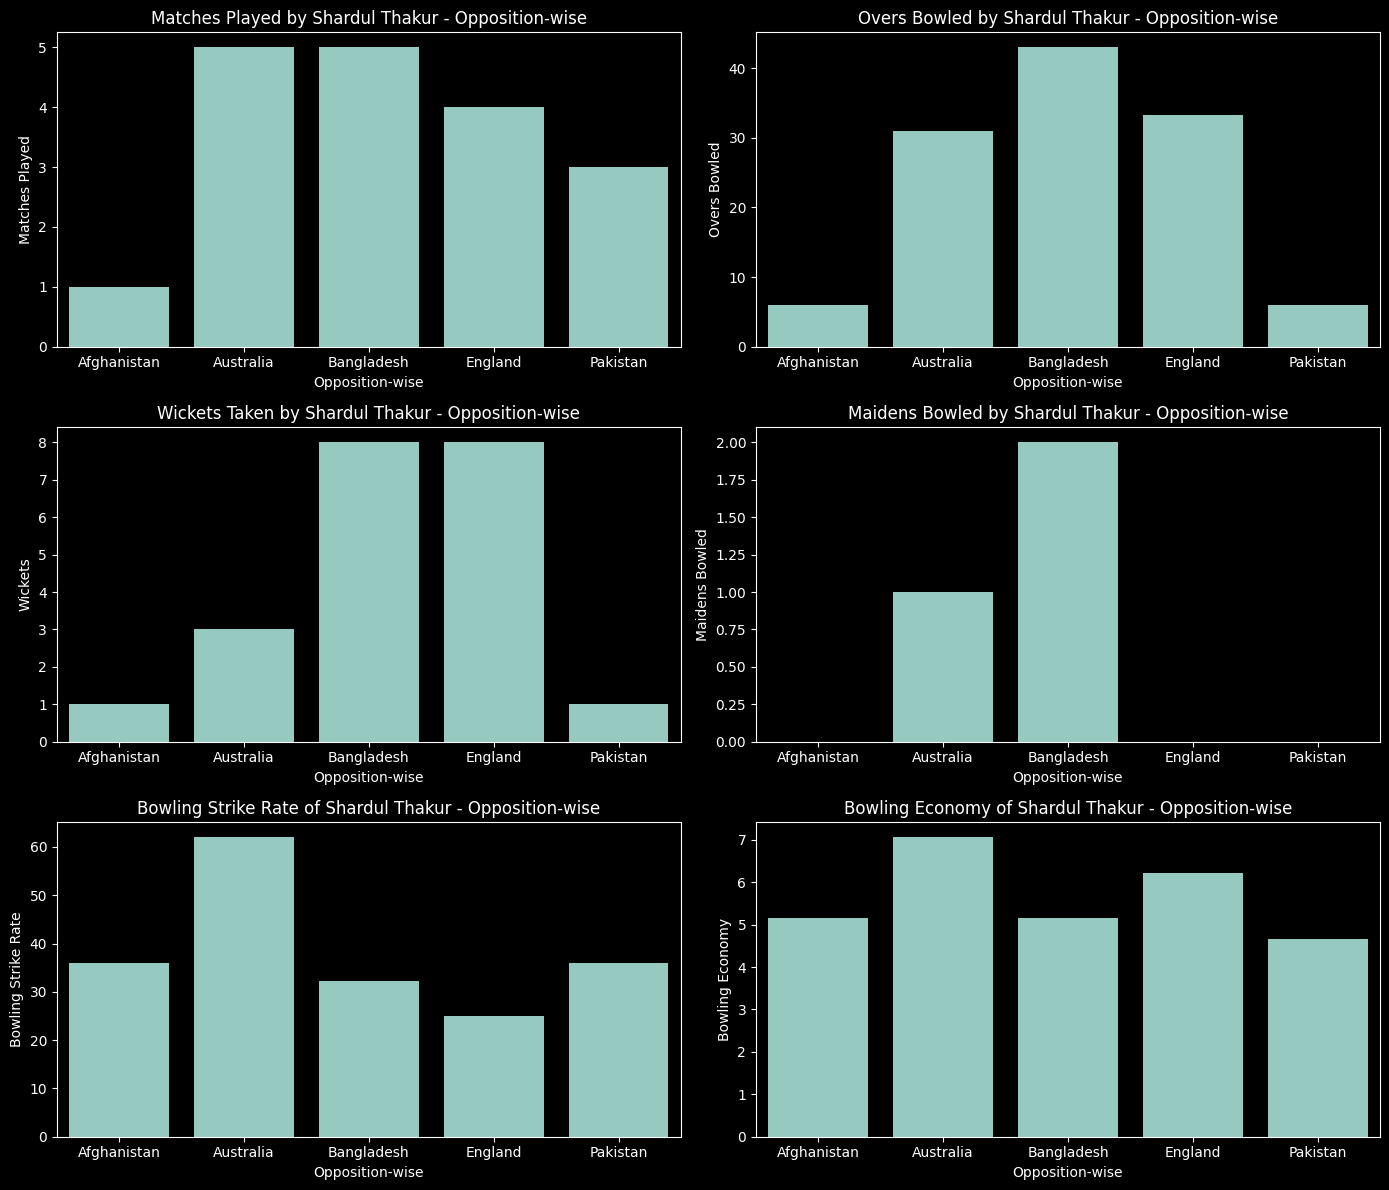

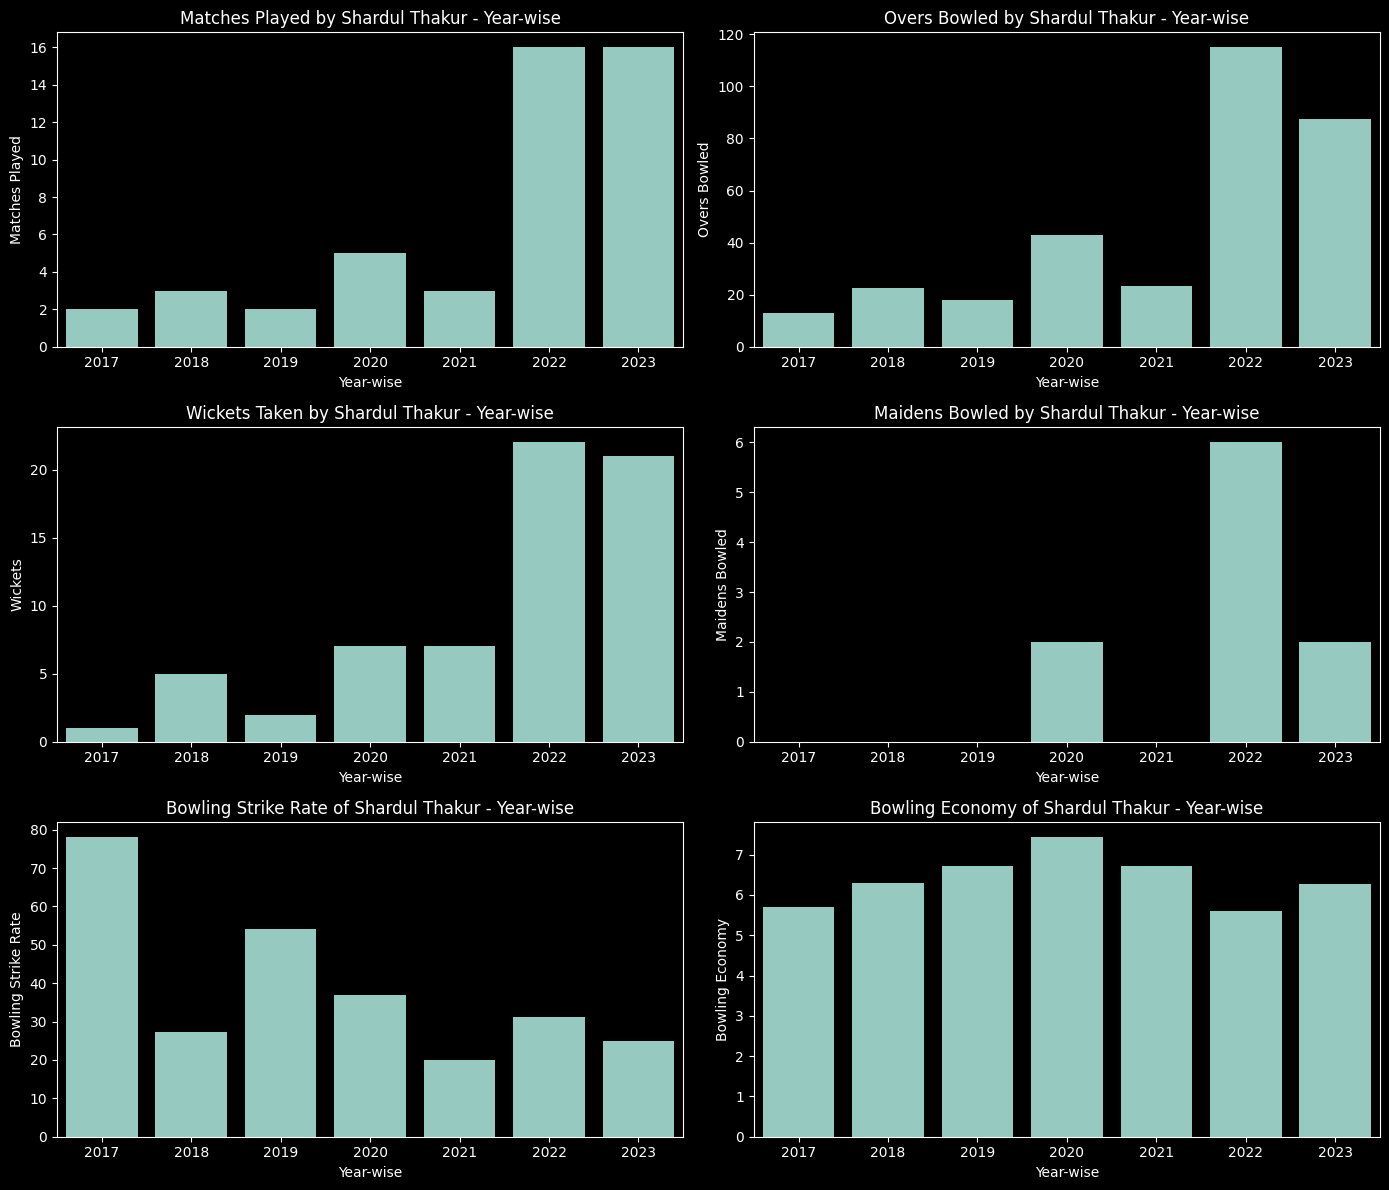

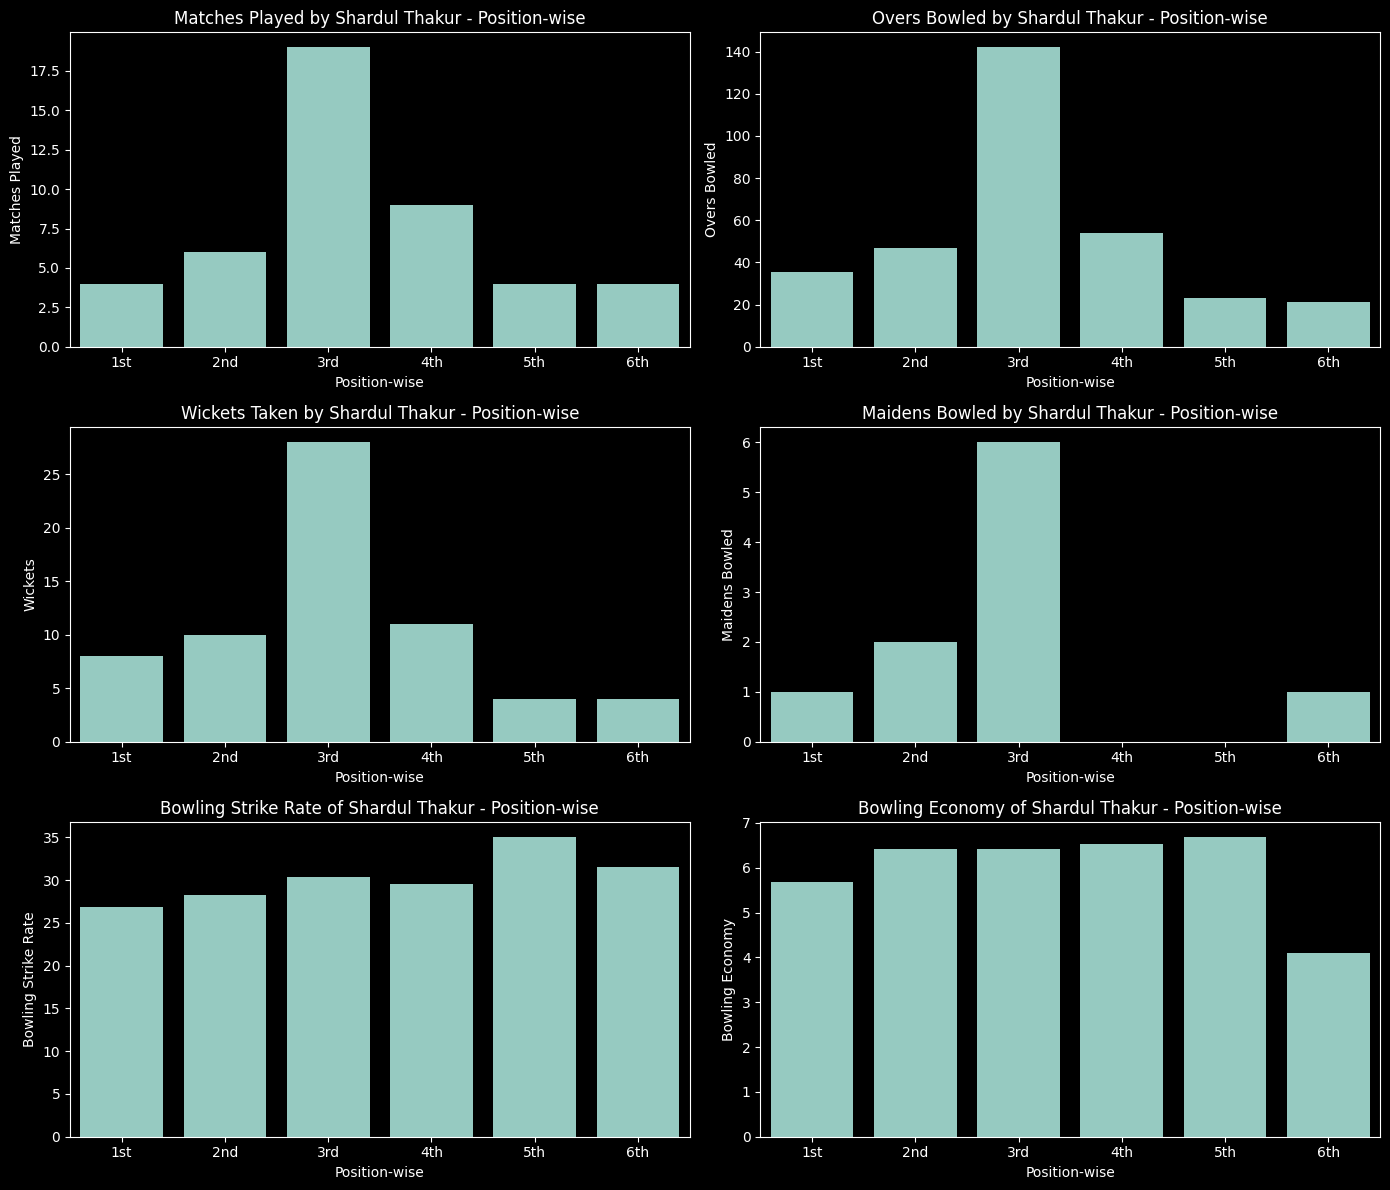

Jasprit Bumrah Bowling Stats


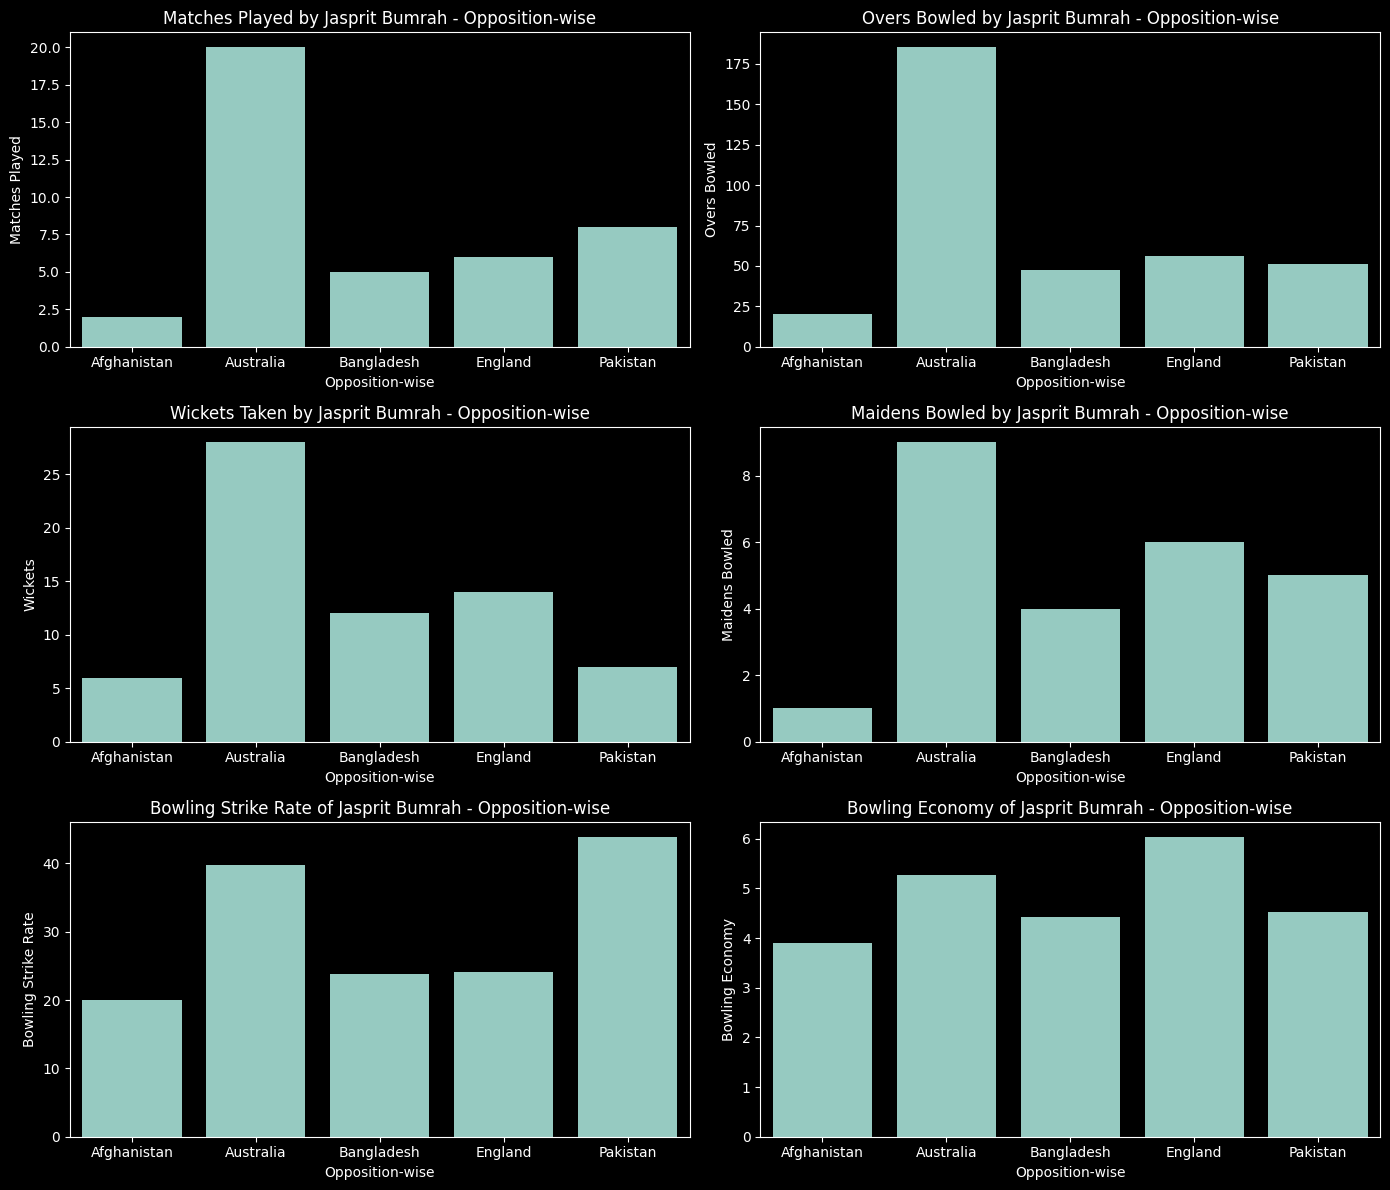

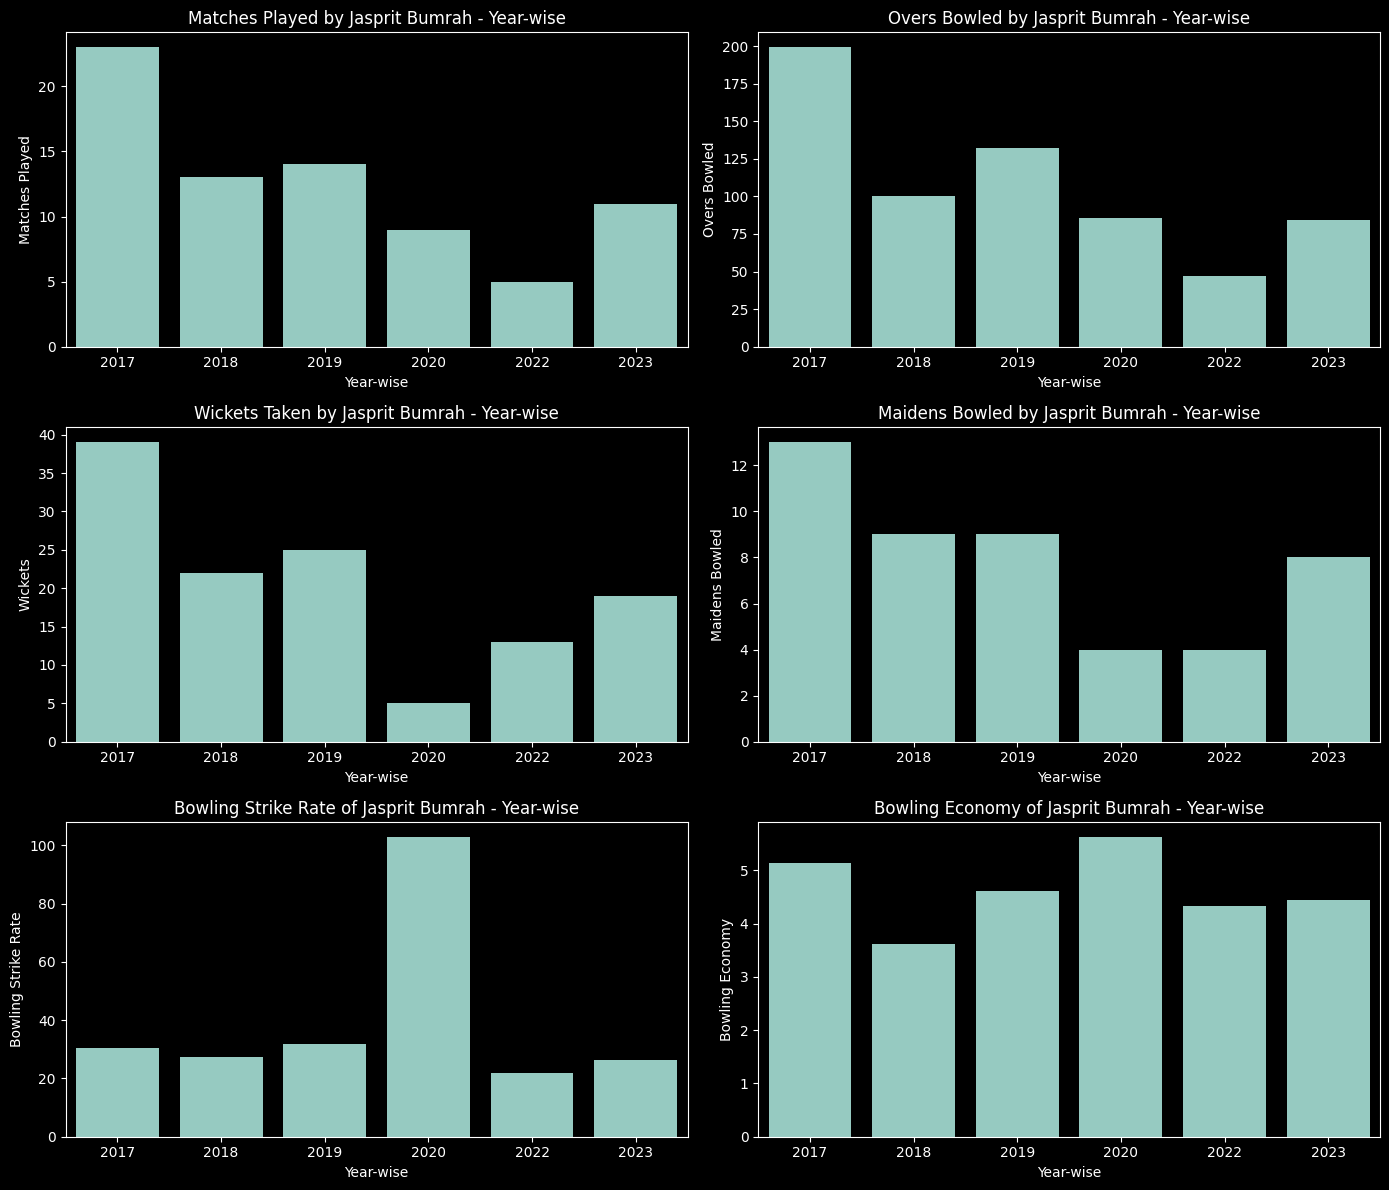

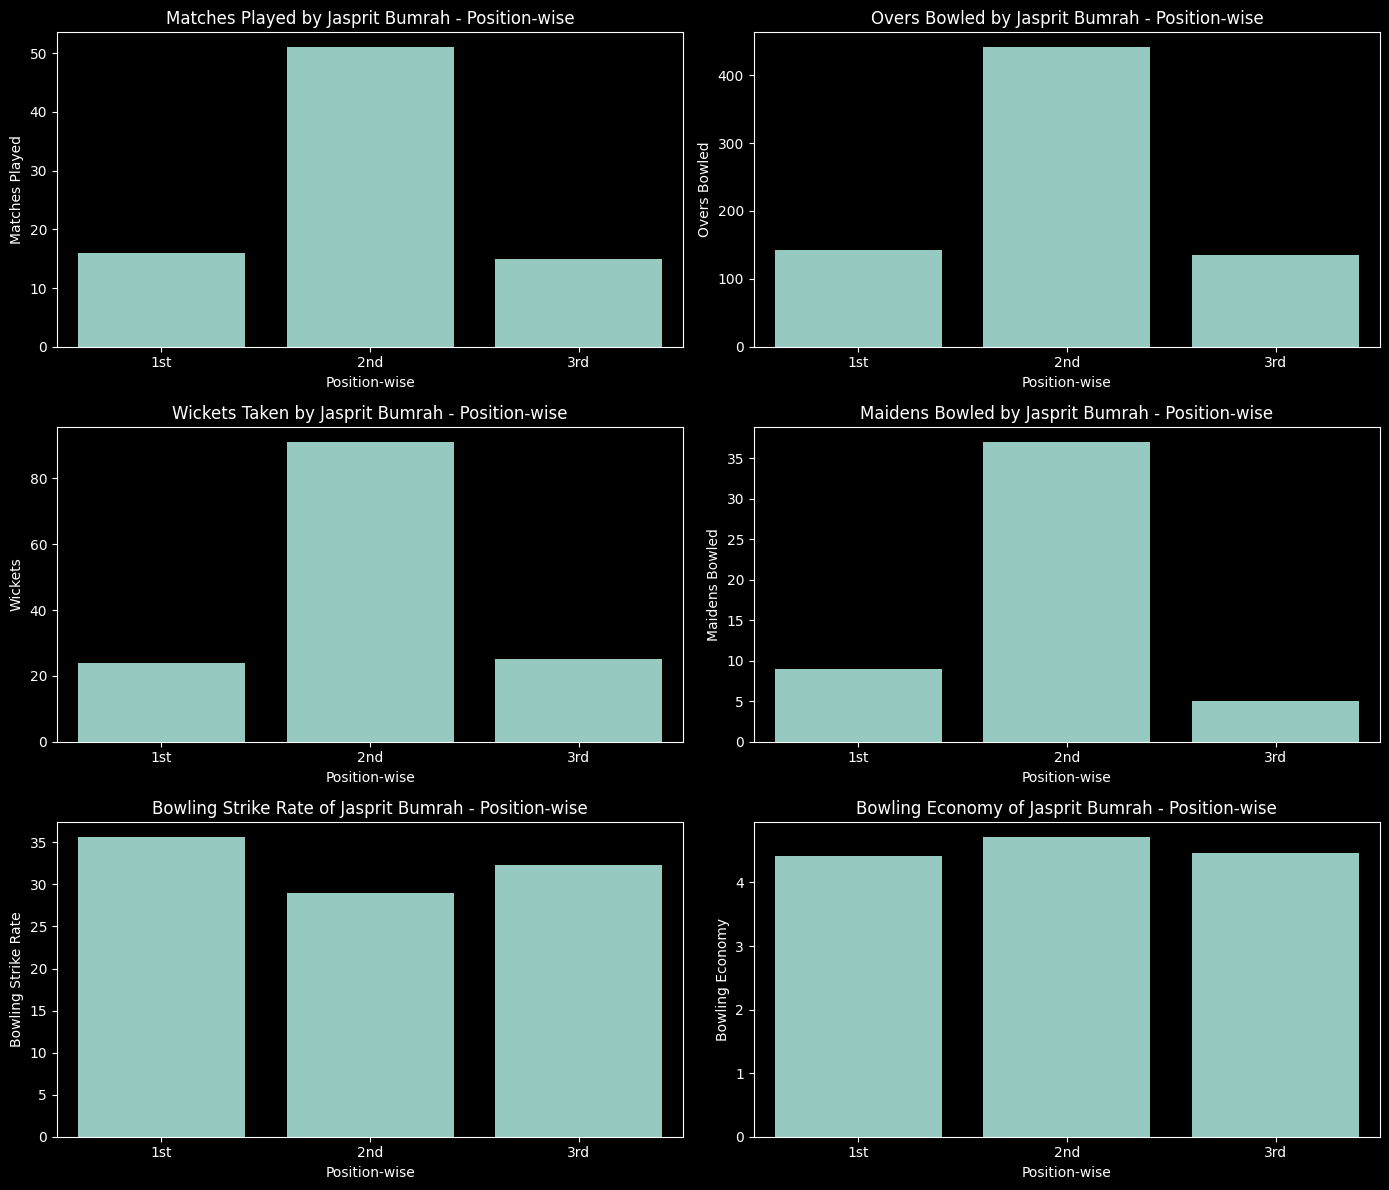

Mohammed Shami Bowling Stats


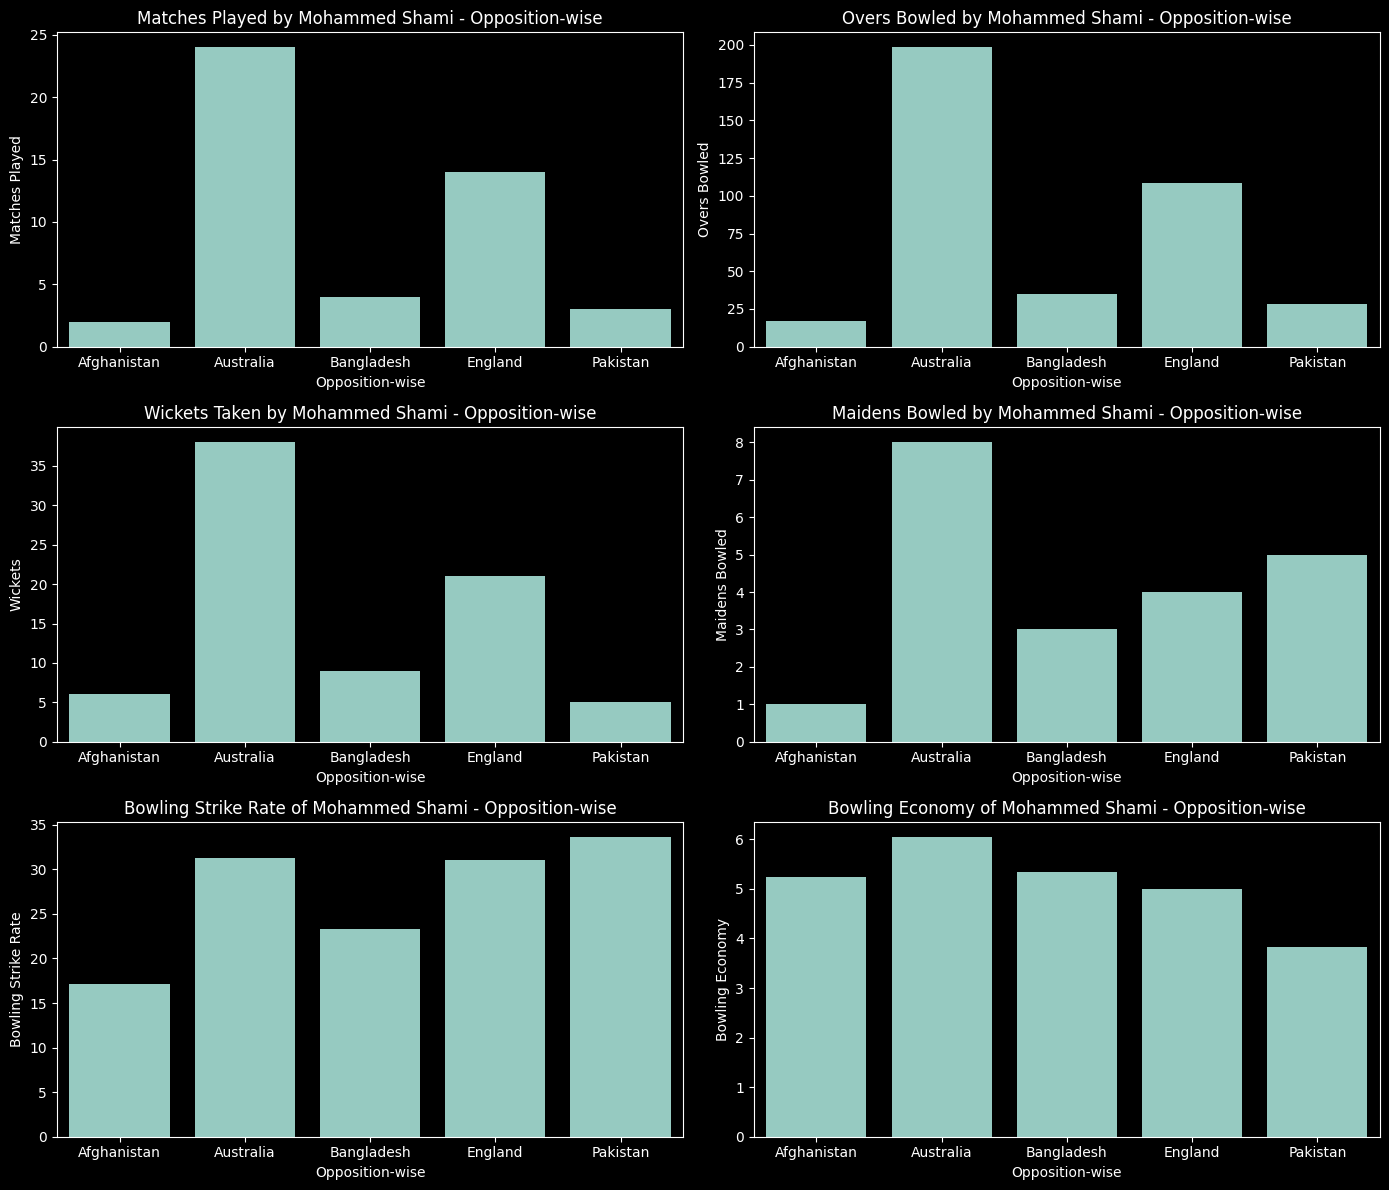

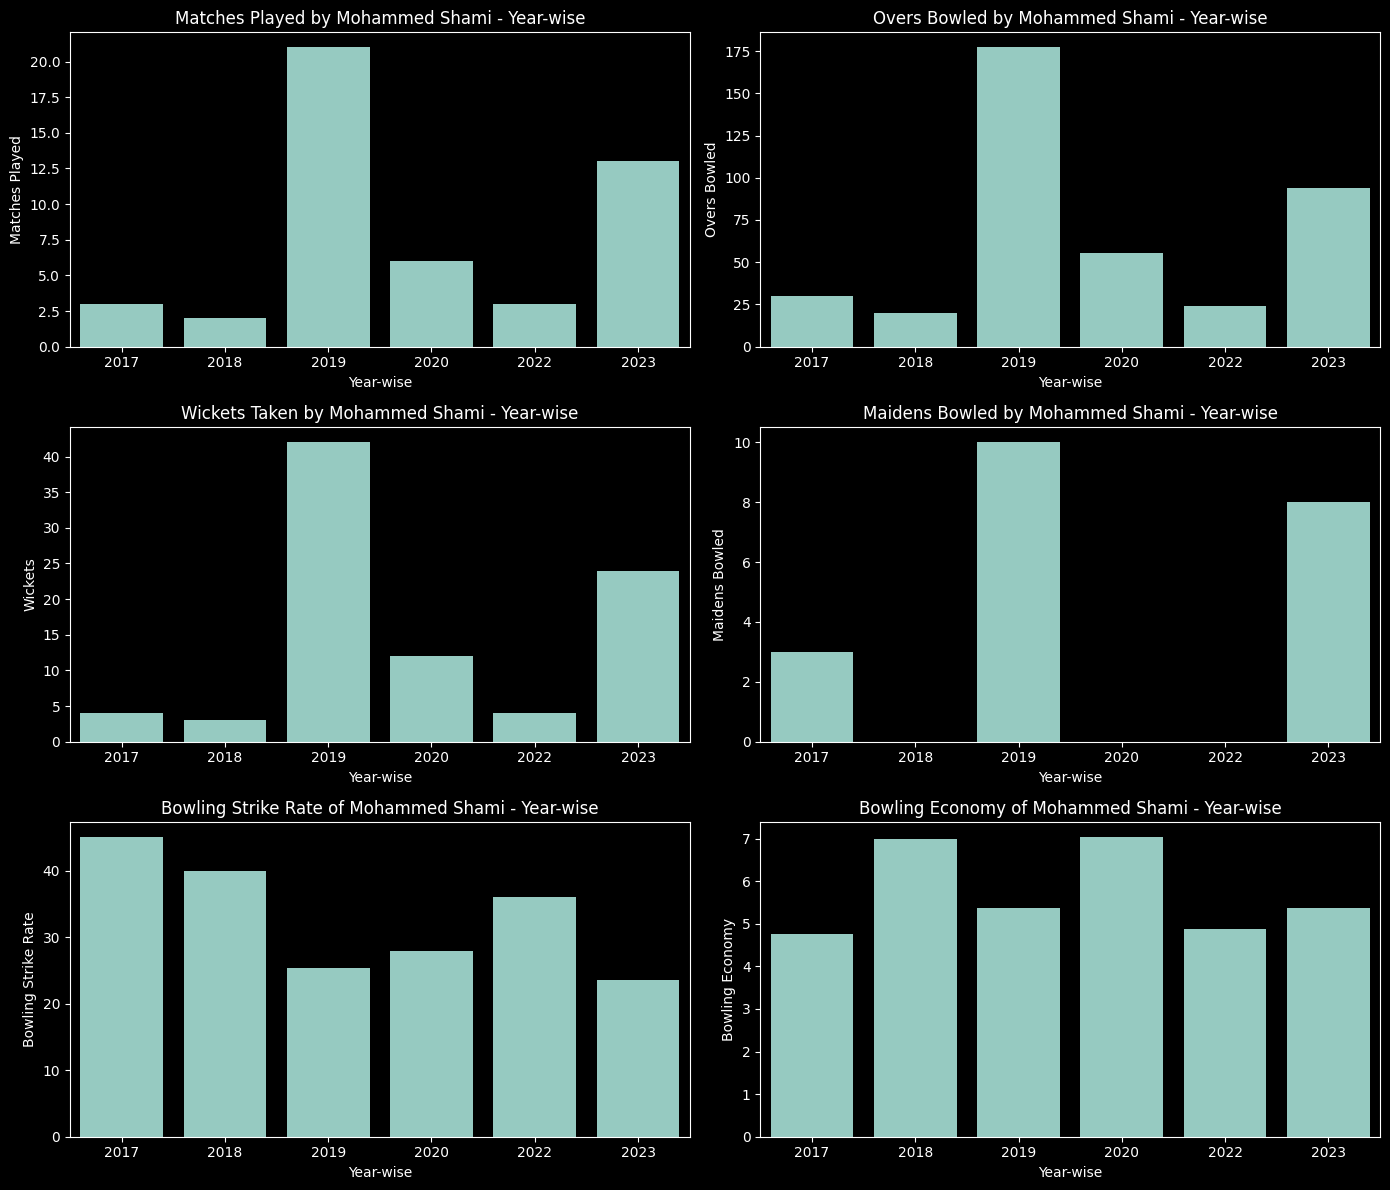

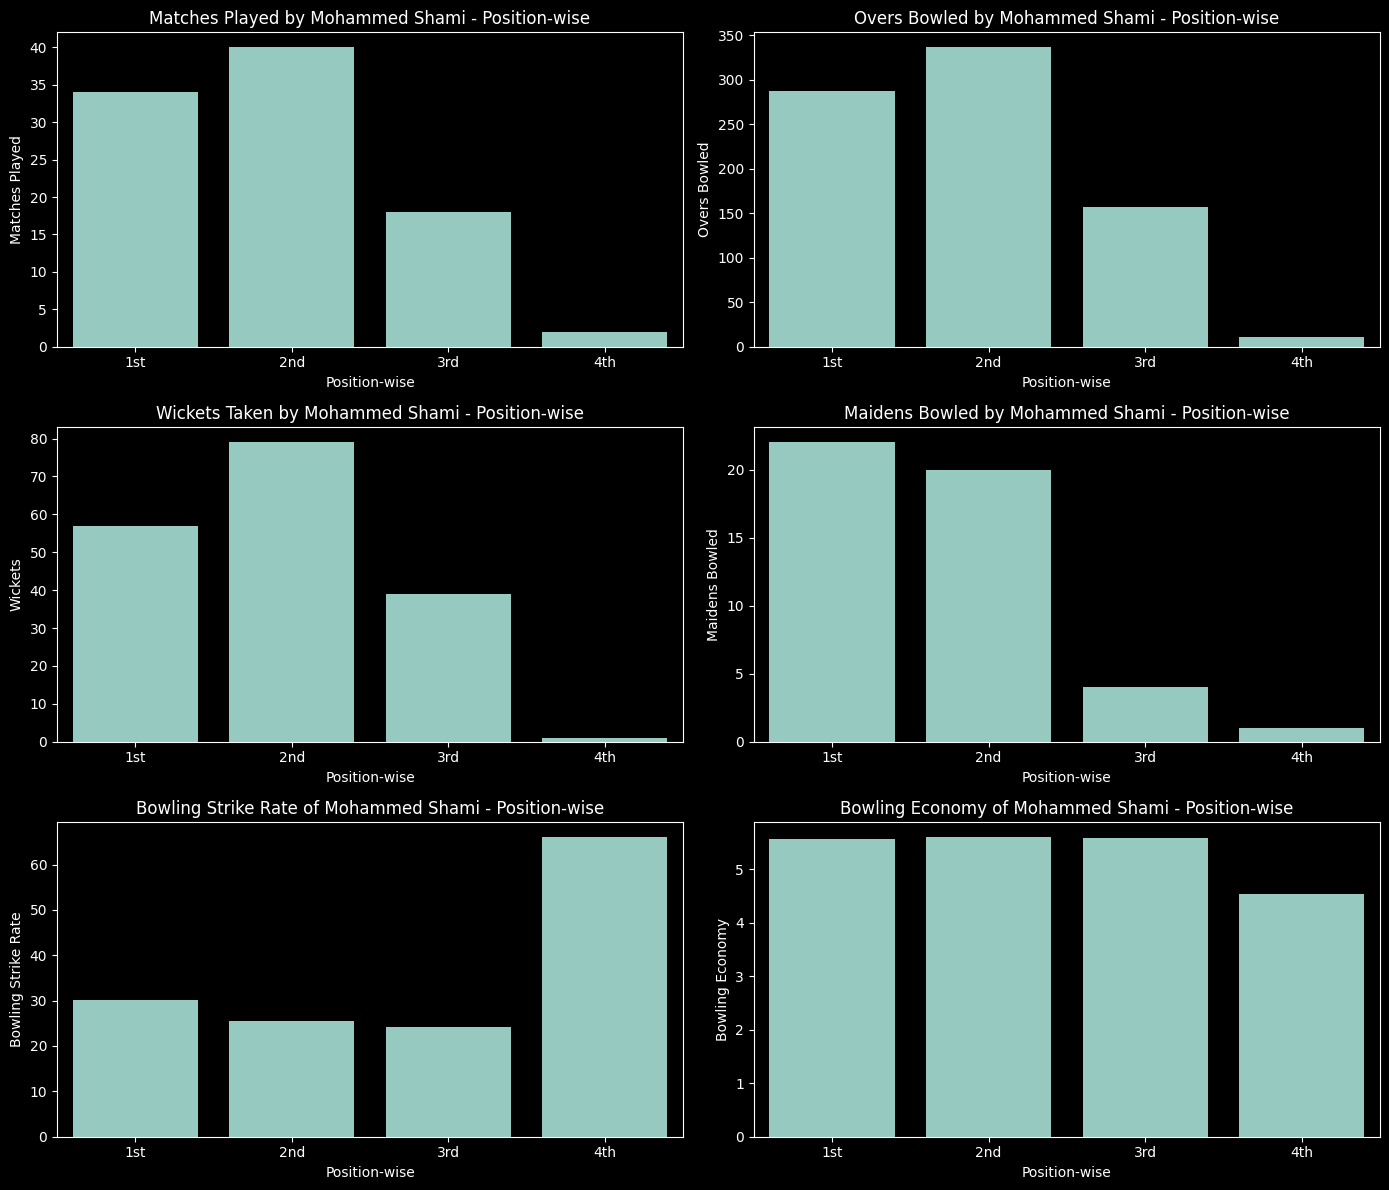

Mohammed Siraj Bowling Stats


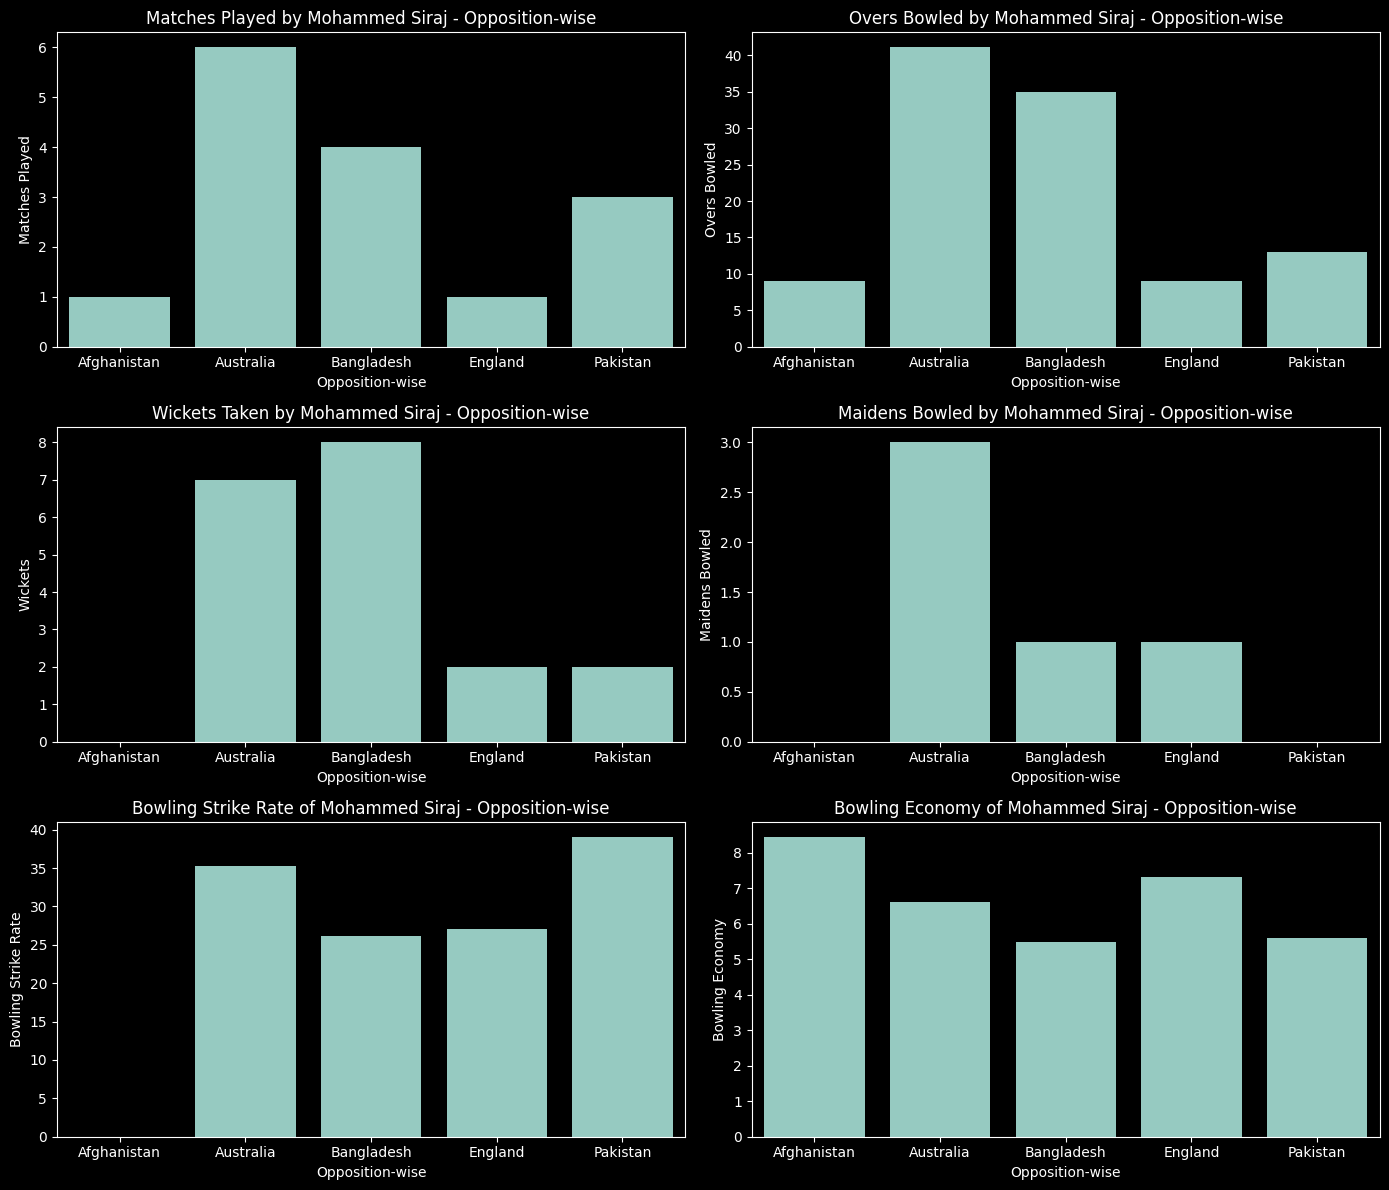

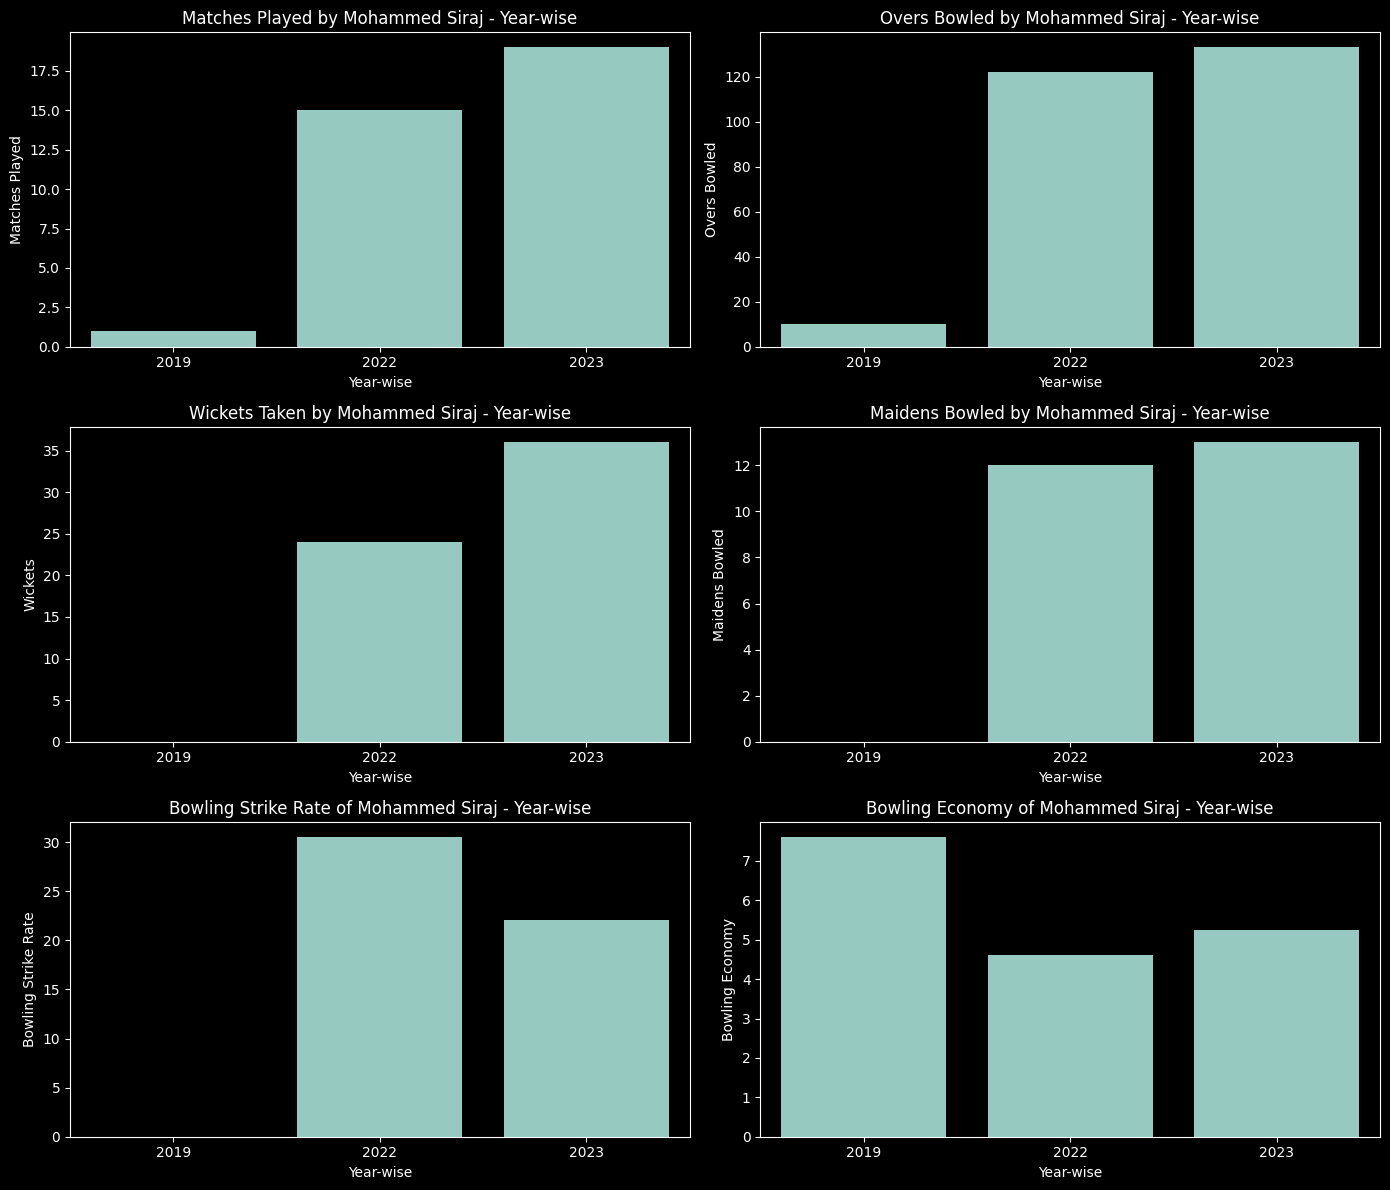

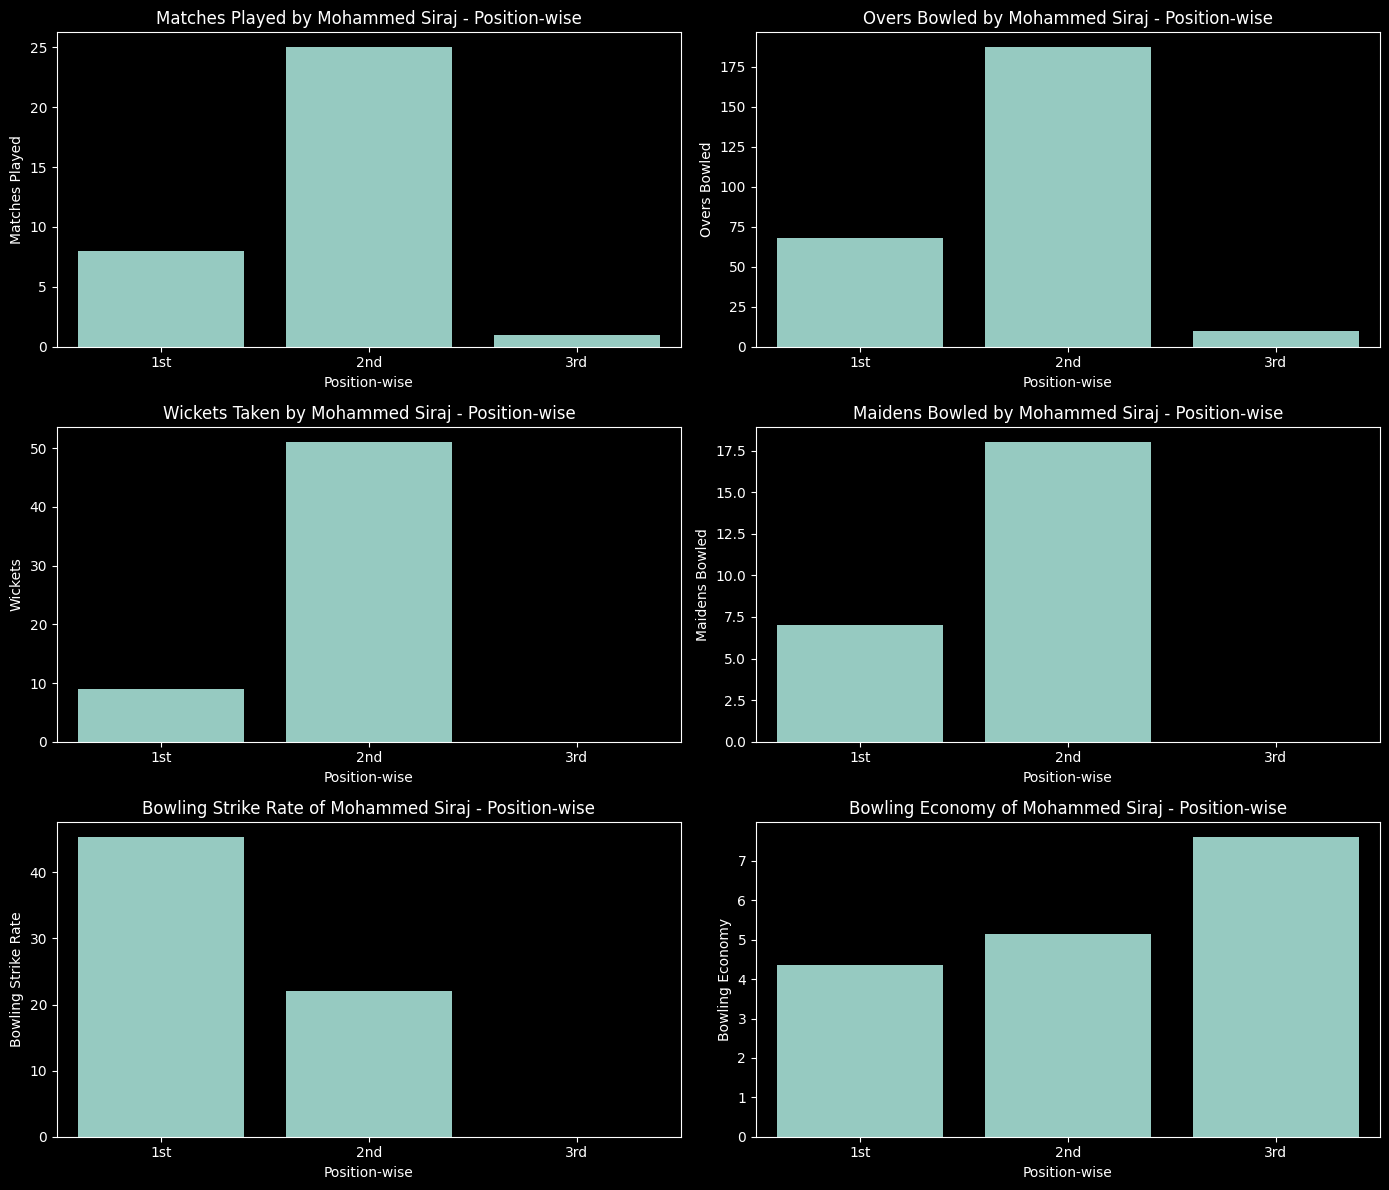

Kuldeep Yadav Bowling Stats


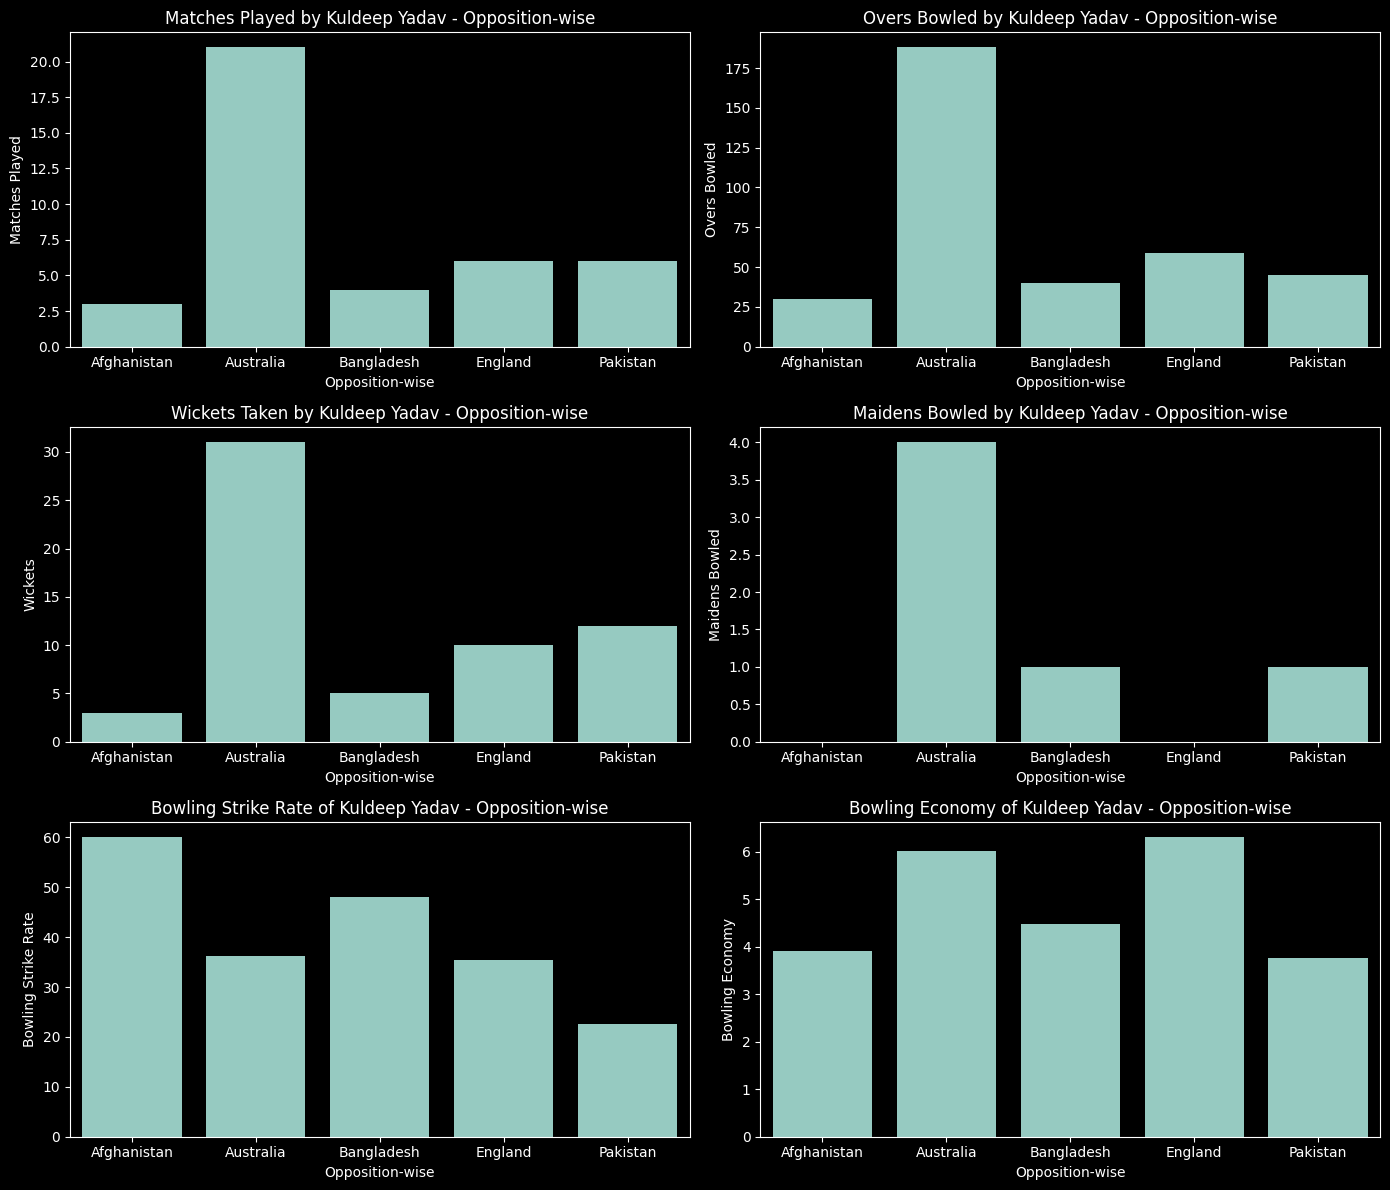

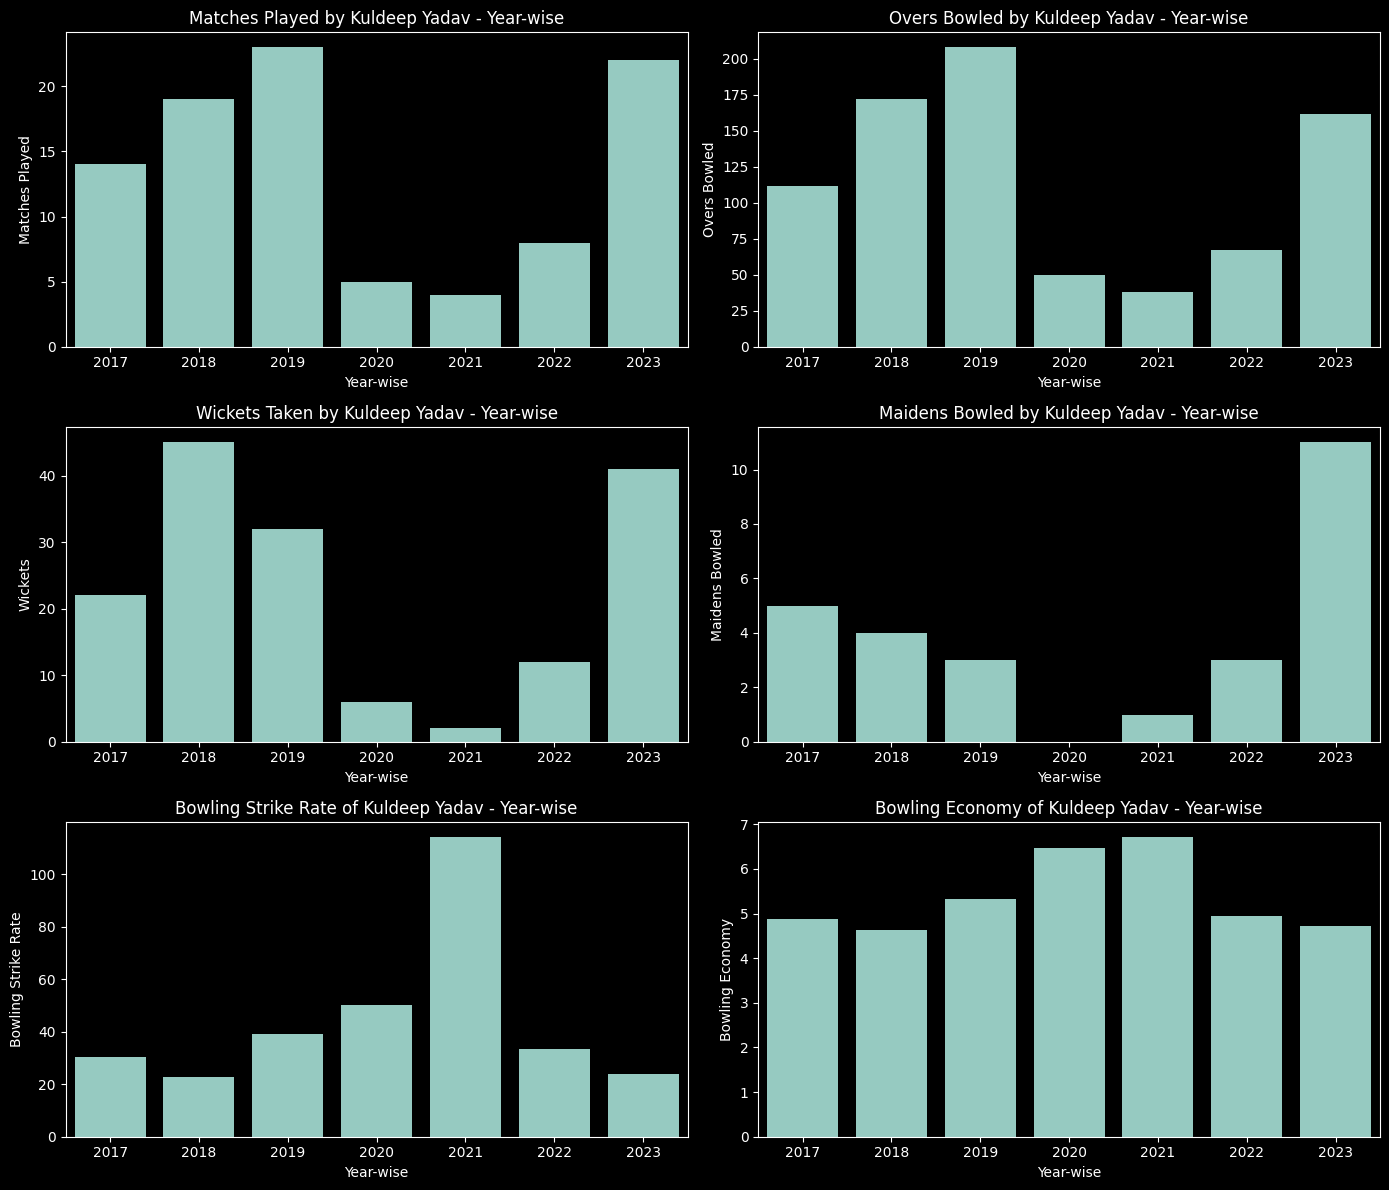

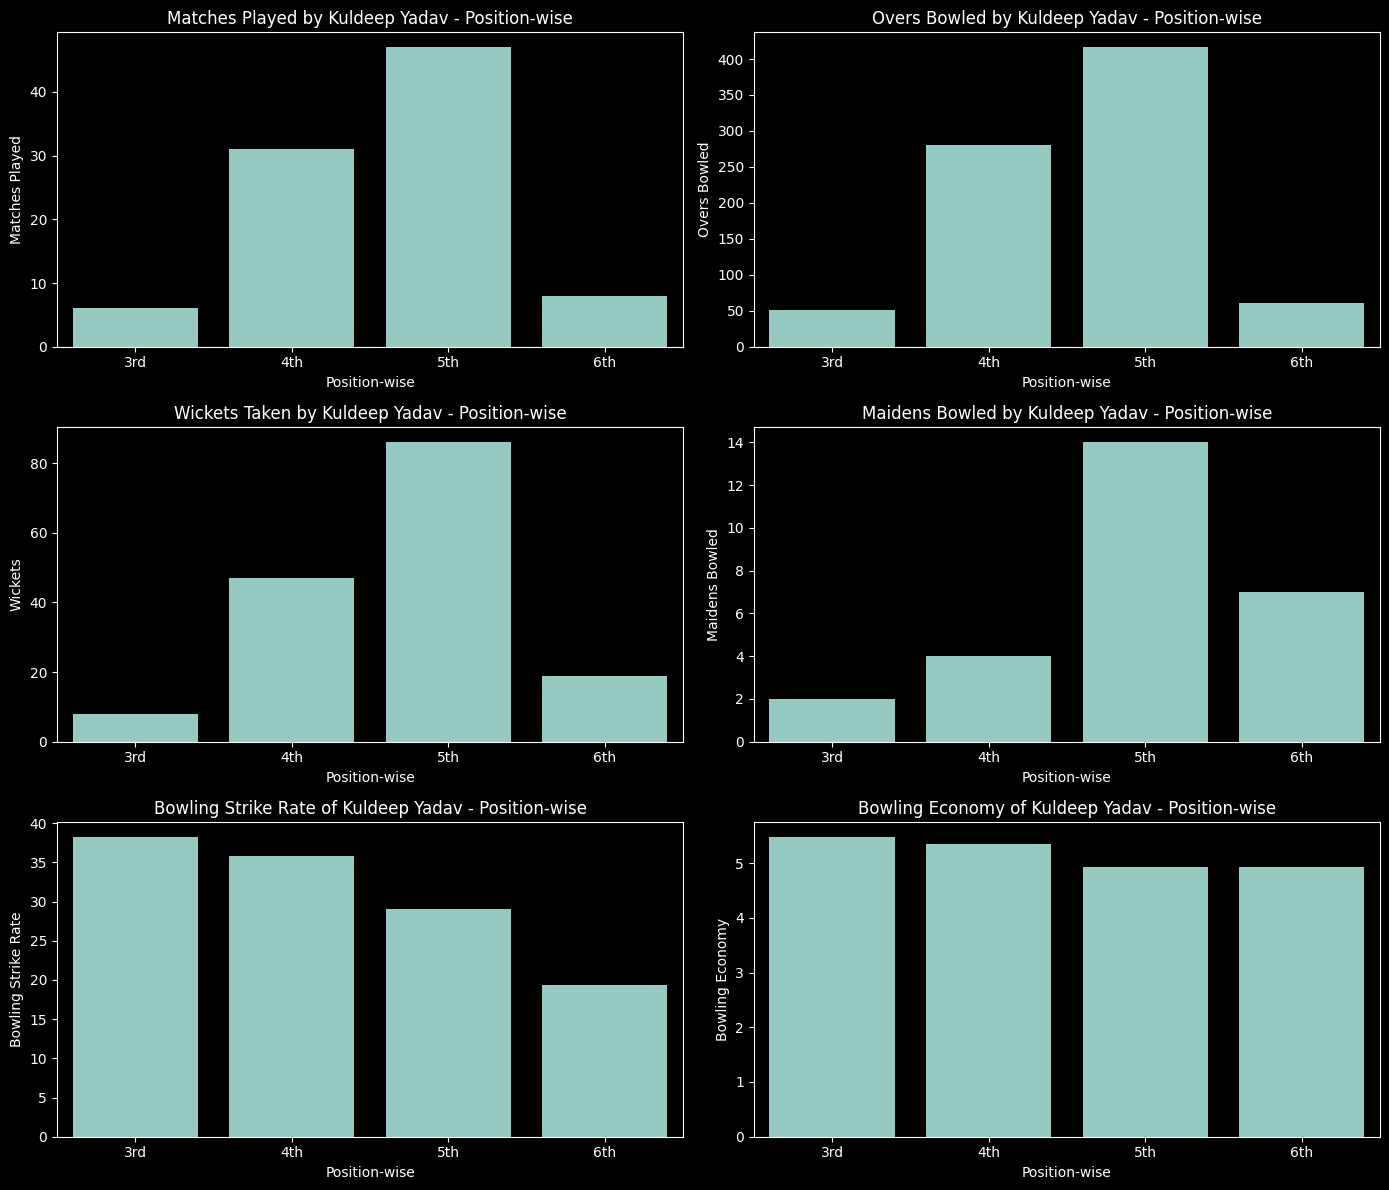

In [9]:
# Iterate through players and statistics types
for player, roles in players_and_roles.items():
    if "bowler" not in roles:
        continue

    player_name = player.lower().replace(" ", "_")

    player_data = read_player_data(player_name)

    opposition_stats_bowling, yearwise_stats_bowling, position_stats_bowling = extract_bowling_statistics(player_data)

    opposition_stats_bowling_df = pd.DataFrame(opposition_stats_bowling)
    yearwise_stats_bowling_df = pd.DataFrame(yearwise_stats_bowling)
    position_stats_bowling_df = pd.DataFrame(position_stats_bowling)
    

    print(f"{player} Bowling Stats")
    for stats_bowling_type, stats_bowling_df in [("Opposition-wise", opposition_stats_bowling_df),
                                 ("Year-wise", yearwise_stats_bowling_df),
                                 ("Position-wise", position_stats_bowling_df)]:
        if len(stats_bowling_df):
            create_bowling_eda_plots(player, stats_bowling_type, stats_bowling_df)


### Based on Simple Average

In [10]:
# Function to select the optimal playing eleven
def select_optimal_playing_eleven(players_and_roles, opponents):
    optimal_playing_eleven = {}

    for opponent in opponents:
        # Create an empty DataFrame to store the aggregated performance data
        aggregated_data = pd.DataFrame()

        # Iterate through players and roles
        for player, roles in players_and_roles.items():
            player_name = player.lower().replace(" ", "_")

            # Read player data from JSON file
            player_data = read_player_data(player_name)

            if "batter" in roles:
                # Extract relevant batter features
                opposition_stats_batting, _, _ = extract_batting_statistics(player_data)
                opposition_stats_batting_df = pd.DataFrame(opposition_stats_batting)
                opposition_stats_batting_df["id"] = opposition_stats_batting_df["id"].apply(lambda x: f"{player_name}_{x}")
                aggregated_data = pd.concat([aggregated_data, opposition_stats_batting_df], ignore_index=True)

            if "bowler" in roles:
                # Extract relevant bowler features
                opposition_stats_bowling, _, _ = extract_bowling_statistics(player_data)
                opposition_stats_bowling_df = pd.DataFrame(opposition_stats_bowling)
                opposition_stats_bowling_df["id"] = opposition_stats_bowling_df["id"].apply(lambda x: f"{player_name}_{x}")
                aggregated_data = pd.concat([aggregated_data, opposition_stats_bowling_df], ignore_index=True)

        aggregated_data["composite_score"] = aggregated_data.iloc[:, 1:].mean(axis=1)

        # Select the top players based on composite score
        top_players = aggregated_data.sort_values(by="composite_score", ascending=False).head(11)

        # Store the selected playing eleven for the current opposition
        optimal_playing_eleven[opponent] = top_players["id"].tolist()

    return optimal_playing_eleven

optimal_playing_eleven = select_optimal_playing_eleven(players_and_roles, opponents)

for opponent, players in optimal_playing_eleven.items():
    print(f"Optimal Playing Eleven against {opponent}: {players}")


Optimal Playing Eleven against South Africa: ['rohit_sharma_Australia', 'virat_kohli_Australia', 'virat_kohli_England', 'virat_kohli_Bangladesh', 'rohit_sharma_Pakistan', 'rohit_sharma_Bangladesh', 'virat_kohli_Pakistan', 'rohit_sharma_England', 'kl_rahul_Australia', 'hardik_pandya_Australia', 'ravindra_jadeja_Australia']
Optimal Playing Eleven against Australia: ['rohit_sharma_Australia', 'virat_kohli_Australia', 'virat_kohli_England', 'virat_kohli_Bangladesh', 'rohit_sharma_Pakistan', 'rohit_sharma_Bangladesh', 'virat_kohli_Pakistan', 'rohit_sharma_England', 'kl_rahul_Australia', 'hardik_pandya_Australia', 'ravindra_jadeja_Australia']
Optimal Playing Eleven against New Zealand: ['rohit_sharma_Australia', 'virat_kohli_Australia', 'virat_kohli_England', 'virat_kohli_Bangladesh', 'rohit_sharma_Pakistan', 'rohit_sharma_Bangladesh', 'virat_kohli_Pakistan', 'rohit_sharma_England', 'kl_rahul_Australia', 'hardik_pandya_Australia', 'ravindra_jadeja_Australia']
Optimal Playing Eleven against P

### Based on Weighted Average

In [11]:
import random

# Function to select the optimal playing eleven
def select_optimal_playing_eleven(players_and_roles, opponents):
    optimal_playing_eleven = {}

    batter_feature_weights = {
        "runs": 0.25,
        "fours": 0.15,
        "sixes": 0.15,
        "fifties": 0.1,
        "hundreds": 0.1,
        "batting_average": 0.15,
        "batting_strike_rate": 0.1,
    }

    bowler_feature_weights = {
        "overs": 0.10,
        "wickets": 0.15,
        "maiden": 0.15,
        "bowling_strike_rate": 0.25,
        "bowling_economy": 0.35,
    }
    bowler_feature_weights = {
        "overs": 1,
        "wickets": 0,
        "maiden": 0,
        "bowling_strike_rate": 0,
        "bowling_economy": 0,
    }

    for opponent in opponents:
        aggregated_data_batting = pd.DataFrame()
        aggregated_data_bowling = pd.DataFrame()

        players_added_batting = set()
        players_added_bowling = set()

        # Iterate through players and roles
        for player, roles in players_and_roles.items():
            player_name = player.lower().replace(" ", "_")

            player_data = read_player_data(player_name)

            if "batter" in roles:
                # Extract relevant batter features
                opposition_stats_batting, _, _ = extract_batting_statistics(player_data)
                opposition_stats_batting_df = pd.DataFrame(opposition_stats_batting)
                player_opponent_id = f"{player_name}_{opponent}"
                if player_opponent_id not in players_added_batting:
                    opposition_stats_batting_df["id"] = player_opponent_id
                    aggregated_data_batting = pd.concat([aggregated_data_batting, opposition_stats_batting_df],
                                                        ignore_index=True)
                    players_added_batting.add(player_opponent_id)

            if "bowler" in roles:
                # Extract relevant bowler features
                opposition_stats_bowling, _, _ = extract_bowling_statistics(player_data)
                opposition_stats_bowling_df = pd.DataFrame(opposition_stats_bowling)
                player_opponent_id = f"{player_name}_{opponent}"
                if player_opponent_id not in players_added_bowling:
                    opposition_stats_bowling_df["id"] = player_opponent_id
                    aggregated_data_bowling = pd.concat([aggregated_data_bowling, opposition_stats_bowling_df],
                                                        ignore_index=True)
                    players_added_bowling.add(player_opponent_id)

        # Calculate weighted composite scores based on relevant features for both batters and bowlers
        aggregated_data_batting["composite_score"] = (aggregated_data_batting.iloc[:, 2:-1] * 
                                                      [batter_feature_weights[feature] for feature in aggregated_data_batting.columns[2:-1]]
                                                      ).sum(axis=1)
        aggregated_data_bowling["composite_score"] = (aggregated_data_bowling.iloc[:, 2:-1] * 
                                                      [bowler_feature_weights[feature] for feature in aggregated_data_bowling.columns[2:-1]]
                                                      ).sum(axis=1)

        aggregated_data_batting["composite_score"] += random.uniform(-0.2, 0.2)
        aggregated_data_bowling["composite_score"] += random.uniform(-0.2, 0.2)

        # Select the top players based on composite score for both batters and bowlers
        top_players_batting = aggregated_data_batting.sort_values(by="composite_score", ascending=False).head(6)
        top_players_bowling = aggregated_data_bowling.sort_values(by="composite_score", ascending=False).head(5)

        # Combine the selected players for batters and bowlers to form the optimal playing eleven
        optimal_playing_eleven[opponent] = top_players_batting["id"].tolist() + top_players_bowling["id"].tolist()

    return optimal_playing_eleven

optimal_playing_eleven = select_optimal_playing_eleven(players_and_roles, opponents)

for opponent, players in optimal_playing_eleven.items():
    players = [" ".join(player.split('_')[:-1]) for player in players]
    print(f"Optimal Playing Eleven against {opponent}: {set(players)}")


Optimal Playing Eleven against South Africa: {'ravindra jadeja', 'mohammed shami', 'jasprit bumrah', 'kuldeep yadav', 'virat kohli', 'rohit sharma'}
Optimal Playing Eleven against Australia: {'ravindra jadeja', 'mohammed shami', 'jasprit bumrah', 'kuldeep yadav', 'virat kohli', 'rohit sharma'}
Optimal Playing Eleven against New Zealand: {'ravindra jadeja', 'mohammed shami', 'jasprit bumrah', 'kuldeep yadav', 'virat kohli', 'rohit sharma'}
Optimal Playing Eleven against Pakistan: {'ravindra jadeja', 'mohammed shami', 'jasprit bumrah', 'kuldeep yadav', 'virat kohli', 'rohit sharma'}
Optimal Playing Eleven against Afghanistan: {'ravindra jadeja', 'mohammed shami', 'jasprit bumrah', 'kuldeep yadav', 'virat kohli', 'rohit sharma'}
Optimal Playing Eleven against England: {'ravindra jadeja', 'mohammed shami', 'jasprit bumrah', 'kuldeep yadav', 'virat kohli', 'rohit sharma'}
Optimal Playing Eleven against Bangladesh: {'ravindra jadeja', 'mohammed shami', 'jasprit bumrah', 'kuldeep yadav', 'vir

# Exploratory Data Analysis (EDA) Report

## Introduction

The goal of this Exploratory Data Analysis (EDA) report is to justify the selection of specific features for assessing the performance of both batters and bowlers and subsequently choosing the optimal playing eleven for each opponent. The identified features for batters include "runs," "fours," "sixes," "fifties," "hundreds," "batting_average," and "batting_strike_rate," while for bowlers, the features are "overs," "wickets," "maiden," "bowling_strike_rate," and "bowling_economy."

## Justification for Batter Features

1. **Runs**: Runs are a fundamental measure of a batter's performance, indicating their ability to score and contribute to the team's total. More runs generally signify a more effective batter.

2. **Fours and Sixes**: The number of fours and sixes reflects a batter's ability to find boundaries, showcasing their capability to score quickly and create pressure on the opposition.

3. **Fifties and Hundreds**: Fifties and hundreds are milestones that indicate consistent and impactful batting performances. These demonstrate a batter's ability to stay at the crease for extended periods and convert starts into substantial scores.

4. **Batting Average**: Batting average is a key metric that provides an average score per innings, offering insights into a batter's overall consistency and ability to build innings.

5. **Batting Strike Rate**: Strike rate is crucial in limited-overs formats, indicating how quickly a batter scores. A good strike rate is vital for maintaining a healthy run rate for the team.

## Justification for Bowler Features

1. **Overs**: The number of overs bowled is a fundamental bowling statistic, reflecting a bowler's workload and contribution to restricting the opposition.

2. **Wickets**: Wickets are the primary measure of a bowler's success. Taking wickets is essential for disrupting the opposition's batting order and shifting the game's momentum.

3. **Maiden Overs**: Maidens are valuable as they signify periods of sustained pressure on the batsmen. Bowlers who can bowl maiden overs contribute to building pressure and limiting the opposition's scoring.

4. **Bowling Strike Rate**: Bowling strike rate measures the efficiency of a bowler in taking wickets. A lower strike rate indicates a bowler's ability to make breakthroughs at regular intervals.

5. **Bowling Economy**: Economy rate is critical for restricting the opposition's scoring. Bowlers with lower economy rates are effective in maintaining control over the game.

## Conclusion

The selected features for both batters and bowlers cover a comprehensive range of performance metrics, including scoring ability, consistency, and impact. These features are crucial for assessing individual contributions and forming a well-balanced playing eleven tailored to counter the strengths and weaknesses of each specific opponent. The justification is grounded in the significance of these metrics in influencing match outcomes and ensuring a competitive edge in various cricketing scenarios.
